# Assignment 2: Data Modelling
***
<b> Group: 10</b>
<br>
<b> Student Name: Nguyen Dang Huynh Chau (S3777214)</b>
<br>
<b> Student Name: Nguyen Dang Huynh Chau (S3879312)</b>
<br>
<b> Student Name: Nguyen Dang Huynh Chau (S3879312)</b>
<br>
<b> Lecturer: Vo Ngoc Yen Nhi </b>

Data science is an interdisciplinary area of study that applies scientific methods, processes, and algorithms to accumulate such a not only knowledge but also actionable insight and discorver the invisible pattern from the raw data. Hence, it has played an essential role in the evolution of a various fields. In order to understand the purpose of the project, the target must be set first. The target of this report is to build innovative models for predicting the severity of the traffic accidents, before that the factors which contribute to the severity 
In this report, all the steps which are retrieving data, data preparation, data exploration, data modeling are all included in the report. This report is divided into 2 parts in order to load data more smoothly. This part is task 1, 2: Data Preparation and Data Exploration.

# Task 1: Data Preparation
***

# Importing Necessary Libraries and datasets


This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. 

<p> In order to have an accurate result, data prepration step must be done precisely. First of all, data from the csv file which is named "survey_results_public.csv" is loaded by "read_csv" in pandas function. After that, all the data types must be checked to ensure no column has incorrect data types assigned. Having been checked the data types, the loaded data is cleaned by 6 steps which are typos, extra-whitespaces, upper/lower-case, sanity checks, missing values, and categorical data </p>

## Import all the libraries

In [1]:
# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#for date time data types
import datetime
#For Encoding
!pip install category_encoders --quiet
import category_encoders as ce
#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Libraries for plotting
import seaborn as sns #seaborn for catgory columns
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Data Retrieving

In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True". In order to have a look on all columns carefully, using the set_option('display.max_columns', None) in the pandas, all the columns will be shown.

In [2]:
# import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
#data is imported by "read_csv() function of pandas"
test = pd.read_csv('Data/test.csv', delimiter=',', skipinitialspace = True)
train = pd.read_csv('Data/train.csv', delimiter=',', skipinitialspace = True)
val = pd.read_csv('Data/val.csv', delimiter=',', skipinitialspace = True)
                
pd.set_option('display.max_columns', None)
#set to show all columns

In [3]:
#Replace extra-whitspaces with regex by using function replace in pandas
test = test.replace({"^\s*|\s*$":""}, regex=True)  
train = train.replace({"^\s*|\s*$":""}, regex=True)  
val = val.replace({"^\s*|\s*$":""}, regex=True)  

In [4]:
# print out data
test.head()

ID           Start_Time             End_Time  Start_Lat   Start_Lng  \
0  A-3056781  2020-12-15 18:06:30  2020-12-16 03:35:30  33.708096 -117.780277   
1  A-3861069  2019-09-25 17:57:00  2019-09-25 19:18:45  37.660428 -122.403812   
2  A-3283070  2020-11-06 18:57:10  2020-11-06 21:32:23  45.647664 -111.351367   
3  A-3207908  2020-11-02 14:25:39  2020-11-02 16:25:42  40.207033  -76.219940   
4  A-4128825  2017-10-03 09:07:42  2017-10-03 15:07:42  29.814050  -95.360610   

     End_Lat     End_Lng  Distance(mi)  Number            Street Side  \
0  33.733073 -117.814465         2.615     NaN             I-5 N    R   
1  37.660428 -122.403812         0.000     NaN    Bayshore Fwy N    R   
2  45.648531 -111.351319         0.060     NaN  Axtell Anceny Rd    R   
3  40.210121  -76.220782         0.218     1.0    Wood Corner Rd    R   
4  29.814020  -95.366040         0.326     NaN           I-610 W    R   

                  City     County State     Zipcode Country     Timezone  \
0               Irvine     Orange    CA       92620      US   US/Pacific   
1  South San Francisco  San Mateo    CA       94080      US   US/Pacific   
2              Bozeman   Gallatin    MT       59718      US  US/Mountain   
3               Lititz  Lancaster    PA  17543-7301      US   US/Eastern   
4              Houston     Harris    TX       77009      US   US/Central   

  Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0         KSNA  2020-12-15 17:53:00            63.0           63.0   
1         KSFO  2019-09-25 17:56:00            87.0           87.0   
2         KBZN  2020-11-06 18:56:00            45.0           45.0   
3         KLNS  2020-11-02 14:53:00            46.0           37.0   
4         KMCJ  2017-10-03 09:15:00            77.0            NaN   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         40.0         30.11            10.0           CALM              0.0   
1         29.0         29.70            10.0              W             18.0   
2         68.0         25.18            10.0           CALM              0.0   
3         40.0         29.55            10.0            WNW             30.0   
4         94.0         30.06             8.0           East              9.2   

   Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0                0.0              Fair    False  False     False     False   
1                0.0     Partly Cloudy    False  False     False     False   
2                0.0              Fair    False  False     False     False   
3                0.0      Fair / Windy    False  False     False     False   
4                NaN     Partly Cloudy    False  False     False     False   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False     True  False            False   
2     False    False    False       False    False  False            False   
3     False    False    False       False    False  False            False   
4      True    False    False       False    False  False            False   

   Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False         False          Night          Night   
1           False         False            Day            Day   
2           False         False          Night          Night   
3           False         False            Day            Day   
4           False         False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                   Day  
1               Day                   Day  
2             Night                 Night  
3               Day                   Day  
4               Day                   Day

In [5]:
# print out data
train.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-3145301         2  2020-12-17 13:56:30  2020-12-18 00:21:16  25.939703   
1  A-2906919         4  2017-04-27 14:31:24  2017-04-27 20:31:24  43.197700   
2  A-3334868         2  2020-12-29 00:22:00  2020-12-29 02:00:37  33.928147   
3  A-3842156         2  2019-11-12 15:41:00  2019-11-12 17:29:58  40.717830   
4  A-3680462         2  2020-01-10 19:22:13  2020-01-10 23:22:13  44.008170   

    Start_Lng    End_Lat     End_Lng  Distance(mi)   Number       Street Side  \
0  -80.188672  25.941481  -80.190011         0.148  17909.0   NE 6th Ave    R   
1  -89.324430  43.190950  -89.324640         0.467      NaN      US-51 S    R   
2 -117.880283  33.922082 -117.880314         0.419      NaN      CA-57 S    R   
3 -111.953630  40.717830 -111.953630         0.000      NaN      I-215 S    R   
4 -123.725830  44.008170 -123.725830         0.000  15683.0  Highway 126    L   

               City      County State     Zipcode Country     Timezone  \
0             Miami  Miami-Dade    FL  33162-1905      US   US/Eastern   
1          Deforest        Dane    WI       53532      US   US/Central   
2              Brea      Orange    CA       92821      US   US/Pacific   
3  West Valley City   Salt Lake    UT       84119      US  US/Mountain   
4            Walton        Lane    OR  97490-9714      US   US/Pacific   

  Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0         KHWO  2020-12-17 13:53:00            81.0           81.0   
1         KMSN  2017-04-27 14:20:00            42.1           37.1   
2         KFUL  2020-12-29 00:53:00            47.0           44.0   
3         KU42  2019-11-12 15:54:00            56.0           56.0   
4         KEUG  2020-01-10 19:32:00            47.0           41.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         74.0         30.01            10.0              W             12.0   
1         76.0         29.57            10.0            WSW              8.1   
2         74.0         29.86            10.0            ENE              7.0   
3         29.0         25.83            10.0           CALM              0.0   
4         83.0         29.52             6.0             SW             13.0   

   Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0               0.02     Mostly Cloudy    False  False     False     False   
1                NaN          Overcast    False  False     False     False   
2               0.00              Fair    False  False     False     False   
3               0.00     Mostly Cloudy    False  False     False     False   
4               0.03              Rain    False  False     False     False   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2     False    False    False       False    False  False            False   
3     False    False    False       False    False  False            False   
4     False    False    False       False    False  False            False   

   Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False         False            Day            Day   
1           False         False            Day            Day   
2           False         False          Night          Night   
3           False         False            Day            Day   
4           False         False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0               Day                   Day  
1               Day                   Day  
2             Night                 Night  
3               Day                   Day  
4             Night                 Night

In [6]:
# print out data
val.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-3133992         2  2020-12-24 22:04:00  2020-12-25 00:39:00  29.517217   
1  A-4114587         3  2017-12-23 22:55:00  2017-12-24 04:55:00  45.494570   
2  A-3985478         4  2018-10-20 15:32:59  2018-10-20 16:02:36  42.702751   
3  A-3913907         2  2019-02-21 17:05:14  2019-02-21 17:35:13  42.328963   
4  A-3457977         2  2020-06-01 18:25:57  2020-06-01 18:40:57  33.773500   

    Start_Lng    End_Lat     End_Lng  Distance(mi)  Number  \
0  -98.396312  29.491863  -98.401992         1.785     NaN   
1 -122.673590  45.487430 -122.678580         0.549     NaN   
2  -84.548020  42.700873  -84.548030         0.130   468.0   
3  -83.215750  42.326412  -83.215645         0.176     NaN   
4  -84.235190  33.773500  -84.235190         0.000     NaN   

                Street Side         City     County State     Zipcode Country  \
0        Connally Loop    R  San Antonio      Bexar    TX       78239      US   
1  Pacific Highway 1 S    R     Portland  Multnomah    OR       97239      US   
2            Denver St    R      Lansing     Ingham    MI  48910-3438      US   
3              Ford Rd    R     Dearborn      Wayne    MI       48126      US   
4             GA-407 S    R      Decatur     DeKalb    GA       30032      US   

     Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0  US/Central         KRND  2020-12-24 21:56:00            46.0   
1  US/Pacific         KPDX  2017-12-23 22:53:00            34.0   
2  US/Eastern         KLAN  2018-10-20 15:34:00            39.0   
3  US/Eastern         KDET  2019-02-21 16:53:00            39.0   
4  US/Eastern         KPDK  2020-06-01 18:53:00            79.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0           42.0         23.0         29.49            10.0              W   
1           23.0         59.0         30.38            10.0           East   
2           29.3         89.0         29.72             2.0           West   
3           30.6         46.0         30.16            10.0            WSW   
4           79.0         54.0         29.11            10.0            VAR   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0              9.0               0.00              Fair    False  False   
1             18.4                NaN     Mostly Cloudy    False  False   
2             19.6               0.01              Rain    False  False   
3             15.0                NaN             Clear    False  False   
4              3.0               0.00              Fair    False  False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   
3     False     False     False    False    False       False    False  False   
4     False     False     False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0            False           False         False          Night   
1            False           False         False          Night   
2            False           False         False            Day   
3            False           False         False            Day   
4            False           False         False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2            Day               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day

First of all, some of the columns may have typo or extra-whitespaces so that using the df.columns to print all the columns and strip the extra-whitespaces 

In [7]:
test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces out
train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out
val.columns = val.columns.str.replace(' ', '') #strip the extra-whitespaces out

## A Glimpse of the Datasets. 
<a id="glimpse"></a>
***

In [8]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (test.info())

The shape of the train data is (row, column):(454819, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151607 entries, 0 to 151606
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     151607 non-null  object 
 1   Start_Time             151607 non-null  object 
 2   End_Time               151607 non-null  object 
 3   Start_Lat              151607 non-null  float64
 4   Start_Lng              151607 non-null  float64
 5   End_Lat                151607 non-null  float64
 6   End_Lng                151607 non-null  float64
 7   Distance(mi)           151607 non-null  float64
 8   Number                 47082 non-null   float64
 9   Street                 151607 non-null  object 
 10  Side                   151607 non-null  object 
 11  City                   151604 non-null  object 
 12  County                 151607 non-null  object 
 13  State                  151607 n

In [9]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(454819, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454819 entries, 0 to 454818
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     454819 non-null  object 
 1   Severity               454819 non-null  int64  
 2   Start_Time             454819 non-null  object 
 3   End_Time               454819 non-null  object 
 4   Start_Lat              454819 non-null  float64
 5   Start_Lng              454819 non-null  float64
 6   End_Lat                454819 non-null  float64
 7   End_Lng                454819 non-null  float64
 8   Distance(mi)           454819 non-null  float64
 9   Number                 140896 non-null  float64
 10  Street                 454819 non-null  object 
 11  Side                   454819 non-null  object 
 12  City                   454796 non-null  object 
 13  County                 454819 n

In [10]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (val.info())

The shape of the train data is (row, column):(454819, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151606 entries, 0 to 151605
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     151606 non-null  object 
 1   Severity               151606 non-null  int64  
 2   Start_Time             151606 non-null  object 
 3   End_Time               151606 non-null  object 
 4   Start_Lat              151606 non-null  float64
 5   Start_Lng              151606 non-null  float64
 6   End_Lat                151606 non-null  float64
 7   End_Lng                151606 non-null  float64
 8   Distance(mi)           151606 non-null  float64
 9   Number                 46791 non-null   float64
 10  Street                 151606 non-null  object 
 11  Side                   151606 non-null  object 
 12  City                   151593 non-null  object 
 13  County                 151606 n

# Overview and Cleaning the Data
<a id="cleaningthedata"></a>
***

### Drop columns

### "Country" column

Since this data set is about US-Accidents: A Countrywide Traffic Accident Dataset, so that the "Country" is obviously The USA, so that "Country" column is useless

In [11]:
test.drop(columns=['Country'], inplace = True)
train.drop(columns=['Country'], inplace = True)
val.drop(columns=['Country'], inplace = True)

### "Number", "Airport_Code", "Timezone" and "Zipcode" column

Firstly, not all streets have number, by looking at the percent_missing values, nearly 70 percent of values in the "Number" column is null value. Moreover, this field, the missing values cannot be filled with the values that does not exist in the reality. Hence, the "Number" column should be removed. Moreover, three column "Airport_Code", "Timezone" and "Zipcode" are all used for location indentifiers, but, for locating the area, the "latitude" and "longitude" is more specific, so they should all be dropped, they cannot be filled with any random, or unrealistic values. Additionally, the "Weather_Timestamp" column also have null values but it cannot be filled with the unrealistic timestamp, and the weather condition can be recorded at the same time as the traffic accident so that it should be dropped.

In [12]:
percent_missing = test.isnull().sum() * 100 / len(test)

print(percent_missing.sort_values(ascending=False))

Number                   68.944706
Precipitation(in)        33.542646
Wind_Chill(F)            29.621324
Wind_Speed(mph)           8.505544
Humidity(%)               3.023607
Visibility(mi)            2.939178
Weather_Condition         2.924007
Temperature(F)            2.865963
Wind_Direction            2.767023
Pressure(in)              2.399625
Weather_Timestamp         1.987375
Airport_Code              0.284288
Timezone                  0.161602
Zipcode                   0.054087
Sunrise_Sunset            0.001979
Civil_Twilight            0.001979
Nautical_Twilight         0.001979
Astronomical_Twilight     0.001979
City                      0.001979
State                     0.000000
No_Exit                   0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

In [13]:
#Drop the "Number" column
test.drop(columns=['Number'], inplace = True)
train.drop(columns=['Number'], inplace = True)
val.drop(columns=['Number'], inplace = True)

#Drop the "Airport_Code" column
test.drop(columns=['Airport_Code'], inplace = True)
train.drop(columns=['Airport_Code'], inplace = True)
val.drop(columns=['Airport_Code'], inplace = True)

#Drop the "Timezone" column
test.drop(columns=['Timezone'], inplace = True)
train.drop(columns=['Timezone'], inplace = True)
val.drop(columns=['Timezone'], inplace = True)

#Drop the "Zipcode" column
test.drop(columns=['Zipcode'], inplace = True)
train.drop(columns=['Zipcode'], inplace = True)
val.drop(columns=['Zipcode'], inplace = True)

#Drop the "Weather_Timestamp" column
test.drop(columns=['Weather_Timestamp'], inplace = True)
train.drop(columns=['Weather_Timestamp'], inplace = True)
val.drop(columns=['Weather_Timestamp'], inplace = True)

<b> "Civil_Twilight", "Nautical_Twilight" and "Astronomical_Twilight"

These columns all have the same values with the "Sunrise_Sunset" columns so that it it not neccessary to keep those columns

In [14]:
#Drop the "Civil_Twilight" column
test.drop(columns=['Civil_Twilight'], inplace = True)
train.drop(columns=['Civil_Twilight'], inplace = True)
val.drop(columns=['Civil_Twilight'], inplace = True)

#Drop the "Nautical_Twilight" column
test.drop(columns=['Nautical_Twilight'], inplace = True)
train.drop(columns=['Nautical_Twilight'], inplace = True)
val.drop(columns=['Nautical_Twilight'], inplace = True)

#Drop the "Astronomical_Twilight" column
test.drop(columns=['Astronomical_Twilight'], inplace = True)
train.drop(columns=['Astronomical_Twilight'], inplace = True)
val.drop(columns=['Astronomical_Twilight'], inplace = True)

### Check Correllation for dropping

<b> "train" dataframe

In [15]:
## get the most important variables. 
corr = train.corr()**2
corr.Severity.sort_values(ascending=False)

Severity             1.000000e+00
Start_Lng            3.218640e-02
End_Lng              3.218605e-02
Distance(mi)         2.390219e-02
Wind_Chill(F)        8.963441e-03
End_Lat              6.100838e-03
Start_Lat            6.097970e-03
Wind_Speed(mph)      4.505701e-03
Pressure(in)         3.077365e-03
Crossing             3.010736e-03
Humidity(%)          2.313452e-03
Traffic_Signal       1.998119e-03
Junction             4.978558e-04
Temperature(F)       3.075410e-04
Precipitation(in)    2.408799e-04
Station              1.347819e-04
Give_Way             4.069445e-05
Visibility(mi)       3.337289e-05
Railway              1.755055e-05
Bump                 1.248354e-05
Amenity              9.143905e-06
Traffic_Calming      1.270535e-06
No_Exit              8.831488e-07
Stop                 3.278048e-07
Roundabout           2.604894e-08
Turning_Loop                  NaN
Name: Severity, dtype: float64

<b> "val" dataframe

In [16]:
## get the most important variables. 
corr = val.corr()**2
corr.Severity.sort_values(ascending=False)

Severity             1.000000e+00
End_Lng              3.330641e-02
Start_Lng            3.330349e-02
Distance(mi)         2.296829e-02
Wind_Chill(F)        8.078242e-03
Start_Lat            5.556691e-03
End_Lat              5.556218e-03
Wind_Speed(mph)      4.494642e-03
Pressure(in)         3.558474e-03
Crossing             2.537075e-03
Humidity(%)          2.467527e-03
Traffic_Signal       1.399809e-03
Junction             5.123879e-04
Precipitation(in)    2.954569e-04
Temperature(F)       2.057680e-04
Station              1.314604e-04
Visibility(mi)       5.918477e-05
Give_Way             4.487598e-05
Bump                 3.309207e-05
Railway              3.061865e-05
Roundabout           3.095573e-06
Stop                 1.917341e-06
No_Exit              6.675105e-08
Amenity              6.469968e-08
Traffic_Calming      1.661692e-08
Turning_Loop                  NaN
Name: Severity, dtype: float64

<b> "train" dataframe

In [17]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='Blues')

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


<b> "val" dataframe

In [18]:
corrMatrix = val.corr()
corrMatrix.style.background_gradient(cmap='Blues')

<b> Drop "Turning_Loop" column

In [19]:
test.drop(columns=['Turning_Loop'], inplace = True)
train.drop(columns=['Turning_Loop'], inplace = True)
val.drop(columns=['Turning_Loop'], inplace = True)

## About This Dataset
<a id="aboutthisdataset"></a>
***
The data has split into two groups:

- training set (train.csv)
- test set (test.csv)

***The training set includes the target variable(dependent variable), severity level***

***The test set does not provide severity level***. The model will be used to predict passenger survival status.

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...

***
**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Street**
   > - **City**
   > - **County**
   > - **State**
   > - **Wind_Direction**
   > - **Weather_Condition**


        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Side**
            R
            L
   > - **Amenity**
            True
            False
   > - **Bump**
            True
            False
   > - **Crossing**
            True
            False
   > - **Give_Way**
            True
            False
   > - **Junction**
            True
            False
   > - **No_Exit**
            True
            False
   > - **Railway**
            True
            False
   > - **Roundabout**
            True
            False
   > - **Station**
            True
            False
   > - **Stop**
            True
            False
   > - **Traffic_Calming**
            True
            False
   > - **Traffic_Signal**
            True
            False
   > - **Sunrise_Sunset**
            True
            False
            
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Severity** (Shows the severity of the accident) 
            1(Least impact)
            2(Small impact
            3(High impact
            4(Higest impact)
***
**Numeric:**
- **Discrete**
  >  - **Start_Lat**
  >  - **Start_Lng**
  >  - **End_Lat**
  >  - **End_Lng**  
  >  - **Distance(mi)**
  >  - **Temperature(F)**
  >  - **Wind_Chill(F)**
  >  - **Humidity(%)**
  >  - **Pressure(in)**
  >  - **Visibility(mi)**
  >  - **Precipitation(in)**

***
**Date/time:**
- **Start_Time**(Nominal variable with only two categories)
- **End_Time**(Nominal variable with only two categories)


## Check data types
Since there may be some of the data use inappropriate data types, which may effect the data set later. Moreover, the different data types have different check. For example, the catergorical data is checked the typo, while the numerical data have the sanity check. The data type is checked with dtypes function in pandas.

<b> "test" dataframe

In [20]:
test.dtypes #check types of all columns

ID                    object
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Sunrise_Sunset

In [21]:
test['Start_Time']= pd.to_datetime(test['Start_Time']) #This is date so date time data type is the most appropriate
test['End_Time']= pd.to_datetime(test['End_Time']) #This is date so date time data type is the most appropriate
test['Street'] = test['Street'].astype('string')
test['Side'] = test['Side'].astype('string')
test['City'] = test['City'].astype('string')
test['County'] = test['County'].astype('string')
test['State'] = test['State'].astype('string')
test['Wind_Direction'] = test['Wind_Direction'].astype('string')
test['Weather_Condition'] = test['Weather_Condition'].astype('string')
test['Sunrise_Sunset'] = test['Sunrise_Sunset'].astype('string')

<b> "train" dataframe

In [22]:
train.dtypes #check types of all columns

ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal

In [23]:
train['Start_Time']= pd.to_datetime(train['Start_Time']) #This is date so date time data type is the most appropriate
train['End_Time']= pd.to_datetime(train['End_Time']) #This is date so date time data type is the most appropriate
train['Street'] = train['Street'].astype('string')
train['Side'] = train['Side'].astype('string')
train['City'] = train['City'].astype('string')
train['County'] = train['County'].astype('string')
train['State'] = train['State'].astype('string')
train['Wind_Direction'] = train['Wind_Direction'].astype('string')
train['Weather_Condition'] = train['Weather_Condition'].astype('string')
train['Sunrise_Sunset'] = train['Sunrise_Sunset'].astype('string')

<b> "val" dataframe:

In [24]:
val.dtypes #check types of all columns

ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal

In [25]:
val['Start_Time']= pd.to_datetime(val['Start_Time']) #This is date so date time data type is the most appropriate
val['End_Time']= pd.to_datetime(val['End_Time']) #This is date so date time data type is the most appropriate
val['Street'] = val['Street'].astype('string')
val['Side'] = val['Side'].astype('string')
val['City'] = val['City'].astype('string')
val['County'] = val['County'].astype('string')
val['State'] = val['State'].astype('string')
val['Wind_Direction'] = val['Wind_Direction'].astype('string')
val['Weather_Condition'] = val['Weather_Condition'].astype('string')
val['Sunrise_Sunset'] = val['Sunrise_Sunset'].astype('string')

### Reconfirm the data type

<b> "test" dataframe

In [26]:
test.dtypes #check types of all columns

ID                           object
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)                float64
Street                       string
Side                         string
City                         string
County                       string
State                        string
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               string
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            string
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                       bool
No_Exit                     

<b> "train" dataframe

In [27]:
train.dtypes #check types of all columns

ID                           object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)                float64
Street                       string
Side                         string
City                         string
County                       string
State                        string
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               string
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            string
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                    

<b> "val" dataframe

In [28]:
val.dtypes #check types of all columns

ID                           object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)                float64
Street                       string
Side                         string
City                         string
County                       string
State                        string
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               string
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            string
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                    

## Typo

In order to check the typo, all the categories in all the columns with value_count() functions, by counting the typo mistake can appear. For those cloumns has a long values count list, they will be shown by using a for loop in order to check carefully. Each question for each columns all are listed below for catching up with those values in or to decide if the answer is valid or not. All the typo checking must be done with all categorical column

Although, there is some python libraries can be used to help the typo checking to be more effective, but it is not neccessary to clean all typo in order to build a model for Severity column, so just a simple check is used.

### "Street" Column:

<b> "test" dataframe:

In [29]:
test['Street'].value_counts()

I-5 N             2640
I-95 N            2242
I-5 S             1865
I-95 S            1858
I-10 E            1421
                  ... 
NW 60th Ave          1
Chauncey St          1
W Geraldine Dr       1
Noel Rd              1
DE-7 N               1
Name: Street, Length: 25509, dtype: Int64

In [30]:
categories = list(test['Street'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

I-5 N
I-95 N
I-5 S
I-95 S
I-10 E
I-10 W
I-80 W
I-80 E
I-405 N
I-94 W
I-15 N
I-75 N
I-75 S
I-15 S
I-84 W
US-101 N
I-84 E
I-70 E
CA-99 N
CA-99 S
I-90 E
I-405 S
San Diego Fwy S
I-94 E
CA-60 W
I-40 E
I-70 W
CA-91 W
I-90 W
I-40 W
Golden State Fwy S
CA-60 E
I-880 N
I-64 E
I-580 W
I-580 E
US-101 S
I-35 N
I-35 S
CA-91 E
Foothill Fwy W
I-680 N
I-64 W
I-680 S
Bayshore Fwy S
Florida's Tpke S
I-4 W
I-81 N
Foothill Fwy E
I-880 S
I-4 E
Escondido Fwy S
I-605 S
I-45 N
Golden State Fwy N
I-65 N
Escondido Fwy N
I-77 N
I-81 S
I-215 S
I-20 E
I-280 S
I-65 S
I-35W N
I-215 N
Garden State Pkwy N
I-85 S
I-25 N
I-20 W
Artesia Fwy E
I-77 S
CA-210 E
Pearl Harbor Memorial Highway
Florida's Tpke N
I-35W S
Main St
I-605 N
Highway 101
Capital Beltway N
Garden State Pkwy S
I-275 N
CA-57 S
Artesia Fwy W
Long Island Expy E
I-25 S
GA-403 N
I-85 N
Capital Beltway S
Harbor Fwy N
Barstow Fwy N
Pomona Fwy W
I-35E N
Palmetto Expy S
Pomona Fwy E
Long Island Expy W
I-805 S
Brooklyn Queens Expy
Bayshore Fwy N
Pacific Highway 1 S

Sagtikos Pkwy N
Alexander Hamilton Brg E
Golden Gate Brg N
James Monroe Hwy
W Ridge Pike
Lake of the Woods Hwy
Lee Rd
US Highway 59
US-31 N
US-9 N
Pleasant Valley Rd
Highway 99 E
Hooper Ave
Buick Fwy S
Lake Blvd
N MacArthur Blvd
W Indian School Rd
San Mateo Rd
Bee Ridge Rd
W Diamond Lake Hwy
Briley Pkwy
S Congress Ave
Wilbur Cross Hwy N
Six Forks Rd
W 500 S
State Highway 45
S Broadway Ave
State Highway 58
State Route 32
Bend Pkwy N
8th Ave
I-505 S
CT-72 E
State Loop 1604 N
Santa Anita Ave
Highway 31
WA-518 E
S Wentworth Ave
S 700 E
Niles St
E Millbrook Rd
5th St
W Prince Rd
Pathfinder Rd
Alligator Aly E
Suitland Pkwy
King St
Henry Hudson Pkwy S
W State Route 22
Fremont Hwy
Grant Line Rd
John F Foran Fwy
MI-14 W
Dry Creek Rd
6th St
Highway 153
Mountain View Corridor
Knightdale Blvd
Buckeystown Pike
W City Ave
Old Winter Garden Rd
Highway 234
Napa Vallejo Hwy
MA-24 N
N Santiam Hwy SE
S Sepulveda Blvd
E Highway 26
McKee Rd
Highway 79
Seminole Trl
Arthur Langford Pkwy W
I-88 E
Carquinez Br

E 16th St
S Flower St
S Kent des Moines Rd
Sheridan Blvd
Holden Ave
7th Standard Rd
Guilford Rd
N Campbell Ave
NW 41st St
S 20th St
Neal Rd
Newport Ave
Roper Mountain Rd
SE Foster Rd
SW 115th Ave
Brookshire Fwy W
Wesley Chapel Blvd
Big Bend Rd
Alico Rd
Loop 101 S
Westminster Blvd
SW 72nd Ave
Barrington Rd
Charles Town Pike
W Peterson Rd
5th Ave N
Erle Rd
S Robert Trl
S State Highway 115
W Artesia Blvd
N Robertson St
Newark Tpke
State Route 5
N Rancho Dr
San Francisco-Oakland Bay Brg E
State Road 520
Saint Johns Brg
N 40th St
Royal Ln
Q St
Clover St
Cameron Rd
Alta Arden Expy
N McDowell St
N Shepherd Dr
Gordon Hwy
Gravenstein Hwy S
W State Route 176
Pond Rd
Alum Rock Ave
Ted Williams Fwy W
S Rainbow Blvd
W Fordham Rd
US-56 W
103rd St
W 3100 S
Akron Rd
Geer Hwy
Aqueduct Rd
SW 57th Ave
Linwood Ave
W A St
Garvey Ave
55th St
E Mountain View Ave
County Road 11
Olentangy Fwy N
US-7 N
Baseline Rd
I-481 S
N Palm Ave
MN-101 N
Alicia Pkwy
N George St
Patterson Ave
N Deep Lake Rd
Graham Hill Rd
CT

W Tharpe St
Rand Rd
Cannon Rd
GA-365 N
Antioch Church Rd
Michigan Rd
Evergreen Mills Rd
Lebanon Rd
Red Bug Lake Rd
Highway 65
Huntingdon Pike
County Road 24
NW 82nd Ave
Wurzbach Pkwy
N Highway 40
Midland Ave
I-865 W
Commercial Way
W Temple St
Montfort Dr
Sagtikos Pkwy S
Broadmoor Ave SE
W Valpico Rd
Ed Koch Queensboro Brg
Geneva Ave N
E Base Line St
W Millbrook Rd
Robertson Ave
S New Hope Rd
NW 2nd St
Studebaker Rd
Henderson Rd
SW Highland Ave
Statesville Blvd
State Route 59
E Broad Rock Rd
Reeves Rd
N Causeway Blvd
E Ledbetter Dr
US Highway 82
Devonshire St
Buck Rd
Brandt St
US Route 60
W Lower Buckeye Rd
NW 20th St
SW 85th Ln
Route 9G
Umpqua Hwy
Fisher Rd
Highway 94
S 600 E
S Martin Luther King Jr Blvd
E 61st St
AL-8 E
GA-5 N
Shallowford Rd
E Old Hickory Blvd
State Highway 32
Butternut St
Queens Midtown Tunl W
US 401 Hwy S
Bonita Rd
Feather River Hwy
Hermosa Ave
Montopolis Dr
Raleigh Blvd
Meekland Ave
Saw Mill River Rd
I-676 N
27th St
Diamond Lake Byp
UT-132
Alexander Hamilton Bridge

N Independence Ave
W Mulberry St
Lake Boone Trl
Port Matilda Hwy
Creighton Rd
Archdale Dr
Muddy Creek Rd
Williamsburg Brg E
Dodson Ave
W Scranton Ave
Faison Hwy
28W2 Roosevelt Rd
GA-13 S
S Econlockhatchee Trl
Chartres St
N 90th St
Newbury St
Beulah Rd
N Paramount Blvd
NE Hillsboro Hwy
Wible Rd
NW 177th St
Route 119
Brooklyn Brg
Bellfort St
Charter Oak Rd
17th St NW
Hammocks Blvd
NJ-29 S
Riosa Rd
US Route 2
Camino del Rio S
S Lewis Rd
W Roosevelt Blvd
Milton Ave
E 24th St
N Lake Blvd
N Dearborn St
Marina Blvd
Rancho California Rd
County Road 10
El Cajon Blvd
S East St
Wildwood Rd
N Buffalo Grove Rd
Perimeter Center Pkwy
NC Highway 24 27
Clarewood Dr
S Cedar St
Enfield Rd
Dr Martin Luther King Jr Expy S
N Navy Blvd
Wings Way
Feather Lake Hwy
N University Ave
Mendota Brg
E Vine St
Harrison Ferry Rd
S Lakewood Dr
E State Road 47
NFD Road 70
N Armenia Ave
W 6200 S
Del Rio St
Cox Rd
210th St W
CA-299 E
Clements Bridge Rd
Road 221
5th Ave S
Hearne Ave
Pico Canyon Rd
Muncaster Mill Rd
Midland 

S Magnolia Dr
W Rockland Rd
Leonidas St
Oceola Ave
Main St S
SE 14th St
S IL Route 83
S Canalport Ave
Muscat Ct
S 42nd St
Kutztown Rd
Rohr Rd
County Hwy-650
King Ave
Red Mountain Fwy E
Old Candia Rd
Clifton Court Rd
William P Rosso Hwy
Birmingham Rd
County Hwy-J8
Union Park Ave
Chapin Rd
Springdale St
E Glenwood Rd
W Railroad Ave
Griffin Dr
NE 130th St
Northside Dr
Mohave Dr
Essex Ave
W New Haven Ave
Quioccasin Rd
E County Road 32
Route 72 E
US-7 S
Sutter St
US Highway 6 and 19
McFarland St
Famosa St
State Highway 529
CA-74 W
State Highway 200 NW
W Avenue C
Curtiss St
Johnson St NE
US-63 S
FL-9B N
Mar Monte Ave
Highway 701 N
Cecil Ave
74th Street Expy
N County Line Rd
Orange Center Blvd
Lake Gregory Dr
E Aviation Pkwy
Flournoy Lucas Rd
Ashby Rd
M 115
W Britton Rd
Buckley Blvd
Hampton Rd
S Constitution Rte
Sunflower Ave
W Picture Rocks Rd
State Highway 63
El Toro
Alta Mesa Rd
TX-527 Spur S
RI-146 N
Beverly Rd
John Rolfe Pkwy
US Highway 12 E
Argent Blvd
Kriebel Rd
Five Mile Line Rd
Shelb

Harbor St
Jubilee Dr
Porter Creek Rd
Bee Canyon Access Rd
N 95th Ave
Lakeside Ave S
Booker T Washington Hwy
S Kyrene Rd
Lolo Creek Rd
S Hardy Dr
N Hills Rd
W 33rd Ave
Morse Rd
FM 2351 Rd
Morris Field Dr
NW Jackson School Rd
W Seneca St
Vista Ridge Tunnel
40th St
Route 116
Child St
N Okatie Hwy
Montano Rd NE
W University Pkwy
Gary St
Lee Roy Selmon Expy W
Helena Blvd
NJ-70
S Saginaw Rd
S Jefferson St
Welzel Ln
State Highway 305 NE
16th St NW
N Hacienda Blvd
Highway 31 N
Mount Olivet Rd NE
Old Post Rd
Columbia Falls Stage
Tiburon Blvd
N 1900 W
TX-161 N
State Highway 46
Schmale Rd
Red Lion Rd
Cornell Dr
S Myrtle Ave
Orlando Ave
Oneida Rd
Nashville Pike
Hackberry Ln
Matsonford Rd
AZ-51 N
S Cobb Dr SE
W Marshall St
E Noble Ave
Patuxent Fwy W
County Road 672
E Highway 88
Providence Rd W
N Alma Ave
S 17th St
Anthony Wayne Trl
US Highway 67
Dodd Ave
NE 116th St
N Haverhill Rd
Brodhead Rd
Judd Road Ext
Overland Rd
Hall St SW
S Lakeline Blvd
Kasota Ave
CA-35
Lockwood Ridge Rd
Las Palmas Dr
Horse

NFD Road 43
Old Gentilly Rd
Enterprise Rd
Burton St SW
S Indian Hill Blvd
Conner St
Wilcox Blvd
Sturbridge Dr
San Jacinto Rd
State Highway 21 E
166th St
Penns Valley Rd
Rosemont Ave
Lemoli Ave
Ela Rd
E Franklin St
W 124th St
NW 94th St
Trimble St
Belvedere Ave
Edgewood Dr
Meacham Blvd
Box Springs Rd
Buford Hwy
Auto Center Dr
Parkersburg Tpke
S Kings Dr
Wilfred Ave
Stuart Ave
Black Rock Rd
W Farnum St
NW 13th Ave
Central Park
39th Ave
Via Mira Mosa
S Foster Dr
Gasburg Rd
Pegasus Dr
United Plaza Blvd
Stumberg Ln
Munroe St
Cove Ave
Laurel Rd
Berry Shoals Rd
Golden Springs Dr
Henry St
S Enos Ln
E 135th St
W Maricopa Fwy
I-794 E
Southern Ave
SW Boeckman Rd
Almaden Expy
Highway 441 N
S San Gabriel Blvd
E Carondelet Dr
Knudsen Dr
W Highway 76
E 85th St
Hamill Rd
9th Ave SW
Eucalyptus Dr
State Route 94 S
Shell Dr
Spruce Ave
State Route 167
Philbric Rd
Old Highway 49 S
W 24th Pl
Brooklyn Trl
W Gretna Rd
Johnston Oehler Rd
W Linden Ave
Avenue 9
State Road 67 N
Ashville Rd SE
I-180 W
E Clark Ave


390th St
W4327 US Highway 1461
Hazard Ave
Capitol Landing Rd
N Q St
Mopac Expy
Honore St
SW 144th Dr
Coffee Creek Rd
S Smith Ave
Betty Rd
Eatons Creek Rd
160th Ave
15th Ave NE
N Rum River Dr
Commercial Terrace Dr
Babcock Blvd E
W Boston Post Rd
Clay Hill Rd
W 92nd Ave
Mendon Rd
W Ventura St
James S McDonnell Blvd
Oswego Hwy
Renfroe Rd
W Whitmore Ave
Raleigh Millington Rd
E Santa Rita St
NY-787
Bucklodge Rd
40th Ave SE
Felipe Rd
Waleska Highway 108
Navarre By the Sound Cir
School House Ln
Whitneyville Ave SE
Flatwood Ln
S Highway 25
Enos Ln
S Glenwood Blvd
Waverly Dr
Dyer Rd
Newaygo Rd
N Bear Lake Blvd
Vanderbilt Ct
Fulbright Expy N
Budlong Ave
Coastline Dr
E Vino Ave
NW 66th St
US Highway 101 NW
Cynosure Dr
Millersburg Rd SW
Naamans Creek Rd
Bowen Ave
Park St N
Driftwood Dr
NW 133rd St
Laurelwood Way
E Sligh Ave
Pekolee Dr
Elk River Rd N
Timber Dr E
Belle Helene Dr
National St
Gardenview Dr
SE Wallace Rd
John Adams Rd
Harte Rd
S Dowd Rd
Buckingham Pkwy
S Elmhurst Rd
San Juan Creek Rd
W

Highway 190 W
Sage Rd
Buchdale Dr
61st St NE
10th Ave
New Litchfield St
N Martin Luther King Jr Dr
Fillmore St
Cooks Bridge Rd
Davey St
NW 69th Ave
Collar City Brg
Route 5 and 20
Hoover Hill Rd
Pueblo Nuevo Cir
Bramlett Rd
W Pleasant Ln
Black Lake Rd
Prunningwood Pl
Millingport Rd
Old Placerville Rd
NW 27th Pl
Rushing Hill Lookout Rd
Nomad Ave
E Sierra St
Chamberlain Ave
Chesterfield Rd
Beckstead Ln
US-41 Byp N
W 48th Ave
New Woodruff Rd
Bonners Hill Rd
Hands Mill Rd
Tech Ridge Blvd
NC Highway 186
SW 73rd Ct
Brush Hollow Rd
Limerick Center Rd
9th St NE
US Highway 8 63
Saint Joseph Ave
Road 46
US Highway 21 Byp S
Painters Gap Rd
Peralta Rd
E McDowell Mountain Ranch Rd
E Collins St
Hanks Dr
Hopper Hill Rd
S Fort Ave
State Route 536
Beachdale Rd
Neeses Hwy
Route 899
Highway 105
S Poinsett Hwy
Jack Ranch Rd
Cascade St
E Taylor St
N State Highway 49-88
Wake Forest Hwy
Avon Belden Rd
Piney Heights Rd
US Highway 211 E
County Road 153
I-680 E
Nunez St
Springhouse Dr
Eleven Oaks Ln
Elmdale Rd
L

W Pinnacle Peak Rd
Rancho St
SE Highway 224
Prince Dr
I-469 N
E Williams Field Rd
E Marshall St
S LaSalle St
Alvin Ave
SW 228th Ter
Miller Hodge Rd
Aris Allen Blvd E
McGee Ln
Clearview Pkwy
Ross St
Seashell Rd
Thornwood Dr
NE Portland Hwy
NW Moore Farm Ln
Edmondson Ave
Gardiner Rd
Hiram Acworth Hwy
Oak Lane Rd
Belshaw St
US-17 Bus S
Kanawha Blvd W
First Colonial Rd
113th St
State Highway 114
E Riggs Rd
Memorial Pkwy S
S Derr Dr
W 35th St
Bridgeview Rd
SW 87th Pl
Sibley St
John F Fitzgerald Surface Rd
Decubellis Rd
Main St E
Lake Bradford Rd
Long Creek Hwy
N Ottawa Ave
Highway 11 N
S Highland Dr
Mill St NW
42nd Ave
Crouse Chapel Rd
S Ridgeside Dr
Rockmart Rd SE
Bald Eagle Sportsman Rd
John Powell Rd
Cottle Rd
Fox Rd
S Del Rey Ave
Spencerville Rd
Dulancey Dr
E Saint John Rd
E Strawberry Dr
Touro St
Bridges St
Anzar Rd
Cooley Mesa Rd
S Narcoossee Rd
Butts Canyon Rd
Leibacher Ave
E Alameda Ave
Phillips Hwy
Rieder Rd
Maine Turnpike Approach
N Tippecanoe Ave
N Tenaya Way
N Gate Blvd
Pigeon R

Pace Pkwy
Terminal Rd
Avila Beach Dr
N Coachline Blvd
Sunset Ln
Stevenson Ave
Hewes St
County Road 14
Olde Mill Rd
E 132nd St
San Jacinto Ave
Platti Rd
Krause Rd
FL-228
S Weber Dr
Broad Beach Rd
Guide Meridian Rd
S Barlow Rd
Yesler Way
W Laguna Ave
S Herbert Ave
N McElhaney Rd
Milford Church Rd
N Finance Rd
Drennan Dr
Pullman St
Harvester Cir
SW 134th Ct
Dinsdale Dr
Amazon Ave
Montlake Blvd E
Indianola Rd
Aguajito Rd
N M 37
E Salem Ave
S Highway 475
Exposition Ave
N6930 US Highway 45
Migrant Camp Rd
Samaritan Dr
W Erie St
W Copans Rd
Filbin Creek Dr
Harris Grade Rd
Berryville Ave
Sampson Blvd
W Rio Grande Ave
Brown Owl Dr
Wenatchee Trl
Curtiswood Dr
Coats Rd
Korean War Veterans Memorial Hwy N
S Bunker Hill Rd
Dutton Mill Rd
Creston Rd
Ray Ave
John F Kennedy Blvd
W Highway 388
53rd St SW
Berkman Dr
Uvalda Hwy
Ritter Ave
S Howell Ave
Preston Ln
W Billy Farrow Hwy
Old Haun Rd
Jackson Concourse
Assisi Way
Dawson Branch Rd
General Pershing Blvd
E Dodge Rd
Majestic Oaks Ln
MA-49
W Airport Te

Route 414
Steel Way
Elberon Ave
SW Grand Blvd
W 800 S
SE US Highway 301
De Luz Rd
W Craig Rd
Titus Ave
Diley Rd
60th St SW
W Adams Ave
W Alberta Ct
E Apple Ave
IL Route 59
W Bert Kouns Industrial Loop
Wisteria St
Cherrystone Lake Rd
Black Hwy
UT-128
S Royal Poinciana Blvd
I-295 Express
E Deerpath
Tall Cedars Pkwy
Montour Blvd
Blocker Ln
Old Scenic Hwy
N Pleasantview Rd
Pilgrim Rd
Myrtle St NE
Blaine Ave SE
Innisbrook Dr
Mabelvale Pike
N 38th Ave
N 49th St
US-522 S
State Route 350
Highway 288
N 25th St
NW 127th St
S Barringer St
San Pasqual St
NC Highway 16 N
SW Hall Rd
Sidco Dr
Nelson Merry St
Erath St
Rock Springs Way
Haben Blvd
460-194 US Highway 395
Box Springs Blvd
NW 118th St
Douglas Ferry Rd
Curwensville Tyrone Hwy
N Wheeler Ave
Korean War Veterans Pkwy N
Dolphin Rd
E Crockett Rd
Dobry Dr
Grenell Dr
Doyles Lake Rd
E 76th St
N Victory Blvd
Highway 115
Armour Dr NE
E Chelsea St
Seaks Run Rd
Diplomat Pkwy
W Walworth St
WA-900 N
Redding Ave
Bancroft St
S Campbell Rd
Watson St
Geddie 

SW Taylor St
E Martin Luther King Blvd
Sherwin Creek Rd
E Patrick Henry Rd
Kanawha State Forest Dr
Bay Harbor Rd
N2398 US Highway 41
N Geneva Ct
SW 144th St
Sunset Hollow Rd
E Windmill Ln
John Martin Rd
N Midland Ave
George Bush Blvd
Pletcher Rd
Horning Ln
S Kanan Dume Rd
W Edgemont Ave
Grand Blvd
Hulet St
S P St
MO-10
Sunvalley Blvd
Glenborough Dr
Highway 59 S
SE Brookwood Ave
Headquarters Dr
NW Hamilton
Woolley Way
Suffolk Way
San Antonio Valley Rd
Robert St
Hutton Rd
Bucking Horse Ln
Lake Breeze Rd
W Lake Rd
Shoquist Ln
N North Point Rd
N State Highway 173
RI-138 E
Prestwood Bridge Rd
Grubb Rd
E Wellesley Ave
Road 112
Driggers Rd
Benson Ave
Indian Trl
Marion Dr
Sedgewick Dr
Waccamaw Pines Dr
Rockcrest Dr
Concord St S
NE 53rd Ter
I-176 S
Barnes Bridge Rd
W Stearns Rd
Catherine St
Auburn Farm Rd
Langley St SE
Lumberdale Rd
Sharon Lakes Rd
W Lake Ave
Cahto Dr
S Manthey Rd
W Perry Pkwy
Hildale Ave
County Road 28
E Myrtle St
Placentia Ave
N Upper Truckee Rd
Caroland Dr
Schwab Rd
S James 

Chippendale Dr
471-912 Diane Dr
NC Highway 97 E
County Road 1022
Birge Park Rd
Moccasin Rd NE
Washburn Ave S
NE Holman St
Lombard Cir
W Cabarrus St
Dr Martin Luther King Jr Mem Rd
NE 97th Ave
Fantasy Harbour Blvd
State Route 209
Middleton Ridge Rd
N Bronson Ave
N Cass Pkwy
State Road 144
Tozer Rd
E Seneca Tpke
E Patrick Rd
N Trent Jones Dr
Danny Wuerffel Way
E 650 N
Mearns Meadow Blvd
NW 152nd St
S Olive St
N Ranger Blvd
Hood Creek Rd
Iron Creek Rd
Las Positas Rd
N Virgil Ave
Rountree Dr SW
Highway Blvd
McAllister Aly
Aspen Ave NW
E Elder St
Bay Pines Blvd
Rio Grande St
Falling Waters Rd
Kanawha Blvd E
Quail Run St
Old Bates Rd
Kirby Pkwy
E Ferndale Rd
N NC 111 Hwy
Hillcrest Dr
North Dr
Baldwin Aly
US Highway 98 Byp
White Kestrel Dr
Vineville Ave
Moffitt Rd
Berkshire Ave
O'Day Rd
New Karner Rd
Getwell Rd
Sunrise Valley Dr
E US Highway 56
Eccentric Rd
S Freeman Ave
Woodbridge Ave
Hope Ave
Boylston Hwy
750th St
W Cochise Dr
E 1200 S
Old Park Blvd
Porters Rd
Partridge Ave
SW 103rd Ave
S N

S 10th St
Monkhouse Dr
E Cheyenne Ave
Collins Dr
Timber Cove Way
Lasater Rd
Shelbyville Pike
Frying Pan Rd
W Riverview Ave
Briarcliff Peekskill Pkwy
NW King Rd
Route 17 W
W Highway 52
S Route 59
Heritage Way
Joyce Dr
Gainesville Hwy
Roxbury Mill Rd
Signboard Rd
23rd St
E Cross St
La Noria
Ravensworth Rd
S Sasabe Rd
Richardson Upriver Rd
N Wall Rd
Capital Summit Ct
New Covington Pike
Main Market Rd E
Old Sudlow Lake Rd
Westbranch Hwy
Hoover Way
Cape Cod Dr
Ashley River Rd
Highway 141
US Highway 377
Maxwell St
Camino Capistrano
Louisiana St
Jeff Fuqua Blvd
Glen Rock Ave
S Othello St
N McCarran Blvd
Beagle Club Rd
Panay Way
Hardin Rd
Elgin Ohare Expy W
Elden St
Millbrae Ave
Greenbriar Rd
N 23rd Ln
Palmsprings Dr
Boundary St
Kimberly Cir
N Hoover St
Saint Paul Blvd
Ashbrook Pkwy
CA-156 W
W Kentucky Ave
US-119 S
Long Rd
US Highway 550
Avenue 344
I-565 W
Maxwell Ave
S Carson St
Dimiller Dr
E 122nd St
N Highway 96
Kuhlman
Douglass Dr
Easley Bridge Rd
Olney Laytonsville Rd
E McPherson Hwy
W Br

Austin Dr
Quehanna Hwy
3rd St NW
N Elmwood Ave
Airbase Dr
Mears Dr
Northland Ave
Skirball Center Dr
Via de Fortuna
Guthrie St
W Leila Ave
Merritt Blvd
Leos Ln
S Fairfield Dr
3 Lick Rd
Millbranch Rd
Lewis and Clark Viaduct Brg E
Clay St
E 2900 N
NE 126th St
E Greenlee Rd
Gravois Rd
Morristown Blvd W
McGowan Pkwy
Jinx Trl
Sandstone Dr
Brookside Rd
N Butler Ave
Fulton St SW
N Ivy St
Pettus Rd
Fairmount Hwy SE
WA-410
Belmar Blvd
Route 7 N
SW Lake Flora Rd
Hammerschmidt Ave
Ilex St
Routh Ave
Malta Avenue Ext
McLee Rd
E Avenue T
Savi Ranch Pkwy
SW 33rd St
S Chambers Rd
Lucas Dr
Longfellow Ave
Camino Pescadero
NW Poplar St
Kindlespire Rd
Taxter Rd
Southeast Expy N
197th St
Misty Park Dr
W Slover Ave
W Poinsett St
Brighton Dr
Overland Ln
N Dudley St
Old Iowa Park Rd
N Gateway Dr
Oregon St
N Cliff Ave
Miller Creek Rd
PA-56
Clause Rd
Victory Pkwy
W US Highway 20
Calumet Expy
E 7400 S
N Saint Paul St
Old Hunter Creek Rd
410th Ave
Ted Williams Pkwy
Heathercliff Rd
E Standing Springs Rd
Minersville

Shute Ln
County Hwy-215 S
S County Road 39
Luken Dr
Cedars Rd
Alicia Ave
Christian Dr
N Tustin St
Oak Hill Rd
Poudre Canyon Rd
Jupiter Rd
E Geneva St
M 68 Hwy
National Parks Hwy
W Beach St
Kennedy Western Rd
Durford Dr
John Price Rd
N Townsend Rd
Fairport Rd
S Sherman Ave
Old Judd Rd
Giano Ave
Patchin Hwy
Dyna Dr
Addison St
W Gulf Bank Rd
Davies Ave
S 7th Pl
S 46th St
Codorus St
Prince Hill Rd
Pullen Rd
Blackbird Landing Rd
S Uphill Rd
Lancaster Kirkersville Rd NW
Stumphole Rd
Anthony Rd
Cherry Creek State Park
Kilkenny Rd
Oglethorpe St
Aliso Creek Rd
Priest Rd
Rogue Valley Hwy
Helix St
Brownings Corner Rd
7th St E
S Willow Dr
N US Highway 131
NE 50th St
G3391 Corunna Rd
Cleveland Ave SW
Pembrook Rd
Hartford Rd
Fay St
Singing Tree Way
US-46 E
Winter Haven Rd
SW 103rd Ln
Gene Lasserre Blvd
Nickel Rd
S Salford Blvd
S NC Highway 62
S Oxnard Blvd
River Haven Pl
Goffle Rd
Owensons Dr
Route 519
SW Sunset Blvd
Silvera Ave
Country Oaks Rd
Brook Highland Pkwy
150th St W
Easterwood Dr
E US Highw

<b> "train" dataframe:

In [31]:
train['Street'].value_counts()

I-5 N          8015
I-95 N         6744
I-95 S         5876
I-5 S          5501
I-10 E         4442
               ... 
NW 45th St        1
NW Luoto Rd       1
Founders Dr       1
IA-415            1
S Keim St         1
Name: Street, Length: 45132, dtype: Int64

In [32]:
categories = list(train['Street'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

I-5 N
I-95 N
I-95 S
I-5 S
I-10 E
I-10 W
I-80 W
I-80 E
I-94 W
I-405 N
I-15 N
I-75 N
I-75 S
I-15 S
I-84 E
US-101 N
CA-99 N
I-84 W
I-70 E
CA-99 S
I-90 E
San Diego Fwy S
I-405 S
CA-60 W
I-94 E
I-70 W
CA-60 E
I-35 N
I-35 S
CA-91 W
I-40 W
I-880 N
I-90 W
US-101 S
I-40 E
I-580 E
I-64 E
Golden State Fwy S
I-580 W
CA-91 E
I-64 W
Foothill Fwy W
I-680 S
I-680 N
Bayshore Fwy S
Foothill Fwy E
I-4 W
I-4 E
Florida's Tpke S
I-880 S
I-215 S
I-605 S
I-65 S
I-81 N
Escondido Fwy S
I-45 N
Escondido Fwy N
I-65 N
Golden State Fwy N
I-20 W
I-280 S
I-20 E
I-81 S
I-77 N
I-215 N
Garden State Pkwy N
I-85 S
I-35W N
Pearl Harbor Memorial Highway
CA-210 E
CA-57 S
I-25 N
Capital Beltway S
I-85 N
Artesia Fwy W
I-77 S
Artesia Fwy E
Long Island Expy E
Garden State Pkwy S
Harbor Fwy N
Highway 101
GA-403 N
Florida's Tpke N
Palmetto Expy S
GA-402 E
I-25 S
I-35W S
Pomona Fwy E
US-87 N
S Dixie Hwy
I-35E N
I-24 E
I-635 W
Long Island Expy W
Pomona Fwy W
CA-57 N
Bayshore Fwy N
I-605 N
I-45 S
I-76 E
Barstow Fwy N
I-275 N
Palmetto

Brookshire Fwy W
N Parham Rd
Spaulding Tpke S
I-276 W
S Grand Ave
Rock Quarry Rd
Soledad Canyon Rd
GA-413 S
Westpark Tollway E
E Roosevelt Rd
S 2700 W
Suncoast Pkwy N
N Central Ave
PA-28 S
President George Bush Tpke E
Lake Forest Dr
MacArthur Blvd
I-85 Bus S
Whitestone Expy N
Brent Ln
NJ-42 S
S Halsted St
N Washington Blvd
Wilco Hwy NE
E 104th Ave
Golden Strip Fwy S
S State Route 83
Highway 82
Bissonnet St
Highway 231
Paradise Rd
N Dean Rd
N Quentin Rd
I-380 S
Bailey Rd
Beech Ave
Central Florida Pkwy
I-526 W
Baltimore Harbor Tunnel
16th St
Highway 79
UT-201
S 50th St
Anderson Rd
Belair Rd
Albany Corvallis Hwy
N Cicero Ave
Ronald Reagan Cross County Hwy E
US Highway 31
N May Ave
I-795 S
W Ajo Way
S Park Ave
McHenry Ave
W Peterson Rd
San Julian Rd
Elk Grove Florin Rd
W Northern Ave
Revell Hwy W
Sharon Rd
Cajon Blvd
4th Ave
US-183 N
E Del Amo Blvd
Garners Ferry Rd
Newark Tpke
CA-90 E
W Thunderbird Rd
Delaware Ave
CA-87 N
State Route 35
W Fairfield Dr
NW Expressway
N Delany Rd
Coast Hwy
Hi

E 36th St
Arno Rd
Oregon Pike
Davison Fwy W
Peach Orchard Rd
Warm Springs Rd
US-29 N
Fruitville Pike
US Highway 202
Hillcrest Rd
W Touhy Ave
John Mosby Hwy
McGregor Blvd
Metro Pkwy
Tower Rd
N 23rd Ave
W Park Ave
Highway 93
Buffaloe Rd
UT-12
I-820 E
Saw Mill River Pkwy
Hudson Rd
California St
Johnson Rd
Brier Creek Pkwy
US Highway 27 S
Bonita Beach Rd
Milton Rd
Brea Canyon Rd
E Brandon Blvd
MN-60 W
Gateway Blvd
Jefferson St
Lake Park Ave
W Lake Blvd
FL-417 S
Maple Grove Pkwy N
SW 152nd Ave
Sebastopol Rd
Ted Williams Pkwy
NJ-29 S
W IL Route 134
Thompson Rd
I-865 W
N Expressway
N Meridian Ave
AL-20 W
Fairfield Rd
Golden Center Fwy N
Gerald R Ford Fwy E
N La Canada Dr
Gene Snyder Fwy W
12th Ave S
S Golden State Blvd
E Rundberg Ln
Falls Rd
City Ave
38th Ave N
E Highway 40
Empire Blvd
N 3rd St
S Soto St
Alton Pkwy
Idylwild Rd
Germantown Pike
Jonesboro Rd
N Ventura Ave
Lexington Ave
Trask Ave
W 120th St
Sea Breeze Expy S
Creighton Rd
Country Club Rd
WA-3 S
N County Farm Rd
Ridge Ave
Grandview

SW Nyberg St
SW Highway 484
Cox Rd
Augusta Hwy
SW 162nd Ave
S Valley Forge Rd
State Highway 99 N
Woodrow Ave
N State Route 89
W Westleigh Rd
N Arizona Ave
Morris Ave
S Belcher Rd
State Highway 111
Jefferson National Pike E
W Michigan St
Rockfish Gap Tpke
Smith Rd
I-94 Bus W
Long St
Reservoir Rd
Norbeck Rd
22W549 75th St
Garden State Parkway Conn
SW 119th Ave
W State Road 436
Reagan Dr
Crawfordville Hwy
18th St
Saw Mill Run Blvd
Ranch Road 620 N
Dorchester Rd
Lewis River Rd
Beach Rd
E Washington Ave
Coit Rd
NW 77th Ave
N Lombard St
Lawrence Rd
Clifford Ave
US-322 W
Cambridge St
Washington Hwy
5th Ave NE
Westover Hills Blvd
Sweetwater Rd
W Half Day Rd
Torrance Blvd
N Kings Hwy
State Highway 249
MN-55
N FM 973
Hooper Rd
E Anderson Ln
Mount Zion Rd
Wood St
Harford Rd
S Homan Ave
I 10 Service Rd
Clearview Expy S
Saint Clair Ave
E Clinton Ave
Davisville Rd
Lincoln St
I-590 S
N Euclid St
Bush River Rd
61st St
S Interstate 35
S Randall Rd
Alexander Hamilton Bridge
Rio Rancho Rd
State Highway 1

N State Highway 59
John Kirk Dr
NE 130th St
Davidson Concord Rd
I-293 N
Route 8 N
Saint Helena Hwy N
Diamond Lake Byp
E Belt E
W Covina Blvd
NW Blitchton Rd
N New Ave
Dundee Ave
Balls Ford Rd
E Philadelphia St
Allendale Rd
Geneva Ave N
OH-11 S
MD-32 W
Highway 71 S
Philadelphia Ave
WI-164 S
Ellington Pkwy S
Downman Rd
E Sunrise Blvd
Meridian Rd
W 112th St
El Cerrito Rd
E Diamond Lake Rd
Huntsville Decatur Hwy W
McCarter Hwy N
Big Springs Rd
W Roosevelt Blvd
Harding Blvd
Littlestown Pike
Deer Creek Rd
Pocahontas Trl
NE 60th Ave
NE 162nd Ave
62nd Ave
I-581 N
Monitor Merrimac Memorial Bridge Tunnel
Naylor Rd
Jerusalem Ave
3rd Ave S
N Walnut St
E Michigan Ave
Castroville Blvd
Hickory St
Deer Valley Rd
Pico Blvd
Prince Frederick Rd
NW South River Dr
PA-309 N
Roxbury Rd
W Moreland Ave
Mile of Cars Way
City Terrace Dr
N 30th St
S Lafayette Ave
Hacienda Ave
N Sherman St
W Marine Dr
Sea Island Pkwy
E Blackstock Rd
US Highway 41 Byp S
N Yarbrough Dr
State Highway 189
28W2 Roosevelt Rd
State Route

El Jobean Rd
Gleason Rd
Bettis Academy Rd
Bermont Rd
Jonestown Rd
Columbia St
Fort Bragg Rd
Penn Ave
State Route 981
NE Portland Hwy
County Rd
State Highway 59
The Alameda
W Orange Blossom Trl
Monroe St
S Indian Hill Blvd
N Meridian Rd
Highway 226 SE
Mill Rd
Gateway Blvd W
Crandon Blvd
Regency Park Blvd
Frankstown Rd
Taylor Ave
Korean War Veterans Memorial Hwy
Europe St
Prunedale North Rd
N Baldwin Ave
Aviation Blvd
Rainbow Dr
Bee Line Hwy
Los Angeles Ave
Radio Rd
SW Arrow St
Ferry Rd
Moores Chapel Rd
Jackson Valley Rd
New Brunswick Ave
Grand Central Pkwy
Pleasant St
Victor Hill Rd
Westport Rd
E Atherton Rd
US Route 15
Ebenezer Rd
S Shackleford Rd
Avenal Cutoff Rd
Downey Ave
County Hwy-215 E
S 2000 W
George R Volland Memorial Bridge
Dacusville Hwy
US Highway 341 S
S State Route 44
W 41st St
Beaver Valley Pike
30th Ave W
Palmer Rd
S Polk St
Fulton St E
S Louise Ave
Vista Village Dr
2nd Ave N
S Le Jeune Rd
State Loop 1604 S
State Road 73
Pine Rd
Highway 11 NW
Town Center Blvd
Lake Michig

Renovo Rd
GA Highway 49 N
E Avenue 43
66th Ave
E 132nd St
Nursery Rd
Lawrence St
L.B. Landry Ave
E Witherspoon St
State Highway 173
N Hall St
I-277 W
W Mount Whitney Ave
Clements Ferry Rd
Pocket Rd
Pruden Blvd
N Jefferson St
NE State Road 26
S Dawson St
Lake Pontchartrain Cswy
State Route 3 N
Beach Access Rd
E Roth Rd
W Whitmore Ave
MN-23
40th Ave
S Dupont Blvd
Chester Pike
I-985 N
Monument Ave
Pock Ln
W 127th St
S Fountain Green Rd
S Mountain Rd
Stone Mountain Hwy
Deerfield Dr
Sterigere St
US Highway 522 S
Brockbank Dr
W Huguenot Rd
S University Ave
Hovis Rd
G5001 Fenton Rd
N Wayside Dr
23rd Ave N
State Ave
N Winton Way
Wings Way
S US Highway 191
N Albany Ave
Porter Way
Central Rd
Abercorn St
Andrill Ter
Eden Park Rd
Hacienda Rd
Riverview Rd
S Park Rd
Okmulgee Expy N
2nd Loop Rd
E Tasker St
Dalewood St
Pasatiempo Dr
Rabon Rd
Race St
State Highway 36 W
Ruffin Mill Rd
Allen Ave
W Cortaro Farms Rd
Old Tampa Hwy
E Moreland Rd
Dean Martin Dr
N State Highway 7
W 48th St
340th St
Rice St
E O

Fetzner Rd
Sunrise Rd
Houston St
27W399 Geneva Rd
NE 201st Ave
NC 65 Hwy W
Margaret Wallace Rd
Sanders Rd
Edwards Ave
Ocean Shore Blvd
Lovell Rd
Highway 82 W
Lockwood Rd
Bert Kouns Industrial Loop
W Faris Rd
S State Route 291
Hale Ave
NW 20th Ave
Camp Betty Washington Rd
State Road 438
Long Grove Rd
John Fitch Pkwy
N Parkdale Dr
Verona Rd
Himes Ave
Cherry Hill Rd
S Oak St
Central Commerce Dr
NW 169th Ter
Sisson Hwy
Latimer Ave
E Seymour St
Fresno Coalinga Rd
Pulliam St SW
Coloma Ct
S Willow St
Military Trl
43rd St W
Camden Hwy
E Woodbridge Rd
Bill Moxley Rd
S Zaragoza Rd
E 8 Mile Rd
Teale Rd
Myers Rd E
Lake Butler Blvd
DE-141 S
Granite Rd
Roseville Ave
Galleria Blvd
Stinson Blvd
Rattlesnake Rd
Patchen Rd
E Blanco Rd
N US Highway 85
TN-29 N
N Caldwell St
N Main Ave
E Calaveras Blvd
Cottage Hill Rd
Merrymans Mill Rd
Downs Rd
Paris Ave
W Baltimore Pike
W Lancaster Rd
E Prince Rd
Ehrenberg Bridge
American Way
W Hanford Armona Rd
FL-618 W
Las Posas Rd
SW Norwood Rd
N Darrell Rd
S Kings Hwy


SE Courtney Ave
Smithtown Blvd
Erskine Creek Rd
Big Horn Blvd
W NC Highway 73
Onondaga Rd
N Highway 67
Free Pike
E Highway 101
Valley Crest Dr
NW 159th St
Pacific Dr
Pitman Ave
Webster Rd
Flaugh Rd
NC Highway 704
AL-2
Sam Eig Hwy E
School Rd
N Okatie Hwy
E Raymond St
SE 17th Ave
Route 80
Brookside Ave
E Apache Trl
Dickerson Rd
SE 10th St
La Puente Rd
Mines Rd
Farm Ln
UT-14
SW 110th Ave
Conservation Rd
W Capps Hwy
S Coastal Hwy
3rd St N
Avenue 88
Buckhorn Rd
Stillman St
N Dorgenois St
US-151 W
Washington Pl
Edgemoor Dr
221st Ave NW
Auburn Ave
Carolina Beach Rd
Deltaview Ln
Forsgate Dr
Lahser Rd
Presidential Blvd
W Santa Barbara Ave
E US Highway 290
W Bay To Bay Blvd
Schuyler Dr
N Kelsey Rd
Lombardy Ln
Topaz Way
N Highway 27
Dillerville Rd
Saturn Ave
CA-128
Southport Ln
Thomaston Rd
Whitley Ave
Dodge St
Obyrnes Ferry Rd
W Fullerton Pkwy
US Highway 42 NE
Wetzel Rd
Cody Rd N
210th St
Old Greenville Hwy
State Route 239
Eastmont Ave
E 89th St
TX-151 W
Tompkins Hill Rd
N Conduit Ave
E 77th St

E Copperopolis Rd
63rd St N
SE 80th St
Meridian Pkwy
W Whittier Blvd
US-130 N
E Rio Salado Pkwy
164th St
W Jericho Tpke
Beatty Rd
S Kanan Dume Rd
S State Road 103
68th Ave
Belmont Blvd
Nanticoke Rd
W Harding Ave
NW 35th Ave
Wylie Ave
N Phoenix Rd
Lower Afton Rd E
O'Connor Rd
Philadelphia St
De Luz Murrieta Rd
N 204th St
Frazier Rd
N Good Latimer Ac Rd W
88th Ave
Old Pendleton Rd
Coolidge Hwy
Bagatelle Rd
Highway 35 S
N Mona Lisa Rd
Toomey Ave
W Dansville Rd
W 5415 S
S Holtzclaw Ave
MO-350 W
State Highway 177
Sunnybrook Dr
W Dickenson Ferry Rd
S Harcourt Ave
Richgrove Dr
E Highway 287
Brookside Ln
Pioneer Dr
4th Section Rd
Orange Fwy S
S Bell Blvd
W Everett Rd
W Mathews Rd
PA-51 N
Charles Hardy Pkwy
S College Rd
Little Tujunga Canyon Rd
SW 131st Ave
Ottawa Rd
Burro Creek Rd
NE 150th St
Lakeline Mall Dr
MacArthur Dr
Sam Jones Expy
O.B. Riley Rd
Berkshire Spur W
Leeland Heights Blvd E
Highway 301
S Ellsworth Loop Rd
Millington Rd
Leonard St NE
Burton St SE
Clayton Ave
Old Eastern Ave
Trai

New Airport Rd
S Stimson Ave
W Johnson St
Eubank Rd
Prairie Rd
W Central Rd
Selby St
S Park St
Davenport Ave
3 Flags Hwy
W NC 152 Hwy
Red River St
Wabank Rd
MN-83
S Scenic Ave
Zindler St
N George Street Ext
Golden Gate Bridge
County Road 40
Ohio Ave
E 80th St
Western Way
Pinckney Rd
Raccoon Valley Rd NE
CA-65
Crescent St
Beck St
Cedarbridge Ave
Berks Rd
Highway 70 W
Clearwater Memorial Cswy
Madras Hwy
N Yellowstone Hwy
CA-152
W Wendover Ave E
S Perimeter Park Dr
Old Harford Rd
N Chevrolet Ave
La Pata Ave
France Rd
US-25 S
E Maxwell St
Hawthorne Rd
14th Ave S
Moriches Rd
Howard Rd SE
Kernersville Rd
Wertzville Rd
Polk Ave
Heyward Brockington Rd
Deming St
N Temperance Ave
Westbrook Rd
Clara Barton Pkwy
Blacklick Eastern Rd NE
Chancery Ln
Christian St
Bridgeton Pike
Highway 12 NW
Weathersby Rd
Cagan Crossings Blvd
Lake Road East Frk
W US Highway 20
Palmetto Exwy N Express
Olivia St
Trimble Rd
Georgia Highway 100
Waring Rd
W Canal St
N Yale Ave
SW 21st Ter
North Grand Island Bridge
Berlin 

Palomino Dr
Vista Ave
W Houston Center Blvd
Congaree Rd
S Anchor Ave
County Hwy-215 S
Traffic Way
W Harvey Milk Blvd
Daetwyler Dr
W Pleasant St
Bausman St
Stephanie Roper Hwy
Folsom Auburn Rd
Lakeside Ave S
Carl St
Gladding Rd
Broadway Blvd N
Cabela Dr
US 401 N
Kasota Ave
N West End Blvd
Old Denver School Rd
US-58 E
E Copper Ave
Defender Grade Rd
Solomons Island Rd S
SW 72nd Ct
E Stearns Rd
W State Highway 106
Sears Ranch Rd
81st Ave N
W Schulte Rd
Lloyd Ave
Freeway Blvd
E Grand Blvd
13th Ave E
Elliot Rd
Old Highway 6
Linton Rd
E Craig Rd
Flores St
E Siebenthaler Ave
S Soncy Rd
21st Ave N
Walmort Rd
Smoketown Rd
The Greater New Orleans Bridge
Fashion Hill Dr
S Auto Plaza Dr
Robbins Ave
E Pierson Rd
Route 125
Upper Palermo Rd
SE Sheridan Rd
Lake Osprey Dr
National Tpke
State Route 9P
Emerald Blvd
E Howard St
Tonzi Rd
Howie Cir
MN-27
S Jay St
E Nicholls Rd
W Holly St
M-59 E
Ardenwood Blvd
Boyle Rd
W Lerdo Hwy
Circle W Dr
MD-30
Vargrave St
N Essen Heights Ct
Clinton Corners Rd
Ray Ave S
P

Reagan St
Meeting St
E US 74
La Palma Ave
E Colter St
NW 68th St
M 72 E
S Acadian Trwy
W Chenango Ave
S Keowee St
Hardscrabble Rd
Snell Ave
Bradfordville Rd
S Kipling Pkwy
Peachtree Pkwy
W Derrynane St
W C St
University Town Center Dr
Grasty Gold Mine Rd
E Windsor Rd
Crown Vista Dr
US 70 Business Hwy W
Hurrle St
S Carroll Ave
S Kings Ave
Michigan St NW
Jorie Blvd
Gainer Ave
TN-27 E
McCormick Blvd
N Ashley St
Calaveras Rd
Sabo Rd
Pearson Rd
Farnsworth Ave
Blue Lick Rd
W South Blvd
Wiregrass Rd
State Road 145
Lee Pl
Union Hill Rd
Eagle Rock Rd
Daly Rd
Spear St
Herr St
Seaside Fwy S
N Wright Rd
12th St E
Purcell Blvd
Old San Antonio Rd
Virginia St E
S Prospect Ave
Mount Ephraim Ave
Penns Cave Rd
W Freeway Dr NE
Highway 243 S
Ola Dr
E Belle Ter
NW 152nd St
Pueblo Ave
Penn St NE
Highway 62 W
General Sullivan Brg W
Caughdenoy Rd
Kinston Hwy
Rogers St
E 36th St N
S Santa Clara Ave
W Dekalb St
Clara Barton Dr
WA-518
Post St
15th Ave N
10th Ave W
East-West Connector
W Durham Rd
Ortiz Ave
E 146t

Hermosa Rd
Road 145
DE-10
S Warren Ave
Patuxent Fwy E
Vasquez Canyon Rd
15th Ave
NW County Road 345
Garnett Ave
Jack Teasley Rd
Peach Bottom Rd
Striplin Rd
Hylan Blvd
S Morris St
E Terra Fern Dr
Haddon St
Keno Worden Rd
La Retama Dr
SW 31st St
Ocala Dr
Harold Ave
E US Highway 79
Tarry Church Rd
Pasadena Way
W 2600 S
FM 1825
Hopriver Rd
Allentown Blvd
Gunnery Rd S
Browning Pl
Cormwell Ln
W Pico Ave
N Wapello St
Sayles Rd
SW Montgomery St
Krotz Rd
Docheno Rd
Pleasanton Sunol Rd
S Ervay St
W Bridge St
Turnpike St
Jamison Rd
Hether St
74th Ave
SW 99th Pl
John F Kennedy Memorial Pkwy
Twissleman Rd
N Branch Rd
Berea Fwy S
N Johnson St
Dorchester Ave
Glissade Dr
Raper Dairy Rd
Highway 140 NW
Highland Park Blvd
SW Mill Street Ter
Mudville Rd
Michigan Ave NW
Blanche Dr
W 114th St
Cope Rd
W Oakwood Rd
Battlefield Blvd S
Quinn Rd
Mildred Ave
Ogeechee Rd
Wantagh Ave
NE 78th St
Veteran Ave
Plain View Hwy
Woodcircle Dr
Speedway Blvd
Huddleston Rd
Franklin St SW
NE 134th St
Athens Boonesboro Rd
I-196

Hospital Rd
The Trail
E Dunstable Rd
Hanks Dr
Pellissippi Pkwy
Honolulu Ave
W Court Dr
Jamaica Bay Blvd
State Highway 71
Bay Shore Rd
Quinton Ln
James Jackson Pkwy NW
Langdon Rd
County Road O
Teague Ave
Manor Ln
N State Highway 49-88
S Twin Oaks Valley Rd
Henke St
NC 96 Hwy N
Medford Dr
23rd St E
E 7th Ave
I-579 N
N 145th St
Edgeridge Dr
Redland Blvd
Paterson Plank Rd
Covert St
Harkins Rd
35th St NE
Dover Dr
May Rd
University Ave E
Route 40
County Road 635
Camelia St
W Depot St
Ebenezer Church Rd
E 76th St
Waco St
County Hwy-215 W
IL-19
S Richland Ave
Unruh Ave
W Rolling Hills Dr
36th Ave W
Golden Isle W
W 12400 S
E Pine Log Rd
Dulles Greenway E
S Morrish Rd
Princeton Pike
Trexlertown Byp
Coutolenc Rd
Civic Center Dr
Royal Palm Blvd
Westridge Blvd
Schow Rd
SW 155th Ave
W Elfindale St
La Costa Ave
Road 132
Rockdale Ave
Argonaut Rd
Veterans Memorial Brg
Marys Way
Mountain Vista St
Manchester St
Thompson Mill Rd
Magdalena Pl
Gardners Terrace Rd
Steinegul Rd
Anna Way
Truman St
TX-71
Califo

Monroe Wapello Rd
Grippie Ln
Highway 20 Blvd
Sunset Meadow Trl
NW 199th Ter
Sunbeam St
E Airway Blvd
Gooseneck Lake Dr
Janes Ave
San Pascual Ave
Kingsley Rd
AL Highway 93
84th St
Belco Dr
S Loxahatchee Dr
N Malcolm X Blvd
Medgar Evers Blvd
Gillick Ln
Canyon View Ln NE
W McIntyre St
N Ellwood Ave
Clemmons Rd
W Worthington Ave
Wolf Green Dr
Baylor St
I 94 Tunnel
Chrysalis Dr
King Charles Ct
Shannon Ct
Lea Crest Dr
Peaceful Way Dr
Oakhurst Dr
Millington Frontage Rd
Alfalfa Ln
Blue Waters Rd
Curtiss Dr
State Route 247
Mica Ave
N1895 US Highway 45
N4650 Larry Rd
Marathon Ln
Mantoloking Rd
Field Pine Ave
Donovan St
W Snoqualmie Valley Rd NE
Layden St
Byp
State Road 930 E
E Rosemeade Pkwy
9th St W
E 233rd St
NE-61
Route 113
Calhoun Ave
Hickory Hammock Rd
Jesse Hill Jr Dr SE
Northchase Dr
W Goodale St
SE 3rd Ave
Brookdale Ln
Helena Ave SW
S Highway 87
10th Ave NW
Mountain Industrial Blvd
Fairway Pines Rd
Road 8
Doug Oest Rd
N Trenholm Rd
Craig Farm Rd
Early Pond Ln
Brighton Bay Blvd NE
Termina

Garden Creek Rd
N Duxford Ave
Deo Dara Dr
Norfolk Pkwy
El Sereno Ave
McKethan Rd
Pine Tree Rd
P.T. Milligan Rd
Frio City Rd
E Welches Rd
Yuma Ave
Grantland Dr
Columbia College Dr
Parkmore Plaza Dr
H Ave NW
Rugged Dr
Farr Rd
Decker School Rd
Clubhouse Rd
Mushroom Hill Rd
Kingdom Ln SE
Ashworth Ave N
Connors St
Rodeo Center Blvd
Kissinger Mills Rd
Darlina Dr
52nd Ave NE
NW County Road 236
Orby Cantrell Hwy S
Andorra Rd
SW Primrose St
State Route 601
Norris Fwy
Old Steubenville Pike
Devon State Rd
NC Highway 86
Fairville Rd
Morningstar Rd
Cullen Ln
Sakowitz St
Bacon Rd
Largo Vista Rd
Tortoise Shell Dr
GA Highway 118 E
Mistletoe Dr
Clarke Springs Dr
Old Richburg Rd
Road 265
50th St SE
Gate Pkwy
Ohara Ln
Rietta St
Montclair Rd
Bancroft St
John T Knox Fwy W
Cosmos Dr
Moss Ridge Rd
Klingerstown Rd
Way Lake Rd
65th Ave NE
Heppsie Mountain Rd
Herbert St
Ocala St
Highway 31 SW
Lava Rd
Old Route 219
Siegler Canyon Rd
Graton Rd
Youth Ln
Marine Blvd
Clela Ave
San Justo Rd
Wellesley Lake Dr
Montgome

Ashford Point Dr
Elmin St
30th St SE
Alliance Blvd
El Capitan State Beach Park
Ruhamah Ave
34th Street Ct W
Wingfield Dr
FL-528 W
Cypress Pond Rd
Radebaugh Way
NFD Road 5864
Red Mill Rd
Washington St N
Cambridge Ave
Wagon Train Rd
Grants Mill Rd
Quigley Pl
Alhambra Ave
115th St
Ionia Ave NW
N Biola Ave
Mar Val Dr
M 52
Begole St
NE 97th Street Rd
Sticks Rd
Stage Coach Rd
Glastonbury Trl
Joyland Rd
Reflections Pkwy
Highway 305 NE
Blue Blossom Dr
Eriel Ave
Jergens Rd
S Hope Ave
Marcus St
Hannah Ave
Walker Branch Rd
55th Ave
Cincinnati Zanesville Rd SW
Mohawk Dr
Hickory Ridge Way
Lorenz Ave
County Road VV
Bowman Lake Rd
Venetucci Blvd
Fruit Ridge Ave
S Southeast Blvd
Garber Rd
Glenwood Ave SE
Slab Creek Rd NW
Victorian Ave
Dan Cameron Brg
Interstate 85 Service Rd
Benson Dr
County Road 41
Two Rod Rd
Cedar Post Ln
E Superstition Blvd
Mabry Mill Rd
Butterfield Way
Veronica Ln
Fulton Dr SE
E Sunset Dr S
Suisun Pkwy
NFS Route 986
Dock Dorsey Rd
SW 22nd Ct
Herrick Ave NE
Peacehaven Rd
Stillwater

Ransom Rd
Jumpers Hole Rd
S Hall St
NW 14th Ct
S Brookfield Rd
Mississippi Ave SE
Case St
W US Highway 10 31
Humber Dr
Goldcrest Dr
Blue Sulphur Gardens Rd
Bellerive Dr
E Wilson Ave
Cains Mill Rd
Rustin Ave
E Tobias Rd
Bartlett Springs Rd
Via Canada
Stoneybrook Hills Pkwy
Alexander Promenade Pl
W Booker St
W Idlewild Ave
1st NH Tpke
E Due West Ave
S San Marcial St
Ocita Dr
Old Baywood Rd
Regimental Dr
Ox Bottom Rd
N6899 Fabisch Rd
1S646 State Route 83
Torrid Ave
S Hillsdale St
Schwarzkopf Dr
W Old Ajo Way
State Route 291
E Golden Valley Rd
Chidester Rd
Bells Ferry Rd
Lupine St
S Business 52
Social Security Acc Rd
N Bungalow Ln
Highway 1 NE
W Sausal Ln
Diamondback Dr
Dru Ln
W Seminole St
Van Dam St
S Castlegate Ave
W State Road 78 SW
Windsor Ln
S Plaza Ave
County Road 45 NW
Sanderling Ln
Comanche Way
Decatur St SE
CO-2
S Derr Dr
Blanding Dr
S Victoria Ave
N US Highway 129
W Nutbush St
Cinzia Ln
W Heaps Rd
265th Ave
Riverside Cemetery Rd
Gateway Centre Blvd
Mormon St
S Candler St
Hoffer 

Merrimac Ave
Curtis Rd
22W001 Irving Park Rd
Croom Station Rd
E Allenhurst St
Edenton Rd
E State Road 62
S Stough St
Mast Dr
Rexwoods Dr
Gills Dr
Feliciana St
Ott Dr
N Oliver Ave
US-56 E
Annandale Dr
Glover Rd
Little Chicago Rd
Colerain St
Van Duzen Rd
Pacific Village Mobile Home Park
Golden Oaks Rd
Forestview Dr
Hagevo Rd
E Riverside St
Ruger Ave
Valencia Rd
S Freegard Ln
Samovar Dr
Peabody St
Boutwell St
Ralfallen St
Shane Ridge Rd
S Santiago Dr
Ohara Dr
S Charles St
Easy St
N Jennings Rd
Macopin Ave
Morninghill Dr
Marbach Rd
Coos Sumner Ln
Colonel Pauley Dr
MIX Canyon Rd
Sayers St
Hammett Rd
SE 145th St
Rathell Rd
A St NW
Paducah-Brookport Rd
State Highway 105
Natures Hammock Trl
Cedar Blvd
NY-110
Telogia Creek Rd
Haymarket Rd
Comorn Rd
Jennings Dr
Boyd Creek Rd
State Route 93 NW
Panther Hill Rd
Wharton Rd
Joslyn Rd
Arteique Rd
Marshall Hall Rd
Dartmouth Ct
Road 92
Hopeville Rd
Dubuque Rd
Kiest Forest Dr
Clear Lake City Blvd
Ski Vw
W Young St
Belvidere St E
Straka St
State Highway 3

N Texas St
Falcon Ridge Rd
N Indiana St
Nichols Hwy
Settlers Ridge Blvd
Susan Dr
Los Cielos Blvd
Cotton Gin Rd
Rocky Bay Point Rd
Moccasin Bluff Rd
Wright Mountain Rd
Coal Creek Canyon Dr
Schantz Rd
Sidney St
TX-55
Donohoe Rd
S Suber Rd
Fulton St S
Lake Hospitality Ln
Gayfields Dr
Isabel St
S 620 Rd
Summit Pl
NW 52nd Ter
Soloman Dairy Rd
N Greasewood Rd
Mitchell Young Rd
A.W. Willis Ave
Kreck Rd
Peps Point Rd
E Camino Cielo
E Fairhaven Ave
Dutch Row Rd
Vance St
Burkette Dr
Ehrlich Rd
Transmitter Rd
State Route 207
Russell Tavern Rd
Katies Corner Ln
Richardson Gap Rd
SE 155th Ave
Estara Ave
Saginaw Hwy
W Monroe Ave
Costajo Rd
Harrison Ct
Maiden Forest Rd
W Raines Rd
Sierra Vista Rd
Fairpark Ave
Toland Rd
Oak Grove Park
Rental Car Rd
W Edenton St
E Chelsea St
San Juan Hwy
Rocky Knoll Rd
W Walworth St
Maxwell Ln
Zachis Way
Southgood St
Care Dr
S Smith Rd
Gaylor St
Lucas Ln
SW Gaines St
353rd St
S Canyon Blvd
Robinhood Rd
Stanley Spencer Mountain Rd
Township Road 225
S Fairground St SE
Wis

N 56th Ave
SC-14 W
E Avenue T12
Clontz Rd
Columbus Lancaster Rd NW
Kramer Ln
Cross Gates Blvd
E Maumee St
Northwestern Ave
E Mount Kirk Ave
Route 311
W Gardena Blvd
L G Griffin Rd
S Harrison Ave
S Muddy Creek Rd
Piercefield Dr
Masardis Rd
Middle Brook Rd
Converse Ave
N McCarty St
NC Music Factory Blvd
N Goose Creek Blvd
Hoo Shoo Too Rd
FM 1854
Wonderview Dr
NC Highway 211
Baker Ranch Rd
Spring City Rd
S Kinderkamack Rd
E Remington St
Peaceful Meadow Ln
Michigan St NE
Bears Head Rd
OH-124
New London Tpke
Flowery Branch Rd
Trailwinds Dr
Drehr Ave
Bostwick Rd
Clark Street Rd
Little Bighorn Ct
N Ludlow St
S US Highway 17 92
Villa de Matel Rd
W Saltese Frontage Rd
Stillwater Trl
Old Brick Rd
Barley Sheaf Rd
Merchant St
N Cunningham Rd
By Pass 123
N Rio Verde Vista Dr
Rogue River National Frst
Turner Diagonal Fwy
Tideview Cir
W Sapling Dr
US Highway 412 E
W Southgate Ave
Chris St
VT Route 346
Gooch Hill Rd
E Nebraska Ave
619 Ave
Meadowlake Ct
Cooley Springs Rd
Rain Shadow Rd
Blanche Noyes Av

W 24th Pl
Piper Ln
Byrd Rd
Tipps St
Cooper Chapel Rd
Bunker Station Rd
Summer Brg
N Idaho St
Eastcastle Dr SE
County Highway C
NE State Road 16
Big Buck Blvd
State Highway 84 NE
Alaska Ave
Joan Dr
State Route 113
Leahmon Ln
W Russell St
Road 15
Old Crain Hwy
Cathey Street Ext
Going To the Sun Rd
Towne Center Blvd
Dolley Ave
E Edgeware Rd
W Gila Bend Hwy
Kohr Pl
Dolores St
Hibbard Rd
Hilton Trl
Browns Way Rd
Roberts Ave
NW 48th Ln
Redbank Rd
Smalley Ave
NE 55th Pl
S King Rd
SW 109th Pl
Black Moshannon Rd
Klein Ave
State Route 90
Dupont Pkwy N
Kane Rd
Redwood Blvd
McNeal Rd
Surrey Hts
Centrewood Dr
Sandstone Dr
Green Hill Dr
NW 165th Ter
Buckhorn Dr
Singing Tree Way
NY-8 S
Ridgebend Dr
W Cameron Ct
Goods Ln
W Crest Ave
Tobe Rd
W5301 S Shore Dr
Timber Ridge Dr
Spinnaker Blvd
Ackerman St
Old Hixson Pike
Route 422 E
Penman Rd S
Strawberry St
State Route 481
Leetsdale Dr
Robin St
Epps Rd
PA-28
Stock St
El Toyonal
Burke Ave NE
Devereaux St
E Parkway N
Mound Prairie Dr
Merrifield St SE
Mac Art

Kuhn
N Damson Rd
548-952 State Highway 139
Marks Rd
Osborne Ave
Windel Dr
US-68 N
Canterford Ln
US Highway 380
Wingtip Dr
Thousand Oaks Cir
Middleline Rd
N Plymouth Ave
Holmwood Dr
S Zack Hinton Pkwy
Hinton Dr
San Diego Rd
Cooper Landing Rd
US 311 Hwy S
International Golf Pkwy
Old Chickies Hill Rd
E Bethel Ln
Poultney St
Egg Harbor Rd
Fitchetts Wharf Rd
Oldham Rd
Milhorn St
Burrows Crossing Rd
Lake Murray Blvd
SW Broadway
Housley Rd
E Choctaw Ave
Lochwolde Ln
Gamboa St
E Harmon Ave
Argyle Forest Blvd
Browns Valley Rd
S Chase St
167th St SE
Old Boalsburg Rd
Livingston Ct
Grove Ln
Schoolhouse Rd
Husted Rd
DIX Ave
Hammett Store Rd
E Beltline Blvd
Laurelwood Ln
Gobblers Knob Rd
Walnut Overlook Way
Rip Rap Rd
Inverness Plz
Swedesboro Rd
Wintergreen Rd
Lagunita Way
Will Suitt Rd
E Galbraith Rd
Harned Rd
Depot Dr
Quivira Rd
Ernest Floyd Rd N
Coquina Ave
Mullender Ave
Banner St
Iron Creek Rd
Mar Monte Ave
Laurie Ann Ln
554-496 State Highway 139
State Route 320
Anderson Ranch Rd
Fox Trail Dr
Tr

Gull Aire Blvd
Swan St
Prado Way
Rosenhayn Ave
University Ln
CA-155
Grissom St
Winged Foot Dr
Baton Rouge Rd
El Pintado Rd
Stallion Pl
460th Ave
Starmount Dr
W Railroad St
Cove Rd
Halfway Creek Rd
Walters Mill Rd
Book Rd
NW 34th Ave
Long Leaf Dr
Serramonte Ctr
S Santa Rita Ave
Sand Bar Ln
Marque Ann Dr
S Constitution Rte
Center Place Dr
Kaplan Dr
E Thrasher Dr
Water Oak Dr
Pleasant Ridge Rd
E US Highway 14
Aroostook Rd
Shoe Factory Rd
W Logan Blvd
Westbury Glen Ct
Dawson Dr
Major St
Route 104
S Loop 1604 E
Janson Ln
Champion Rd
Candell Ct
Brown Ave
Pond Springs Rd
Janes Ln
Limestone St
E Cimmarron Way
Town Creek Rd
Swayback Rd
Devon Dr
San Bernardino St
TX-1604 Loop W
Oregon Rd
Carmi St
Perry Pike
Lone Oak Pkwy
E 50 S
King William Dr
W Central
Beryl St
Dracena Dr
River Ln
Crazy Petes Rd
SW 164th Pl
Tyler Rd
Cathryn Dr
Sesame Rd
State Route 505
Creekpointe Ct
MN-23 E
E Crescent Ave
N Zuni St
N State Line Ave
SW 270th St
Swenson Dr
Browntown Rd
Blakeman Ave
Dickenson Hwy
Goose Creek Rd
H

Indian Point Rd NE
Joplin St
Tussing Rd
Edgarton Rd
Carson Creek Blvd
FS Road 6933
W Del Monico Ln
County 33
Industrial Dr SW
Coley Davis Rd
Mount Herman Rd
Bear Corbitt Rd
Rincon Way
Albarian Way
San Juan
Ray Weiland Dr
Knob Oak Dr
Hebert Trail Dr
NE 118th Ave
Old Pomona Rd
Scottcrest Dr
US-221 N
Teebo Ln
Hoover Hwy
McClaine St
Gregory Pond Rd
Sparrow Rd
Corriea Rd
Robinson Rd SE
E Thissell Rd
108th St
NW River Park Dr
Wesleyan Rd
Tularosa Ave
E Gobbi St
Hawkstone Ave
Ashcroft Ave
SW Corona Ct
T Lanes Rd
N Greenleaf St
Pine Forest Dr
Castle Pinckney Rd
Sgoda Rd
Old Grass Valley Rd
Nazarene Rd
Sea Pines Cir
Totuskey Church Rd
NW 88th Ave
W Crosstimbers St
Clover Hill Rd
Waldrep Cir SE
S Riverside Dr S
Norris Hwy
Highway 58 N
Stoney View Dr
I-370 W
Swedesboro Bridgeport Rd
Kauai Way
Highway 1806 W
Childers Rd
Clifty Hwy
N Shallow Lake Rd
Semmes St
Lake Forest Rd E
Collinwood Hwy
Meridian Park Blvd
Burton Station Rd
N Keim St
W Whitaker Mill Rd
SW Bascom Norris Dr
E Airline Way
Technolog

Tabby Swale Rd
N US Highway 17
Bell Dr
S Powers Dr
E Centralia St
W Francisquito Ave
Bluff Bend Dr
Budlong Ave
S D St
Rimpau Ave
Mill Creek Cir
NW 188th St
McVey Ave
N Los Altos Ave
Loring Mill Rd
Springhill Farm Rd
Terraza Ct
S Marsha Ter
Old Bayshore Hwy
Pole Rd
S Boulevard St
Britton Rd
Opossumtown Pike
Patrick Ave
Robbinsville Allentown Rd
Hillsborough Dr
America St
Brickyard Rd E
GA-140
Brookwood Dr
Darbydale Ave
Gary Rd
Browns Ave
Castle Hayne Rd
Embers Way
Hi Mountain Rd
County Road 34
Frady Ln
Lamar Square Dr
Lopez Canyon Rd
Dekalb Technology Pkwy
Jeffco Blvd
S Oro Ave
Woodside Dr
Old Mammoth Rd
Avenida Lestonnac
17W219 Butterfield Rd
Cobbs Ford Rd
Poulter Dr
Ballwood Rd
Thornton St
US-280 W
S Lemon Ave
Old Grade Rd
Verda Ave
Silver Crse
McCracken Dr
Jones Ferry Rd
NE Duncan Rd
N 4800 W
Paso Verde Dr
S Glenn Dr
Altamont Speedway
W Alexander Love Hwy
NW Nowakowski Rd
Authority Ln
Brink Dr
E Canaan Rd
Cozzens Ln
Kettner Blvd
Gamble Ave
County Road 102 SE
Elsmere Ave
Melton Ln
Edi

Declaration St
W Cedarville Rd
Redwood Retreat Rd
E Julia St
August Ln
Reinerman St
Rapidcreek Dr
Highlands Dr NE
Auburn Lakes Dr
Cypress Rd
Quail Ridge Dr
Meadow Dove Ln
Bradford Ln
N Bragg Blvd
N Rosa Parks Way
Knief Ln
New Weis Rd
Hartsook St
Poppy Dr
Coats Grove Rd
White Hill Rd
Richardson Ct
145th St
Circle Rd
Mackin Rd
Old Sumneytown Pike
Whiting Spur
Ridgeway St
E Broken Arrow Expy
Webster Pl
27W838 Roosevelt Rd
E Academy St
Hansen Rd
GA Highway 67
Colpien St
Florence St
S Carolina St
Ridgehaven Dr
214th Ave E
Kings Cove Way
McNabb Shortcut Rd
De Wolf Ave
Golden Spike Rd NE
1N362 N Main St
N Providence Rd
Georgeann St
Orr Springs Rd
S Guignard Dr
Rauchtown Rd
Lakeland Fwy N
County Hwy-840
E Monroe Ave
Clough Ave
Bunnell Rd
Hilton Pkwy
Homestead St
Zlatibor Ranch Rd
Pond Ave
E Howe Springs Rd
Maxwell Dr
3S41 Naperville Rd
N Berthe Ave
Spartan Dr
Royal Star Rd
305th Ave
Tartan Dr
Indian Town Ln
Lovell Ln
Winkle Ave
Beacon Hill Way
Teal Lake Dr
Custis St
Hay Ct
Bayberry Ct
Coppermi

<b> "val" dataframe:

In [33]:
val['Street'].value_counts()

I-5 N                 2651
I-95 N                2212
I-95 S                1914
I-5 S                 1868
I-10 E                1515
                      ... 
White Mountain Hwy       1
Forestbrook Dr           1
Dyckman St               1
W Millport Rd            1
Plains Dr                1
Name: Street, Length: 25457, dtype: Int64

In [34]:
categories = list(val['Street'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

I-5 N
I-95 N
I-95 S
I-5 S
I-10 E
I-10 W
I-80 E
I-80 W
I-405 N
I-94 W
I-15 N
I-75 N
I-75 S
I-15 S
I-84 E
CA-99 N
I-84 W
US-101 N
CA-99 S
I-70 E
San Diego Fwy S
I-90 E
CA-60 W
I-405 S
I-70 W
I-94 E
CA-91 W
CA-60 E
I-880 N
I-35 S
I-40 W
Golden State Fwy S
I-40 E
I-580 E
I-35 N
I-580 W
I-90 W
US-101 S
I-680 N
CA-91 E
I-64 E
I-64 W
Bayshore Fwy S
Foothill Fwy W
I-65 S
I-4 E
I-680 S
Florida's Tpke S
I-605 S
I-4 W
I-81 S
I-215 S
I-880 S
Escondido Fwy S
I-81 N
I-45 N
Foothill Fwy E
I-20 W
Escondido Fwy N
I-215 N
I-280 S
I-65 N
Golden State Fwy N
Pearl Harbor Memorial Highway
I-85 S
Garden State Pkwy N
CA-57 S
I-20 E
CA-210 E
Harbor Fwy N
I-77 N
I-35W N
I-25 N
I-85 N
Artesia Fwy W
Capital Beltway S
Florida's Tpke N
I-77 S
GA-403 N
Garden State Pkwy S
I-25 S
I-66 E
Capital Beltway N
Artesia Fwy E
GA-403 S
I-35W S
I-635 W
Brooklyn Queens Expy
I-24 E
Palmetto Expy N
US-87 N
I-275 N
I-45 S
Pomona Fwy E
Long Island Expy E
I-35E N
Barstow Fwy N
Palmetto Expy S
I-76 E
Highway 20
Pomona Fwy W
Highway 1

W 2100 S
E Cesar E Chavez Ave
W Brandon Blvd
Veterans Memorial Fwy S
Gulf Breeze Pkwy
N Sam Houston Pkwy E
I-41 S
Cajon Blvd
Pine St
75th St
RI-10 N
I-787 S
CA-113 N
Division Ave S
W Pasadena Fwy W
CA-84 E
E Brainerd Rd
Highway 395 N
W Willow St
CT-9 N
State Highway 4
Highway 7
NE 183rd St
Soledad Canyon Rd
Cross County Pkwy W
W Byron Rd
Pottstown Pike
Northwest Fwy E
Highway 152
Yosemite Blvd
I-675 S
WA-512 E
Griffin Rd
S Wentworth Ave
US-15 S
Hawthorne Blvd
E US Highway 50
Taylor Rd
S Derrick Ave
Highway 33
MI-14 W
State Road 56
W Blue Ridge Dr
W Dixie Hwy
W Valencia Rd
E Slauson Ave
McKee Rd
State Highway 33
N 67th Ave
W City Ave
Rea Rd
US Highway 85
S US Highway 41
US Highway 206
I-82 E
W Highway 82
I-195 N
W Lincoln Hwy
Seminole Blvd
James Monroe Hwy
KS-10 E
E North Ave
Church Rd
Hudson Ave
E 12th St
City Creek Rd
N IL Route 59
State Route 208
Inter County Connector W
N Redwood Rd
CA-241 N
Euclid St
Consulate Dr
Highway 4
N Hunt Club Rd
N Eastern Ave
John Carpenter Fwy E
Monterey 

Highway 231
Hance Deck Park Tunnel
S Capitol St SE
Figueroa St
W Sam Houston Pkwy S
US Highway 290 E
Cottonwood Rd
State Highway 104
SW 29th St
CA-73 N
E Townline Rd
State Route 30
USS Indianapolis Memorial Hwy W
N Lake Blvd
Robert Fulton Hwy
US-281 N
Nicholson Dr
York St
Miamisburg Centerville Rd
W Mallard Creek Church Rd
Brodie Ln
US-4 E
E Highway 40
Montana Ave
Allentown Rd
Lynn Rd
Highway 14 E
N Highway 6
State Route 59
Oak St
Southside Expy
Highway 216
N 7th Ave
S Tucson Blvd
NE Killingsworth St
McIntosh Rd
Saw Mill River Pkwy
Washington Bridge
CA-32
US Highway 24
W Beardsley Rd
Gene Snyder Fwy W
Northwestern Hwy S
Green Rd
W 7200 S
60th St N
Eisenhower Expy E
Highway 54
I-5 Trk S
Bandini Blvd
Horseshoe Pike
W Main Ave
Ronald Reagan Cross County Hwy E
E North St
State Highway 132
Valley St
E State Highway 58
Carmel Rd
14th St
E 70th St
Leonardtown Rd
E Anderson St
Elkton Sutherlin Hwy
W Thunderbird Rd
E Olive Rd
SW 136th St
Siegen Ln
Marine World Pkwy W
Reading Rd
S Front St
N Pow

E City Ave
SW Camelot Ct
Pennsylvania Ave SE
US-52 W
W 1000 N
Concord Tpke
Northpark Blvd
I-676 N
E Sunrise Blvd
Highway 12 SW
San Julian Rd
3S401 State Route 59
E St
Luther Pass Rd
Kirby Dr
County Road 98
Seminole Expy S
S Magnolia Dr
CA-37 W
History Land Hwy
E Fort Lowell Rd
State Route 525
S 4th St
W 190th St
Red Bank Rd
102nd Ave
S Caldwell St
Memorial Pkwy
Esplanade Ave
Teall Ave
Interstate Bridge
Whites Creek Pike
RI-4
Meyers Rd
Hey Rd
Highway 190
WA-500 E
Baymeadows Rd
E Bearss Ave
Forest City Rd
State Highway 200
Oswego Rd
Route 52
W Patrick St
MA-2 E
Wilson St
Decoto Rd
Montgomery Rd
S Crescent Blvd
Jimmy Carter Blvd
E Bear Mountain Blvd
E 104th Ave
Grove Shafter Fwy W
NJ-24 W
E Gage Ave
I-385 S
W Liberty St
Joseph Ave
McCracken Rd
Garvey Ave
Mill St
Damon Ave
S Coast Hwy
US Highway 63
Laguna Canyon Rd
Spring Valley Rd
San Juan Ave
Sunset Lake Rd
N Humphreys Ave
W North Bend Rd
Kent Rd
Ted Williams Pkwy
Kanan Rd
Lafayette Rd
Gregg Ln
Highway 95 N
Sam Eig Hwy E
Gleason Rd
E 177

Carlson Blvd
N John Wayne Pkwy
US Highway 27 S
State Highway 76
Center Mills Rd
62nd Ave N
E Hatch Rd
S Sooner Rd
E Apache Blvd
State Highway 54
Trancas St
Highway 43 S
19th Ave
NW 64th St
Lawrenceville Hwy
MO-152 W
State Route 49
CA-103 S
NJ-129
Milam St
Eagle St
Sandy Forks Rd
N Lower Sacramento Rd
Million Dollar Hwy
S US Highway 17
N State Route 89A
W Fullerton Ave
Clemson Blvd
US-81 S
Regan Ave
Linea del Cielo
CA-13 S
E Highland Ave
150th Ave
N Sara Rd
W MacArthur Blvd
I-277 W
Holloway St
Hardy Toll Rd N
S Dawson St
River Ave
Hauppauge Rd
Bear Mountain Blvd
Arrowhead Dr
Forty Foot Rd
Skidaway Rd
New Windsor Rd
NE 17th Ave
Jennings Fwy S
S IL Route 59
Perring Pkwy
Portola Dr
State Route 9H
Verdugo Rd
Dadeland Mall
TX-249 N
SW Williston Rd
N Crescent Blvd
Manhattan Beach Blvd
Joliet St
La Riviera Dr
S Okatie Hwy
County Road 475
Crosby Rd
Challenger Pkwy
N Loop Dr
Dick Pond Rd
N Roman St
Grove St
I-310 N
Oak Creek Rd
S Germantown Rd
CA-193 E
Downman Rd
E State Route 4
Gratiot Ave
High

W Seneca Tpke
Excelsior Rd
Baron Miller Rd
W 67th St
N Maroa Ave
Katy Trl
Chambersburg Rd
Noblin Rd
Trawood Dr
Chetco Ave
S Tippecanoe Ave
W 178th St
N Pearl St
W Saint Marys Rd
North Loop W
NE Highway 315
S 16th St
N Anderson Rd
N Center St
Locust Ln
Veterans Pkwy N
N Jackson St
Chamberlayne Ave
Jewels Vista Dr
E Buena Vista Ave
Lewisburg Pike
N Apache Trl
Highway 43 N
SW 134th St
Wetumpka Hwy
Junction Rd
Highway 35 Byp N
Lakewood Ave SW
Mingo Valley Expy N
W State Road 234
W 12300 S
Old McKenzie Hwy
Slaughter House Rd
E South St
Johnson Dr
Fogelman Rd
N Going St
Patrick Henry Hwy
Valley Ridge Rd
FL-826 W
Scenic Hwy N
W Britton Rd
NE Division St
E State Road 67
E Mohler Church Rd
SE Highway 26
Fulkerth Rd
E Middlefield Rd
W Moreland Rd
Settler Rd
W 82nd St
E Saginaw St
SW 145th Ave
Beach St
Free Pike
M 72 SE
Hahns Dairy Rd
IA-5 N
Woods Edge Rd
Gilardi Rd
Springdale St
E 84th Ave
Links Ln
N Chrysler Dr
Brown Rd
Gallatin Ave
Route 32
N Sierra Hwy
Farmhurst Dr
Landing Ln
E US Highway 36


US Highway 30 W
US Highway 68 N
Cadiz Dennison Rd
MN Highway 15
E 77th St
N US Highway 60
Lockhart Rd
Cassidy St
S Trooper Rd
N Wabash Ave
N Lombard St
River Rd E
Route 20
MN-15
Fry's Pkwy
S 112th St
CA-120
Marbrisa Ave
State Highway 11
Hardy Rd
13 Mile Rd NW
Shake Ridge Rd
Vickers Dr
Highway 60 71 N
Nicholas Rd
Booker T Washington Hwy
FL-9B S
E Florida Ave
W St
Indigo Club Dr
N Mo Pac Expy
Mosholu Pkwy N
S Pacific Blvd
Zanker Rd
Chester Pike
Starkey Blvd
Plato Blvd E
E Avenue J
Charlie Hall Blvd
Filmore Ave
Price Rd
Halls Ferry Rd
Del Prado Blvd N
S East St
Pondella Rd
Fancy Gap Hwy
US 2 NE
Parkway Homes Rd
Brockton Ln N
Lady Gray St
S Cobb Dr SE
N Chamberlain Ave
Alderton Ave
W Lugonia Ave
Delano St
40th St
Brightside Dr
Durham Rd
N Narragansett Ave
2nd St SW
County Road 81
State Route 17 N
State Highway 9 NE
N Oraton Pkwy
W B St
Tidewater Dr
MC Cullough Rd
Good Hope Rd SE
Boeing Fwy
Dumaine St
South Ave W
Highway 417
Yankee St
Ranchito Dr
Piedmont Dr
S Oglesby Rd
Davis Dr
E Pleasant

Highway 47 NW
Sedgwick Ave
Elkhorn Rd
E Dundee Rd
S 13th St
656-902 State Highway 299
Harbor Ridge Ln
S Beckham Ave
Neal Rd
Suntree Blvd
Malcolm X Blvd
S Highway 245
E Highway 160
Highway 2 W
Powell Dr
Jarrettsville Pike
Brooklyn Rd
E Butler Pike
Sabillasville Rd
Union St
St Paul Hwy NE
N Byron Butler Pkwy
Remington Rd
E Century Blvd
E Sahara Ave
Holabird Ave
Nassau Expy
Avon Lake Rd
W Drachman St
Marine Dr
Great Falls Hwy
Chippendale Ave W
Highway 187 S
W US Highway 70
Walzem Rd
Rockhill Rd
Boonville Rd
William L Wilson Fwy
Austin Spur
Highway 188
W Roosevelt Blvd
High Ridge Rd
US-92 W
Short St
E Germann Rd
E San Bernardino Rd
Opa Locka Blvd
W Schick Rd
S Norfolk St
SE 5th St
N Estrella Pkwy
Somis Rd
Park Central Dr
El Cerrito Rd
Road 12
13th St
Filbert Rd
Highway 11
I-555 N
View Dr
Hiawatha Blvd W
S Limestone
53rd St NE
Davie Blvd
Richboro Newtown Rd
Palm St
Route 47
Clark St
Edgewood Ave
Sonoma Blvd
Lyell Rd
State Route 39
Bainbridge Rd
Kirkwood Ave
S McLoughlin Blvd
College View Bl

SW 292nd St
Florida Grove Rd
Galley Rd
Cedonia Ave
N Dupont Ave
NW 66th St
Asbury Ave
N Pines Rd
SW 43rd Avenue Rd
Demonbreun St
S Moorland Rd
Dannemara Dr
Hillen Rd
Kennedy Memorial Pkwy
Clearfield Curwensville Hwy
N Cascades Hwy
Gawain Dr
Granville Hwy
Potomac Ave SE
Bedford Ln
NW 11th Pl
24th Street 25th Street Aly
County Road C E
Spring House Ln
E Interstate 20
90th St NE
Duluth Highway 120
Normans Ln
Camp Hill Rd
Drake Rd
E Rancho Vistoso Blvd
NW Evangeline Trwy
Stanton St
Hubbard Rd
S Rock Blvd
Center View Dr
NE 141st St
Redwater Dr
W Julian St
State Road 159
Pump Station Dr
Jughead Halls Ln
Long Dr
Platte St
E John St
Birdie Rd
Maestri Dr
Hammond Rd
Baltimore Pike NE
Swan Rd
W Wilkinson Blvd
US Highway 84 W
263rd Ave
NW Lighthouse Dr
N Thrill Hill Rd
Bowen Dr
Mount Zion Church Rd
E Jacob St
E Victory Dr
Cahuilla Rd
Jacquier Ct
SW 96th St
Pitman Rd
N Wymore Rd
SE 82nd Dr
Binford Blvd
Braselton Hwy
S Bumby Ave
Wingland Dr
Highway 100
State Route 83 Byp
S Haskell Ave
Sharpsburg Pik

Cedar Oak Dr
Orange Terrace Pkwy
N Wolfe St
S Cherry Ave
Salton Sea Way
Old McHenry Rd
W Coliseum Blvd
Hardy Toll Rd
SW 109th Ct
Pauline Dr
State Route 416
Loudon Rd
N Point Rd
Morehart Ave
Elmcrest Blvd
King Pl
W Chatham St
N Fair Oaks Ave
NE 131st Ln
Latchstring Ln
Lina St
Elsie Faye Heggins St
N Halsted St
Sebastopol Ave
Talbot Rd S
W Sleeper Rd
W Highway 20
Dora St
Stanley St
S Pulaski Rd
S US Highway 93
Lincoln Pkwy
S State Road 19
Egan Dr
Greenwoods Rd W
San Marco Rd
Ridgeview Rd
Silkwood Dr
Colts Neck Rd
Meridian St N
Green Gables Rd
Pawnee Pathway
E Rich St
Killian Lakes Dr
Rains Mill Rd
Brookshire Ave
Golden Ring Rd
Dowden Rd
W Oldham Ave
Upland St
Nichols Hwy S
Nature Creek Trl
N Wekiwa Springs Rd
Thomas Dr
US-400 W
W Spruce St
Leander Rd
Hunts Hill Rd
Medford St
W Valley Forge Rd
Meadowlark Landing Dr
Wagner St
County Road 39
E New St
S688 S York St
N Burlington Ave
Corson Ave S
Horst Dr
E960 State Route 108
Fausetts Lake Rd
Old Richmond Rd
Bonbrook Mill Rd
Mountain Meadow R

Buskirk Ave
Herbertsville Rd
Hammond St
Brick Mill Rd
Stillman Blvd
E West Connector SE
Waldo Station Rd
WA-432 E
SW 116th Ct
W Gude Dr
Diablo Grande Pkwy
E McFetridge Dr
IN-67
Wagaraw Rd
Hirschdale Rd
315th Ave
Native Dancer Dr
Leboeuf St
Golden Springs Dr
Taylor Loop Rd
Roosevelt Trl
State Route 164
McKeesport Duquesne Brg
Cobb Rd
Dickie Rd
Waterbury Loop
Mary lou Trl
Las Posas Rd
34th Ave SW
N Bryant Ave
Ice House Rd
Deer Creek Rd
N Tuttle Ave
Tallokas Ave
17th Ave N
Rehm Rd
41st Division Dr
Turtle Lake Township Road 18
Pocoshock Blvd
Soda Lakes Rd
Sunrise Ter
Custer St
TN-17
0N774 County Farm Rd
Robert F Kennedy Brg
GA-520 E
Vista del Sol Dr
AZ-87
Moulstown Rd
Mary Ave
Vaughan St
SW Morgan St
State Road 471
Bernal Ave
McClosky Rd
Cross County Rd
E Hawthorne Dr
Lamplight Village Ave
S Wilton Pl
Cairo Blvd
Route 83
W Deerfield Rd
Music Camp Rd
N Lisbon St
Massey Way
NW 19th Ave
N398 Great River Rd
120th St SE
International Pkwy
S Gibson Ave
Pete Phillips Dr
John Ct
S 10th Ave
Capital

Calvary Church Rd
N Deer Park Blvd
Vista Park Ave
E Lee Hwy
Highway 475
Lavey Ln
Red Fox Rd
Lott Rd
S Redondo Blvd
Kings Grant Blvd
S Nogales St
Hart Rd
S Amber Ave
W Clay St
W Portal Rd
Short Rd
W Cypress Rd
Slater Rd
121st St SE
Midway St
Valley Crest Dr
N Henderson Ave
Juanita Woodinville Way NE
Runville Rd
Pio Nono Ave
NW 33rd Ct
NW 121st Ct
Outer Limits Ln
Trailwinds Dr
Chantecler Ave
NY Highway 351
N Conduit Ave
TN-317
Vinca Cir
Davidson St
Bee Line Hwy
S Charleston Rd
Xerxes Ave N
N Wapakoneta Rd
N Highway 13
6th St E
Swinging Bridge Rd
Campbell Pit Rd
Rossi Cir
Darvills Rd
Puritan Rd
New Centerville Rd
Erie St SE
Thompson Station Rd E
Waco Ave
N Benton Ave
101st Ave N
US Highway 82 E
60th Ave E
N Rose St
Pegleg Rd
Celestial Way
West Spur
Shiloh Blvd
Nunes Rd
Continental Ave
Fort Washington Ave
Windy Hill Ln
Burgess Ave
210th St
University Ave NW
S Kendale Blvd
Gillsville Rd
Kirkley Rd
Pauling
S 110th St
Treme St
SW 162nd St
Auto Ave
Oakview Dr
Reedie Dr
Rachel Ln
Highway 79 W
U

SE 145th Ave
WI-119 W
NW Glencoe Rd
E Muskegon St
N 550 E
Jefferson Davis Hwy S
Lahring Rd
US-278 E
SE 179th Pl
N Sulphur Springs Rd
N Milliken Ave
E McCulloch Rd
E Highway 37
Judge Rd
Francis Scott Key Hwy
N Holiday Rd
5th Street Ext
Laughlin Ave
Rich Patch Rd
Queensway St
Harmon Dr
4N001 Swift Rd
Brinton Rd
Sunray Dr
Avenue 20
Old Warwick Rd
Old Goldenrod Rd
Fashion Ave
County Road X
S Hickory St
Hawthorne Ln
Baltimore Rd
96th Ave
SE Patty Ln
Milltown Rd
Patewood Dr
Chat Holley Rd
W Wade St
Dillon Rd
Grayton Blvd
Quinn St
N IL Route 71
Radeleff Ave
Eintrage Dr
Wisacky Hwy
SW 152nd Pl
Rocky Point Yaphank Rd
E Lafayette St
Ehrhardt Rd
E Rand Rd
Vestal Rd
William Howard Taft Rd
Quail Meadow Dr
MD-7
Jeb Stuart Hwy
Pollux Rd
W Ohio St
Cedarwild Rd
Niagara Scenic Pkwy
NW 203rd St
Towne Centre Dr
Scofield Ridge Pkwy
SW Tualatin Sherwood Rd
26th St E
SW 211th St
Old Abbeville Hwy
31st St SW
Solano St
Fanuel St
E Southlake Blvd
San Luis Rey Mission Expy
Branch Creek Dr
Monta Vista Ave
S Moone

US Route 202
Britannia St
E Mountain View Rd
Southfront Rd
SW 63rd Ter
Road 176
Douglas St NE
US Highway 42 N
SW 65th Avenue Rd
Mexico Rd
Amhurst Pkwy
N Granada Ave
Calks Ferry Rd
Florin Mall Dr
N Oleander Dr
Elm Dr
Glenridge Connector NE
Ramos Rd
Babylon St
Glenridge Dr NE
Mason Dixon Hwy
Orange Hill Rd
Irene St
Chandler Pl
Military W
S Genesee St
Jefferson Viaduct Blvd
N Ash Ave
W Ken Caryl Ave
Cunningham Dr
State Road 62
N Jefferson St
Struve Rd
Pinecrest Dr
Daisy Ave
W Silverlake Rd
120th Ave SW
Ben Williams Ln
Friendly Dr
Gold Lake Hwy
Saint Vincent Ave
NW 132nd St
Garcia Rd
N University St
Haigh Rd
Sproul Rd
Rainbow Lake Rd
Edgemont Dr
W Carpenter Rd
Anwood Dr
Sopchoppy Hwy
W Annie St
Woolridge Rd
McClendon St
Gilboa Ave
MD-450
New Woodruff Rd
Vegas Valley Dr
SE Yamhill St
Patrick Hwy
Tupelo St
NW Mizell Ave
Woodland Ave E
SW 175th Ter
N Woodrow Ave
Board Rd
Amador Ave
Sulphur Spring Rd
Sheffield Dr
Twin Springs Dr
Route 63
Minard Run Rd
Swiss Ave
W Deerpath Rd
Sudlow Lake Rd
Oak

Carretera Dr
S Central Pkwy
Pacific Way
Elko Rd
US Highway 65
Singing Hills Dr
SW 64th Ave
Firethorn Dr
S Victory Dr
FL-222
30W704 US Highway 20
W Smith Ave
Moss Ave
Monadnock Hwy
W H St
W San Bernardino Rd
Ooltewah Georgetown Rd
Sugarloaf Pkwy
US Highway 183
Briarpark Dr
George Washington Hwy S
Hankey Mountain Hwy
NW 97th St
Goodyear Dr
Shoal Creek Blvd
Mira Dr
Buffalo Gap Hwy
Silver Queen Rd
Huntingdon Rd
Sitton Mill Rd
Concord Ln
Farmingdale Rd
Lampeter Rd
E Allison St
Highway 905
E Walton Ave
SE Main St
US Highway 98 S
Gober St
Ponchos Ln
American Legion Rd
Dry Wind Rd
3rd Ave SE
Sandy Ford Rd
C St SW
Morning Star Dr
County Road 20W
SW Avalon Way
61st Ln N
S US Highway 35
Kathryn St
Ojai Rd
Universal Blvd
Route 312
State Route 22A
Ground Dove Cir
Hedge Maple Rd
Yoakum Pkwy
E Highway 88
Cotillion Dr
Reid St
Keller Lime Plant Rd
Route 764
N Benson Ct
Wornall Rd
6 Mile Rd
Hudson Ter
Kimmerly Glen Ln
Timberlane Trl
S 277th St
Annalexa Ln
Fretz Rd
NV-318
Highway 24 E
Old US Highway 322


Van Loon Shrs SW
W Kamm Ave
W509 State Highway 64
Russell Branch Pkwy
Flower City Park
S Rodney Parham Rd
27W239 Geneva Rd
S Lafayette St
Lower Richland Blvd
McKean Rd
Nishinam Gulch Rd
Minor Hill Hwy
W Hoff Rd
Longridge Rd
Big Wash Rd
Kentfield Dr
Murphy Ave
Arcadia Dr
Highway 285
SW 101st Ave
Gray Ave
Field Ave E
Shore Pkwy
MGM National Ave
SW Main St
Rockfish Valley Hwy
E Rancho del Amo Pl
E Cienega Ave
Highway 92 N
S Rockwell Ave
Highway 178 S
S Rampart St
N Bristol St
Bruce Ave
21W141 Lake St
Vistaview Dr
S 160th St
Religious St
E Market Ave
Almonesson Rd
N Park Rd
Pellissier Rd
Grover St
Cullen Blvd
Draper Rd
SW 129th Ct
S West Bay Shore Dr
S US Highway 421
E 103rd St
OR-138
OR Dunes Overlook
Minnesota Highway 7
Racetrack Rd NE
N Springfield Rd
Ardmore St SE
Osceola Ave S
Wilsey Ct
Martha Ave
Hickory Park Dr
S Bayview Ave
Vance Ave
Waste Rd
Dairy View Ln
Meyers Grade Rd
State Route 87
US 421 N
Quitman Trl
Sandbed Rd
Speer Rd
Mesa Rock Rd
McKinnon St
Camp Keais Rd
W 43rd Dr
Hollan

MacArthur Cswy E
Kgal Dr
Richland Ave
East Rd
Longfield Dr
W Larkin St
W1881 State Road 23
S Lotus Ave
Lake Creek Pkwy
Huntsville Hwy
Fauntleroy Way SW
W Burnsville Pkwy
N 5th Ave
Hidden Oaks Dr
Grants Pass Pkwy
Algonkian Pkwy
Highlands Blvd
Gera Rd
Mount Tabor Rd
Parade St
Dedmon Dr
Station 44 Rd
S Candler St
Empire Central Dr
Hodge Rd
Avery Ranch Blvd
Adas Way
Williams Ln
Walther Rd
S Coast Guard Dr
N Coronado St
Delmas Dr
261st Ave NW
S 5500 W
Highway 177A
N 31st St
610th Ave
S 850 W
Duncan Hill Rd
4N161 State Route 83
E Church St
NW 138th St
US Highway 82 W
Littlejohn St
McCart Ave
Silveyville Rd
SW 17th Ave
El Prado
State Route 42
Rector St
Palazzo Dr
SE 31st St
La Costa Ave
S Fayetteville St
Sandia Creek Dr
US Highway Business 340 W
Quivira Rd
N Avondale Blvd
N Deltona Blvd
N 12th St
Eldridge Pkwy
Campbellton Fairburn Rd
E US Highway 290
S Austin Blvd
Cresta Rd
Southeastern Ave
NW 26th Ave
N Locan Ave
Old la Honda Rd
Solstone Way
Forum Dr
Bi State Industrial Dr
Mahan Gap Rd
Babyl

### "Side" Column:

<b> "test" dataframe:

In [35]:
test['Side'].value_counts()

R    129616
L     21991
Name: Side, dtype: Int64

<b> "train" dataframe:

In [36]:
train['Side'].value_counts()

R    388196
L     66623
Name: Side, dtype: Int64

<b> "val" dataframe:

In [37]:
val['Side'].value_counts()

R    129321
L     22285
Name: Side, dtype: Int64

### "City" Column:

<b> "test" dataframe:

In [38]:
test['City'].value_counts()

Los Angeles     3904
Miami           3578
Charlotte       2257
Houston         2046
Dallas          1893
                ... 
Ionia              1
Indialantic        1
Lake Powell        1
Pinconning         1
East Hanover       1
Name: City, Length: 6906, dtype: Int64

In [39]:
categories = list(test['City'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Los Angeles
Miami
Charlotte
Houston
Dallas
Sacramento
Orlando
Portland
San Diego
Minneapolis
Chicago
Atlanta
Saint Paul
Phoenix
Raleigh
San Jose
Nashville
Richmond
Riverside
Jacksonville
Salt Lake City
Oakland
Kansas City
Baton Rouge
Denver
Tucson
Austin
New Orleans
Seattle
Ontario
San Bernardino
Bakersfield
Anaheim
Tampa
Corona
Long Beach
Fort Lauderdale
Bronx
Rochester
Detroit
Fresno
Indianapolis
Philadelphia
Saint Louis
New York
Columbus
San Francisco
Fort Worth
Brooklyn
San Antonio
Hialeah
Whittier
Cincinnati
Washington
Columbia
Oklahoma City
Louisville
Hayward
Springfield
Irvine
Grand Rapids
Arlington
Dayton
Stockton
Tracy
Salem
Chattanooga
Baldwin Park
Newark
Pomona
Pasadena
Glendale
Greenville
Pensacola
Bradenton
Lancaster
Bend
Gardena
Saint Petersburg
Baltimore
Santa Ana
Hollywood
Norwalk
Sherman Oaks
Fontana
Albany
Milwaukee
West Valley City
Eugene
Norfolk
Sarasota
Orange
Downey
Fremont
El Paso
Modesto
Shreveport
Fairfield
Cerritos
Ogden
Cleveland
Diamond Bar
Colton
Livermore


Sykesville
Inwood
Newport Beach
Edgewater
Iowa City
Marana
Boulder Creek
Merrillville
Phoenixville
Bellefonte
Gretna
Mantua
Churchville
Louisa
Deer Park
Enterprise
San Martin
Atascadero
Reddick
Bandon
Lower Lake
Blue Lake
Bridgewater
Lenhartsville
Lake Bluff
Whitestone
Coeur D Alene
Dresher
Groveland
Usaf Academy
Fountain Inn
Southington
Bayonne
Cicero
Loganville
Roswell
Benton Harbor
North Haven
Grand Island
Whitsett
Arden
Schiller Park
Cascade
Little River
Ladson
Palm Bay
Cordova
Villa Rica
Bay Point
Bonita
London
Justice
Sutherlin
Shaniko
Canterbury
Wyncote
Idaho Falls
Capistrano Beach
Timmonsville
Aventura
Cabin John
Wheeling
Dos Palos
Purcellville
Carlton
Haymarket
Yachats
Panama City Beach
Bella Vista
Pacifica
Southport
Odessa
Lone Tree
Armonk
Perrysburg
Falmouth
Ridgeland
Tahoe City
West Harrison
Uniondale
Marina
Wentzville
City Of Industry
Hernando
Tonawanda
Alsea
Blythe
Conley
Channelview
Brunswick
Stanfield
Baytown
Wappingers Falls
Hatfield
Merchantville
Ochopee
Buda
New Smyr

East Petersburg
Mystic
Allenwood
Myakka City
Callahan
Fernandina Beach
Sanborn
Silver Springs
Egg Harbor City
Waldo
Lake Panasoffkee
Hartsdale
Deer River
Kasota
Needham
Sweetwater
Maxwell
Kings Beach
Schertz
Youngsville
Onamia
New Berlin
Wisconsin Rapids
Enola
The Villages
East Greenville
Ash Grove
Jarrettsville
Adelanto
Mays Landing
Carlstadt
Julian
Paw Paw
Mc Donald
New River
McKinney
Riley
Dunn Loring
Bonaire
Reedsville
Palmer
New Gloucester
Collinston
Mountain Top
Ames
Dunlap
Saluda
Plover
Warrior
Canastota
Greentown
Galveston
Kasson
Thomaston
Bedford Hills
Lee
Ottumwa
Fort Plain
Walkersville
Brownton
Heflin
Forestville
West Newton
Van Buren
Lewis Center
Kennett Square
New Carlisle
Lacey
Breckenridge
Quarryville
Clifton Forge
Freedom
Royse City
Scranton
Plain City
Parkersburg
Lake Helen
Cross Plains
Sedro Woolley
Highlands
Universal City
Stanhope
Buellton
Choctaw
Finksburg
Timberville
Indian Trail
Pine Bluff
Dunedin
Kingsville
Turner
Esko
Hixton
Mount Sidney
Ligonier
Lisbon
Cass La

Kodak
Peosta
Wallace
Cobleskill
Brownsburg
Riverhead
Saint Amant
Edgar
Knightstown
Clarkesville
Remlap
Holtwood
Chester Springs
East Canaan
Muscatine
Fiddletown
Bliss
Plattsburgh
McHenry
Butterfield
Whitmire
Fowlerville
Holly Hill
East Palo Alto
Stilwell
Robertsdale
Plumas Lake
Medical Lake
Montvale
Jonesville
Coxsackie
Peterson
Piru
Samoa
Cross River
Wray
Seagoville
Crittenden
Stephenson
Higganum
Busby
Fork Union
Bennett
Shoreline
Malden
Russell
Eufaula
Patton
Lake Isabella
Bovey
Angier
Miami Springs
Winthrop
Lawrence
New Richland
Brookston
New Virginia
De Leon Springs
Drewryville
Walworth
Piercy
Chenango Forks
Quicksburg
Wesson
Pataskala
Alpine Meadows
Abilene
Wheatley
Pacific Grove
Midpines
Spiceland
Dodge City
Poncha Springs
Old Town
Allison
Sylvania
Glyndon
Brookline
Glen Echo
Kentfield
Lewis Run
Ellwood City
Laredo
Grey Eagle
Pavilion
Tulelake
Long Pond
Newville
Muncie
Alpha
Lake Hopatcong
Delran
Nedrow
North Palm Beach
Toluca Lake
Washington Boro
McComb
Rutherfordton
North Tonaw

Redwood Valley
Altheimer
Schoolcraft
Clarkdale
Correctionville
Carlin
Norman
Bosque Farms
Gold Creek
Rocky Ford
North Granby
Mancos
Bourbon
Diamond Point
Cato
Andrews
Lindale
Goodman
Vilas
Carbondale
Rock Creek
Carrolltown
Manassas Park
Pencil Bluff
Schroon Lake
Green Lane
Jeffersonton
West Hatfield
Kaibeto
Cedar Bluff
Sallisaw
Chebanse
Ordway
Saxton
Keyport
East Taunton
Malinta
Cyrus
Springbrook
Lakota
Zillah
Lee Center
Blossvale
Manton
Maud
Sea Girt
Haddam
Algodones
Springwater
Empire
Van Wert
Ashtabula
Harpursville
Moorefield
Placitas
Dorris
Leetonia
Hico
Spanish Fort
Castle Dale
Oakwood
Alvin
North Stratford
South Prairie
Ovando
Bargersville
Brown City
Piketon
Belchertown
Chicopee
Loxahatchee
Johnsonburg
Pottsville
Finland
Bass Lake
Niceville
Rudolph
Cotuit
Newton Grove
Hanahan
Coloma
Lillington
Giltner
Hidden Valley Lake
San Tan Valley
Switz City
Manakin Sabot
Guffey
Jensen
Lindley
Islandton
Laceys Spring
Winnett
Pekin
Accord
Black Oak
San Jon
Roxbury
Seaside Heights
Milmont Park


<b> "train" dataframe:

In [40]:
train['City'].value_counts()

Los Angeles      11937
Miami            10956
Charlotte         6615
Houston           6170
Dallas            5910
                 ...  
North Grafton        1
Crossroads           1
East Sandwich        1
Weatogue             1
Rapid City           1
Name: City, Length: 8887, dtype: Int64

In [41]:
categories = list(train['City'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Los Angeles
Miami
Charlotte
Houston
Dallas
Sacramento
Orlando
Portland
San Diego
Minneapolis
Atlanta
Chicago
Saint Paul
Phoenix
Raleigh
San Jose
Nashville
Richmond
Riverside
Jacksonville
Salt Lake City
Kansas City
Baton Rouge
Austin
Oakland
San Bernardino
Denver
Tucson
Seattle
New Orleans
Anaheim
Ontario
Tampa
Fort Lauderdale
Bakersfield
Long Beach
Corona
Bronx
Rochester
Detroit
Fresno
Indianapolis
San Francisco
New York
Saint Louis
Washington
Philadelphia
Columbus
San Antonio
Whittier
Fort Worth
Hialeah
Columbia
Cincinnati
Brooklyn
Chattanooga
Springfield
Salem
Arlington
Hayward
Grand Rapids
Greenville
Irvine
Dayton
Oklahoma City
Louisville
Baldwin Park
Pomona
Newark
Lancaster
Pasadena
Tracy
Stockton
Milwaukee
Pensacola
Santa Ana
Gardena
Bend
Fremont
Bradenton
Baltimore
Sherman Oaks
Orange
Fontana
Glendale
Sarasota
Norwalk
Shreveport
Colton
Albany
Saint Petersburg
El Paso
Hollywood
Memphis
Diamond Bar
Ogden
Norfolk
Livermore
Cleveland
Downey
Fairfield
Eugene
Modesto
Kissimmee
Santa Ro

Exton
Blackwood
Ruskin
Andover
Meacham
South Lake Tahoe
Buckeye
Gloucester City
Lake Oswego
Clio
Acampo
East Providence
Brothers
Sumter
McDonough
Burton
Deerfield
New Albany
Yulee
Gaston
Okeechobee
Ballston Spa
Roosevelt
Clark
Creswell
Seneca
Hobe Sound
Snowville
Thornton
Ingleside
Hendersonville
Brookfield
Conyers
Carlisle
Seminole
Port Richey
Collegeville
Sutherlin
Stillwater
Sisters
Troutdale
Estacada
Tangent
Branford
Manheim
Freeport
Ojai
Londonderry
Northbrook
Alta
Harrison
Cannon Falls
Jasper
Dundee
Aiken
Rio Linda
Newnan
Sparks
East Syracuse
Fort Collins
Yuba City
Mcminnville
Sun City
Arvin
Cromwell
Abingdon
Dade City
Cottonwood
Horsham
Rio Vista
Monterey
El Sobrante
Clayton
Elkins Park
Moorpark
Powell Butte
Molalla
Tolleson
Elmwood Park
East Elmhurst
San Martin
Old Westbury
Saratoga
Ridgefield
Alpharetta
Del Valle
Ellendale
Belton
Spring Valley
Kalamazoo
Grapevine
Firebaugh
McMinnville
Lawrenceville
Ellenton
Windsor Mill
Scotts Valley
Mercer Island
Loveland
Woods Cross
Helper
C

New Berlin
Williston
Belfair
Smith River
Amherst
Beatty
Forestville
Levittown
New Hampton
Parkersburg
Logan
Johnson City
Red Hook
Applegate
Morris
Annapolis Junction
Goshen
Flowood
Dacula
East Lansing
La Honda
Woburn
Mill Creek
New Canaan
Muskegon
Leominster
Mill City
Duncansville
Henrietta
Fallston
Manahawkin
Soddy Daisy
Condon
Finlayson
Crown Point
Bennettsville
Alpine
West Contra Costa
Gray Court
Hillburn
Riley
Poughkeepsie
Tenmile
Buda
Scott Depot
Roseland
Union Bridge
Quicksburg
Gridley
Grantham
Kew Gardens
Texas City
Sanbornton
Byron Center
Mint Hill
Dedham
Greencastle
Lincolnwood
Topeka
Vance
Coronado
Pearl
Grant
Slidell
Lawrence
Hamden
Delaware
Tujunga
Wallace
Freehold
Garrison
Spring Lake
Saint Albans
Oak View
Windsor Locks
Warsaw
Fancy Gap
Nitro
Blaine
Pescadero
Wausau
Greenwell Springs
Hickory
Bound Brook
Centre Hall
Ellijay
Cumming
Irwin
Lyman
Shelby
Bolton
Adelanto
Caruthers
Parkesburg
Wade
Chappaqua
El Mirage
Blackfoot
Albion
Chicago Heights
Sugar Grove
North Kingstown
De

Siletz
North Antelope Valley
Waunakee
Galveston
Gualala
Moneta
Pegram
Amesbury
Lauderdale Lakes
Rock Island
Dobson
Rush
Hawley
Glouster
Tuskegee
Homewood
Rowley
Leechburg
Sheboygan
Hager City
Ninety Six
Kawkawlin
Burnet
Kenyon
Olney
Weirsdale
Spiceland
Seekonk
Fruit Heights
Sultan
The Sea Ranch
Paulsboro
Schererville
Hurley
Searcy
Leetonia
Cassatt
Rutland
Lyle
Loa
Huger
Greentown
Hayneville
Seaside Heights
West Springfield
Thompsontown
Eatonton
Tioga
Mount Horeb
Grampian
Douglas
Laughlin
New Florence
Collinston
Vallecito
Batesville
Niantic
Milltown
Orefield
De Leon Springs
Timberville
Mandan
Luling
The Villages
Luthersburg
Wareham
Hodges
Dry Branch
Kayenta
Reseda
Long Barn
North Fork
Dodgeville
New Meadows
Nescopeck
Winkelman
Watsontown
Manson
Rolling Prairie
Rushville
Lexington Park
Rustburg
Cornelia
Orchard Park
Clifton Springs
El Nido
Rimersburg
Richfield Springs
Pompeys Pillar
Cadiz
Northglenn
Harvest
Foreston
Ahoskie
Middle Keys
Ocklawaha
Ironside
Hickman
Coward
Hartly
Estes Park


New Preston Marble Dale
Norridge
McComb
Westerlo
Sealy
Saucier
Hawk Run
Shade Gap
Boyne Falls
Royal Palm Beach
Newfoundland
Potlatch
Whitethorn
Franconia
Lucile
Bostic
Hales Corners
Centerburg
Dwight
Glorieta
Jean
Ehrenberg
Whitehouse Station
Cedarhurst
Little Ferry
Superior city
Bulger
Red Lodge
Duck
Ocean Ridge
East Hartland
Borrego Springs
Fleming
Story City
Norton
Mc Alpin
Chilhowie
East Bernard
Coal Township
Thurman
Pocono Lake
Woody
Corunna
Six Mile Run
Mayville
Liberty Hill
Everly
Cotopaxi
Alfred
Wabasso
Elizabethton
Atlantic Highlands
New Madison
Millmont
Dowagiac
Moraga
Mayesville
Strykersville
Reese
Newberry Springs
Havre
Hot Springs
West Creek
Milliken
Atco
Rose Creek
Flintstone
Belews Creek
Fort Smith
Bertha
Badger
Alanson
Saint Ignace
Killeen
Evansdale
Raeford
Glennville
Atglen
Conrath
Marlow
Evington
Bryce
Humphrey
Flagler
Worley
Estherville
West Collingswood
Cottontown
Kiln
Pleasant Garden
Luxora
Kewadin
Baden
Vardaman
Spangler
Montauk
Dumas
Zirconia
Tomahawk
Hyndman
Bar

French Lick
Peebles
Sedgwick
Tionesta
Beckville
Bryans Road
Greenvale
East Central Washington
West Helena
Tillatoba
Laurelville
Luxemburg
Richboro
Rohrersville
Munfordville
San Acacia
Mackinaw
North Conway
Glade Hill
House Springs
Haydenville
Pomeroy
Oak Run
New Eagle
Rociada
Kenvil
Lovington
Everton
Radnor
Monclova
Windsor Hills
Inola
Blencoe
Lakemont
Ilion
Tohatchi
Liberty Center
Bloomville
Cuddebackville
Toponas
Belfry
Potosi
Appling
Shiprock
Raton
Stephens
Patoka
Blakesburg
Duke Center
Goodridge
Pray
Mc Sherrystown
Danielsville
Diamond Point
Eldon
Deansboro
Mount Solon
Rotterdam Junction
Kelliher
Benton City
Newton Center
Pelican
Camdenton
Otwell
South Yakima
Ford
Citronelle
Madisonburg
El Campo
New Canton
Wilmot
Shonto
Coulee City
Emigrant
Musselshell
Three Lakes
De Ruyter
Beasley
Corbin City
Stormville
Lithopolis
Fallentimber
Big Bend
Violet
Ellenburg Center
Omer
Stuarts Draft
Port Arthur
Fairmount Heights
Millboro
Bradenton Beach
Daniels
Oakland City
Lengby
Mannington
Saint Jame

<b> "val" dataframe:

In [42]:
val['City'].value_counts()

Los Angeles            4034
Miami                  3562
Charlotte              2245
Houston                2130
Dallas                 1980
                       ... 
Lookout                   1
La Motte                  1
Mount Holly Springs       1
Viroqua                   1
East Hanover              1
Name: City, Length: 6865, dtype: Int64

In [43]:
categories = list(val['City'].value_counts().index)
count = 0
for x in range(len(categories)):
    count+=1
    print (categories[x])
    
    
print(count)

Los Angeles
Miami
Charlotte
Houston
Dallas
Sacramento
Orlando
Portland
San Diego
Minneapolis
Atlanta
Chicago
Phoenix
Saint Paul
Raleigh
San Jose
Richmond
Riverside
Salt Lake City
Jacksonville
Nashville
Kansas City
Baton Rouge
Austin
San Bernardino
Oakland
Tucson
Denver
Seattle
Fort Lauderdale
New Orleans
Anaheim
Bakersfield
Ontario
Tampa
Long Beach
Bronx
Rochester
Corona
Detroit
San Francisco
Indianapolis
Philadelphia
Fresno
New York
Columbus
Saint Louis
Washington
San Antonio
Whittier
Columbia
Hialeah
Fort Worth
Brooklyn
Cincinnati
Arlington
Springfield
Dayton
Hayward
Grand Rapids
Salem
Greenville
Baldwin Park
Louisville
Oklahoma City
Irvine
Newark
Pomona
Chattanooga
Milwaukee
Pasadena
Stockton
Lancaster
Baltimore
Gardena
Bradenton
Pensacola
Albany
Tracy
Fremont
Orange
Bend
Sherman Oaks
Fontana
Glendale
Shreveport
Downey
Hollywood
Santa Ana
Livermore
Redlands
Saint Petersburg
Norwalk
El Paso
Diamond Bar
West Valley City
Memphis
Fairfield
Ogden
Pittsburgh
Buffalo
Sarasota
Modesto
Norfo

El Segundo
Willard
Canyonville
Allen
Wendell
Boonsboro
Herndon
Dolton
Sauk Rapids
New Britain
Hillsborough
Rosemount
Framingham
Sandstone
Ijamsville
Whites Creek
Atascadero
Nuevo
Deming
Dinwiddie
Brockport
Stevenson Ranch
New Smyrna Beach
Idanha
Kingston
Emporia
Islandia
Willamina
Rowlett
Lagrangeville
Rockford
Echo Lake
Westfir
Schertz
Waldport
Wheatland
Cordova
Wells
Irrigon
Pelham
Pelzer
Triangle
Fountain Inn
Fort Bragg
Wheat Ridge
Courtland
Cartersville
Lindsay
Mount Holly
Gordonsville
Byron Center
Monroe Township
Wilderville
Lugoff
Methuen
Birdsboro
Schiller Park
Depoe Bay
Blodgett
Kalamazoo
Lewistown
Eatontown
Howell
Groveland
Gilbertsville
Estacada
Rancho Santa Margarita
Mays Landing
Santa Margarita
Victor
Templeton
Breaux Bridge
Spring Grove
Wynnewood
Potomac
Elizabethtown
Hightstown
Rockwood
Bellmore
Norwich
Perrysburg
Waukesha
Swedesboro
East Elmhurst
Southington
Loomis
Dalton
Mint Hill
San Ysidro
Boulder
Baker
Enola
Edgewood
West Point
Lake Crystal
Rohnert Park
New Kent
Dund

Spring Mills
Wood Village
Republic
Lexington Park
Lyman
Valley City
Crothersville
Middlefield
North Bayside
Madisonburg
Clint
Chappaqua
Seven Springs
Stevens Point
Robbins
Kila
Pooler
Island Lake
White
Idaho Springs
Accomac
White Pigeon
New Holland
Wauseon
Enumclaw
Port Reading
Bohemia
Rocky Ford
Honeoye Falls
Remington
Heber
Shawano
Stevinson
Shorter
Henefer
Bryn Mawr
Nesconset
Hartsdale
Armonk
Summerland Key
Weedsport
Wilmette
Saegertown
Cadiz
Ash Fork
Craryville
Castleberry
Swannanoa
Clarendon Hills
Crownsville
Crystal River
New Bedford
Cohoes
Long Prairie
Ninety Six
Catheys Valley
Skippers
Glastonbury
Squaw Valley
Ball Ground
Belcamp
Sylvania
Champaign
Lawrence
Batesburg
Emmitsburg
Amenia
East Greenville
Upper Chichester
West Islip
Ridgway
Sanbornton
Mead
Charleroi
Foreston
Pennsburg
Conrad
Kasota
Park Valley
Pauline
Sherman
South Plainfield
Marengo
Bonifay
Las Cruces
Saluda
Coral Gables
Steele
Mount Dora
Latrobe
Stephens City
Warners
Glenhaven
Villa Ridge
Helendale
Midpines
Kitter

Eureka Springs
Mohegan Lake
West Coxsackie
Woodsboro
Grantham
Arleta
Gravette
Cornelia
Avella
Crystal Beach
Mount Hamilton
Alto
Union Pier
Paulding
Hurlock
West Frankfort
Youngwood
Stormville
Wood River
Panorama City
Coupeville
Sylacauga
Collinsville
Frankenmuth
Coward
Garfield
Blairsville
Willow Hill
Blackville
Palmerton
Hanoverton
Waconia
Pinconning
Grayson
Olin
Washoe Valley
Big Sky
Shirley
Allegany
Christiana
North Fork
Norton
Ellington
Rexford
Dallas Center
Greenacres
Voorhees
Calpine
Ackworth
Belfast
Chapmanville
Mount Pleasant Mills
Zumbro Falls
Winlock
Salt Point
Scipio
International Falls
Benton Harbor
Springwater
Richford
Rushville
Hanna
Littlestown
Destin
Satsuma
Silverdale
Seven Valleys
Sandusky
Chattaroy
Medley
Lemon Cove
Divide
Haslet
Manton
Omro
Saint Martinville
Moran
Mohnton
Defiance
Onalaska
Rhodesdale
Hyndman
Preble
Shrub Oak
Dedham
Bellefontaine
South Berwick
Douglassville
Thoreau
Tawas City
Lamesa
Battleboro
Bondurant
Calhoun Falls
Upper Darby
Seekonk
Mexico
Smoaks

Cummings
Milltown
Westford
Bolivia
Houlton
Ixonia
McAdoo
Berlin Heights
Gill
Attalla
Port Crane
Oriska
Nelson
Lakeway
Adams Run
Manhattan Beach
Rollinsville
Hermanville
Talbotton
Ashland City
Kawkawlin
Pine Mountain Club
Armagh
Kents Store
Campbell Hall
Jaffrey
Newaygo
Ozone Park
Sanbornville
Smoketown
Sanders
Timnath
Lodge Grass
Wagram
Loa
Borrego Springs
Morehead City
West Wareham
Ellisville
Pilot Mountain
Perdido
Volcano
Watsontown
Keams Canyon
Bryant
Tripoli
Laramie
Fort Johnson
Hortonville
Clintwood
Suffield
Saline
North Lima
Richwood
Lucedale
Wysox
Elizabeth City
Eudora
Cornersville
Herculaneum
Emigrant
Riggins
Tower
Highlands Ranch
Sudbury
Sellersville
Blanchester
Moorefield
Enon
Walkerton
Pelican Rapids
Hartley
Wheatfield
Boyce
Dickson
Fort Lawn
Kenneth City
Narrows
Marseilles
Mattawa
Hubertus
Waynesfield
Humptulips
Big Pine
Kinards
Modoc
North Hudson
Windsor Heights
Chocowinity
Salkum
Jobstown
Conowingo
Union Hall
Kirkville
Port Saint Joe
O Neals
Hesperus
Elwood
Bloomer
Coalto

### "County" Column:

<b> "test" dataframe:

In [44]:
test['County'].value_counts()

Los Angeles       13883
Orange             4975
Miami-Dade         4655
San Bernardino     2991
San Diego          2628
                  ...  
Luce                  1
Alexander             1
Mellette              1
Mitchell              1
Palo Pinto            1
Name: County, Length: 1339, dtype: Int64

In [45]:
categories = list(test['County'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Los Angeles
Orange
Miami-Dade
San Bernardino
San Diego
Sacramento
Alameda
Riverside
Mecklenburg
Dallas
Harris
Cook
Montgomery
Maricopa
Santa Clara
Lake
Hennepin
Salt Lake
Multnomah
Wake
Contra Costa
Jackson
Marion
Broward
King
Hillsborough
Davidson
Jefferson
Kern
Washington
Douglas
San Joaquin
Wayne
Fulton
Fairfax County
San Mateo
Hamilton
Fresno
Ramsey
Monroe
Queens
East Baton Rouge
Duval
Travis
Pima
Prince George's
Orleans
Tarrant
Pinellas
Lane
Palm Beach
Westchester
DuPage
Sonoma
Baltimore County
Middlesex
Franklin
Bronx
Union
Solano
Clackamas
Fairfield
Suffolk
DeKalb
Stanislaus
Kings
Hartford
Ventura
Nassau
York
Kent
Denver
Essex
Henrico
Deschutes
Monterey
Richmond City
Chesterfield
Greenville
New York
Philadelphia
El Paso
St. Louis County
San Francisco
Manatee
Lancaster
Placer
Lee
Bexar
Genesee
Polk
Tulare
Dakota
Klamath
Umatilla
Bergen
Clark
Adams
Linn
Johnson
Oklahoma
Utah
Santa Cruz
Anne Arundel
Frederick
Pasco
Marin
Richland
New Haven
Pierce
Sarasota
District of Columbia
Spart

<b> "train" dataframe:

In [46]:
train['County'].value_counts()

Los Angeles       41629
Orange            15135
Miami-Dade        14317
San Bernardino     9138
San Diego          7943
                  ...  
Pipestone             1
Wetzel                1
Rappahannock          1
Walthall              1
Finney                1
Name: County, Length: 1535, dtype: Int64

In [47]:
categories = list(train['County'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Los Angeles
Orange
Miami-Dade
San Bernardino
San Diego
Sacramento
Alameda
Riverside
Dallas
Mecklenburg
Harris
Montgomery
Cook
Maricopa
Santa Clara
Hennepin
Salt Lake
Lake
Wake
Multnomah
Contra Costa
Broward
Jackson
Marion
King
Davidson
Hillsborough
Jefferson
Washington
Kern
Douglas
Fulton
Wayne
Hamilton
San Joaquin
Fairfax County
Fresno
San Mateo
Queens
Duval
Travis
Monroe
East Baton Rouge
Ramsey
Pima
Palm Beach
Tarrant
Prince George's
Orleans
Lane
Pinellas
Baltimore County
Westchester
Bronx
Franklin
Sonoma
DuPage
DeKalb
Middlesex
Ventura
Solano
Clackamas
York
Suffolk
Hartford
Union
Greenville
Fairfield
Nassau
San Francisco
Kent
El Paso
Stanislaus
Deschutes
Richmond City
Denver
Essex
Kings
Monterey
New York
St. Louis County
Henrico
Philadelphia
Placer
Chesterfield
Bexar
Lancaster
Linn
District of Columbia
Lee
Bergen
Polk
Manatee
Umatilla
Johnson
Dakota
Santa Cruz
Clark
Genesee
New Haven
Adams
Pierce
Sarasota
Klamath
Utah
Marin
Frederick
Tulare
Richland
Oakland
Pasco
Norfolk
Anne Arunde

<b> "val" dataframe:

In [48]:
val['County'].value_counts()

Los Angeles       13792
Orange             4942
Miami-Dade         4643
San Bernardino     3047
San Diego          2680
                  ...  
Cole                  1
Quay                  1
Wibaux                1
Stutsman              1
Maries                1
Name: County, Length: 1333, dtype: Int64

In [49]:
categories = list(val['County'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Los Angeles
Orange
Miami-Dade
San Bernardino
San Diego
Alameda
Sacramento
Dallas
Mecklenburg
Riverside
Harris
Cook
Montgomery
Maricopa
Santa Clara
Salt Lake
Lake
Hennepin
Multnomah
Jackson
Contra Costa
Wake
Broward
Marion
King
Davidson
Hillsborough
Kern
Washington
Jefferson
Douglas
Fulton
Fairfax County
San Joaquin
Wayne
Hamilton
San Mateo
Monroe
East Baton Rouge
Travis
Duval
Queens
Fresno
Pima
Ramsey
Prince George's
Orleans
Palm Beach
Tarrant
Lane
Franklin
Bronx
Pinellas
Baltimore County
Westchester
Middlesex
DeKalb
DuPage
Solano
Sonoma
Ventura
Nassau
San Francisco
York
Stanislaus
Hartford
Kent
Suffolk
Clackamas
Union
Fairfield
Essex
Placer
Kings
Denver
Philadelphia
Greenville
El Paso
Monterey
Deschutes
New York
Linn
Richmond City
Bexar
St. Louis County
Lee
Chesterfield
Utah
Polk
Henrico
Manatee
Pierce
Klamath
District of Columbia
Lancaster
Umatilla
Richland
Frederick
Adams
Genesee
Bergen
Clark
Marin
Johnson
Santa Cruz
Tulare
Dakota
Anne Arundel
Pasco
Milwaukee
New Haven
Oklahoma
Sara

### "State" Column:

<b> "test" dataframe:

In [50]:
test['State'].value_counts()

CA    45097
FL    15210
OR     8873
TX     7321
NY     6283
MN     5282
VA     5158
NC     5016
PA     4320
IL     4243
MD     3538
UT     3304
NJ     3117
GA     2983
AZ     2966
MI     2778
SC     2760
WA     2268
OH     2193
TN     2100
CO     1985
LA     1919
MO     1636
CT     1513
IN     1136
AL      865
WI      769
KY      624
OK      591
MA      588
KS      503
IA      484
AR      446
ID      396
NH      384
NV      383
RI      373
DC      345
WV      323
MT      314
MS      280
DE      231
NE      219
ME      212
NM      148
ND       40
WY       35
VT       34
SD       21
Name: State, dtype: Int64

<b> "train" dataframe:

In [51]:
train['State'].value_counts()

CA    134389
FL     46422
OR     26223
TX     22424
NY     18148
MN     15854
VA     15295
NC     15103
PA     12872
IL     12403
MD     10437
UT      9929
GA      9292
AZ      9105
NJ      8977
SC      8462
MI      8290
WA      6874
OH      6660
TN      6658
CO      5900
LA      5747
MO      5113
CT      4537
IN      3514
AL      2831
WI      2394
MA      1833
KY      1719
OK      1647
KS      1520
IA      1441
AR      1322
ID      1239
DC      1190
NH      1166
RI      1126
NV      1061
WV       997
MT       958
MS       853
ME       699
DE       699
NE       670
NM       444
ND       126
VT        96
WY        84
SD        76
Name: State, dtype: Int64

<b> "val" dataframe:

In [52]:
val['State'].value_counts()

CA    44695
FL    15050
OR     8826
TX     7581
NY     6200
MN     5147
VA     5115
NC     5025
PA     4354
IL     4243
MD     3659
UT     3414
GA     3133
AZ     3042
NJ     2955
MI     2776
SC     2723
WA     2254
OH     2236
TN     2184
LA     1986
CO     1959
MO     1722
CT     1495
IN     1152
AL      995
WI      854
MA      589
KY      574
OK      528
KS      499
IA      491
AR      438
NH      390
DC      386
NV      374
RI      370
ID      361
WV      319
MT      310
MS      257
DE      231
ME      226
NE      202
NM      148
ND       51
VT       38
WY       32
SD       17
Name: State, dtype: Int64

### "Wind_Direction" Column:

<b> "test" dataframe:

In [53]:
test['Wind_Direction'].value_counts()

CALM        20118
Calm         7932
WNW          7773
NW           7680
W            7178
SSW          7097
WSW          6858
NNW          6790
S            6789
SSE          6606
SW           6526
SE           5441
E            5317
N            5301
ENE          5144
ESE          5117
NE           4735
NNE          4590
West         4106
South        4077
VAR          4011
North        3550
East         2400
Variable     2276
Name: Wind_Direction, dtype: Int64

In [54]:
test["Wind_Direction"]= test["Wind_Direction"].replace("CALM", "Calm")
test["Wind_Direction"]= test["Wind_Direction"].replace("West", "W")
test["Wind_Direction"]= test["Wind_Direction"].replace("South", "S")
test["Wind_Direction"]= test["Wind_Direction"].replace("North", "N")
test["Wind_Direction"]= test["Wind_Direction"].replace("East", "E")
test["Wind_Direction"]= test["Wind_Direction"].replace("Variable", "VAR")

<b> "train" dataframe:

In [55]:
train['Wind_Direction'].value_counts()

CALM        60709
Calm        23803
WNW         23373
NW          22786
W           21616
SSW         20848
WSW         20645
NNW         20450
S           20228
SW          19645
SSE         19477
SE          16559
N           16166
E           15612
ESE         15468
ENE         15163
NE          14612
NNE         13982
West        12182
South       12109
VAR         12069
North       10634
East         7214
Variable     6899
Name: Wind_Direction, dtype: Int64

In [56]:
train["Wind_Direction"]= train["Wind_Direction"].replace("CALM", "Calm")
train["Wind_Direction"]= train["Wind_Direction"].replace("West", "W")
train["Wind_Direction"]= train["Wind_Direction"].replace("South", "S")
train["Wind_Direction"]= train["Wind_Direction"].replace("North", "N")
train["Wind_Direction"]= train["Wind_Direction"].replace("East", "E")
train["Wind_Direction"]= train["Wind_Direction"].replace("Variable", "VAR")

<b> "val" dataframe:

In [57]:
val['Wind_Direction'].value_counts()

CALM        20283
Calm         7968
WNW          7704
NW           7578
W            7261
SSW          7009
WSW          6896
S            6676
NNW          6665
SSE          6520
SW           6409
SE           5507
N            5293
ENE          5247
E            5194
ESE          5176
NE           4907
NNE          4673
West         4095
South        4076
VAR          3846
North        3601
East         2455
Variable     2364
Name: Wind_Direction, dtype: Int64

In [58]:
val["Wind_Direction"]= val["Wind_Direction"].replace("CALM", "Calm")
val["Wind_Direction"]= val["Wind_Direction"].replace("West", "W")
val["Wind_Direction"]= val["Wind_Direction"].replace("South", "S")
val["Wind_Direction"]= val["Wind_Direction"].replace("North", "N")
val["Wind_Direction"]= val["Wind_Direction"].replace("East", "E")
val["Wind_Direction"]= val["Wind_Direction"].replace("Variable", "VAR")

### "Weather_Condition" Column:

<b> "test" dataframe:

In [59]:
test['Weather_Condition'].value_counts()

Fair                            46616
Mostly Cloudy                   19215
Clear                           18005
Cloudy                          16210
Partly Cloudy                   13257
                                ...  
Squalls / Windy                     1
Light Freezing Rain / Windy         1
Heavy Rain Shower                   1
Thunder / Wintry Mix / Windy        1
Dust Whirls                         1
Name: Weather_Condition, Length: 88, dtype: Int64

In [60]:
categories = list(test['Weather_Condition'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Fair
Mostly Cloudy
Clear
Cloudy
Partly Cloudy
Overcast
Light Rain
Scattered Clouds
Light Snow
Fog
Haze
Rain
Fair / Windy
Heavy Rain
Light Drizzle
Smoke
Mostly Cloudy / Windy
Cloudy / Windy
Snow
Partly Cloudy / Windy
Light Rain / Windy
T-Storm
Thunder in the Vicinity
Light Rain with Thunder
Wintry Mix
Light Thunderstorms and Rain
Light Snow / Windy
Thunder
Thunderstorm
Drizzle
Heavy T-Storm
Light Freezing Rain
Patches of Fog
Heavy Snow
Mist
Shallow Fog
Heavy Thunderstorms and Rain
Rain / Windy
Thunderstorms and Rain
Light Freezing Fog
N/A Precipitation
Showers in the Vicinity
Snow / Windy
Light Freezing Drizzle
Haze / Windy
Heavy Rain / Windy
Blowing Dust
Light Ice Pellets
Heavy Drizzle
Fog / Windy
Blowing Snow
Light Drizzle / Windy
T-Storm / Windy
Heavy Snow / Windy
Heavy T-Storm / Windy
Wintry Mix / Windy
Light Rain Shower
Rain Showers
Snow and Sleet / Windy
Light Rain Showers
Blowing Dust / Windy
Ice Pellets
Partial Fog
Widespread Dust
Snow and Sleet
Thunder / Windy
Light Blowing Sno

<b> "train" dataframe:

In [61]:
train['Weather_Condition'].value_counts()

Fair                            139626
Mostly Cloudy                    57682
Clear                            54290
Cloudy                           48248
Partly Cloudy                    40045
                                 ...  
Thunder and Hail                     1
Heavy Rain Shower                    1
Light Thunderstorms and Snow         1
Tornado                              1
Sand                                 1
Name: Weather_Condition, Length: 102, dtype: Int64

In [62]:
categories = list(train['Weather_Condition'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Fair
Mostly Cloudy
Clear
Cloudy
Partly Cloudy
Overcast
Light Rain
Scattered Clouds
Light Snow
Fog
Haze
Rain
Fair / Windy
Heavy Rain
Light Drizzle
Smoke
Mostly Cloudy / Windy
Cloudy / Windy
Snow
Partly Cloudy / Windy
Light Rain / Windy
T-Storm
Thunder in the Vicinity
Wintry Mix
Light Rain with Thunder
Thunder
Light Thunderstorms and Rain
Thunderstorm
Drizzle
Light Snow / Windy
Mist
Heavy T-Storm
Light Freezing Rain
Patches of Fog
Heavy Snow
Thunderstorms and Rain
Shallow Fog
Heavy Thunderstorms and Rain
Rain / Windy
Light Freezing Fog
N/A Precipitation
Heavy Rain / Windy
Showers in the Vicinity
Snow / Windy
Light Freezing Drizzle
Haze / Windy
Blowing Snow
Heavy Snow / Windy
Blowing Dust
Fog / Windy
Light Ice Pellets
T-Storm / Windy
Heavy Drizzle
Blowing Dust / Windy
Blowing Snow / Windy
Light Rain Shower
Heavy T-Storm / Windy
Light Drizzle / Windy
Drizzle and Fog
Widespread Dust
Thunder / Windy
Ice Pellets
Smoke / Windy
Squalls / Windy
Light Rain Showers
Wintry Mix / Windy
Sleet
Rain Sh

<b> "val" dataframe:

In [63]:
val['Weather_Condition'].value_counts()

Fair                            46152
Mostly Cloudy                   19687
Clear                           18160
Cloudy                          16142
Partly Cloudy                   13170
                                ...  
Rain Shower                         1
Volcanic Ash                        1
Light Thunderstorms and Snow        1
Light Freezing Rain / Windy         1
Sand / Dust Whirls Nearby           1
Name: Weather_Condition, Length: 76, dtype: Int64

In [64]:
categories = list(val['Weather_Condition'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Fair
Mostly Cloudy
Clear
Cloudy
Partly Cloudy
Overcast
Light Rain
Scattered Clouds
Light Snow
Fog
Haze
Rain
Fair / Windy
Heavy Rain
Light Drizzle
Smoke
Mostly Cloudy / Windy
Cloudy / Windy
Snow
Partly Cloudy / Windy
T-Storm
Light Rain / Windy
Wintry Mix
Thunder in the Vicinity
Light Snow / Windy
Light Thunderstorms and Rain
Light Rain with Thunder
Drizzle
Thunderstorm
Thunder
Mist
Heavy Snow
Light Freezing Rain
Heavy T-Storm
Patches of Fog
Heavy Thunderstorms and Rain
Thunderstorms and Rain
Shallow Fog
Rain / Windy
N/A Precipitation
Light Freezing Fog
Heavy Rain / Windy
Showers in the Vicinity
Snow / Windy
Haze / Windy
Light Freezing Drizzle
Heavy T-Storm / Windy
Light Drizzle / Windy
Light Rain Shower
T-Storm / Windy
Blowing Snow
Heavy Snow / Windy
Light Rain Showers
Heavy Drizzle
Blowing Dust
Blowing Snow / Windy
Rain Showers
Light Ice Pellets
Snow and Sleet
Smoke / Windy
Widespread Dust
Fog / Windy
Freezing Rain
Drizzle and Fog
Snow and Sleet / Windy
Ice Pellets
Small Hail
Blowing D

### "Sunrise_Sunset" Column

<b> "test" dataframe:

In [65]:
test['Sunrise_Sunset'].value_counts()

Day      91255
Night    60349
Name: Sunrise_Sunset, dtype: Int64

<b> "train" dataframe:

In [66]:
train['Sunrise_Sunset'].value_counts()

Day      272967
Night    181829
Name: Sunrise_Sunset, dtype: Int64

<b> "val" dataframe:

In [67]:
val['Sunrise_Sunset'].value_counts()

Day      90835
Night    60758
Name: Sunrise_Sunset, dtype: Int64

## Extra-whitespaces

There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [68]:
def whitespace_remover(dataframe):
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condition is False then it will do nothing.
            pass

<b> "test" dataframe:

In [69]:
#Remove all extra-whitespaced in test dataframe
whitespace_remover(test)

<b> "train" dataframe:

In [70]:
#Remove all extra-whitespaced in train dataframe
whitespace_remover(train)

<b> "val" dataframe:

In [71]:
#Remove all extra-whitespaced in val dataframe
whitespace_remover(val)

## Upper/Lower-case

Since most of the data type in this data set is string, and there are some cases that some of the words may be in Upper or Lower case randomly, so that using applymap function to lowercase all letter in order to compare the string more correctly. In this report, all the values are uppercased since there are many ancronyms for location, so it would be better if all the values are in uppercase.

<b> "test" dataframe:

In [72]:
#Upper-case all values in test dataframe
test = test.applymap(lambda s:s.upper() if type(s) == str else s)
test

ID          Start_Time            End_Time  Start_Lat  \
0       A-3056781 2020-12-15 18:06:30 2020-12-16 03:35:30  33.708096   
1       A-3861069 2019-09-25 17:57:00 2019-09-25 19:18:45  37.660428   
2       A-3283070 2020-11-06 18:57:10 2020-11-06 21:32:23  45.647664   
3       A-3207908 2020-11-02 14:25:39 2020-11-02 16:25:42  40.207033   
4       A-4128825 2017-10-03 09:07:42 2017-10-03 15:07:42  29.814050   
...           ...                 ...                 ...        ...   
151602  A-4160095 2017-08-21 18:12:00 2017-08-22 00:12:00  39.275980   
151603  A-4208471 2019-08-26 16:31:11 2019-08-26 20:31:11  45.866425   
151604  A-3963101 2018-11-11 13:26:05 2018-11-11 17:26:05  45.519130   
151605  A-3396241 2020-12-09 22:50:00 2020-12-10 00:05:58  30.532872   
151606  A-2797610 2016-08-28 06:20:05 2016-08-28 12:20:05  39.869114   

         Start_Lng    End_Lat     End_Lng  Distance(mi)            Street  \
0      -117.780277  33.733073 -117.814465         2.615             I-5 N   
1      -122.403812  37.660428 -122.403812         0.000    BAYSHORE FWY N   
2      -111.351367  45.648531 -111.351319         0.060  AXTELL ANCENY RD   
3       -76.219940  40.210121  -76.220782         0.218    WOOD CORNER RD   
4       -95.360610  29.814020  -95.366040         0.326           I-610 W   
...            ...        ...         ...           ...               ...   
151602  -76.725210  39.270620  -76.721430         0.422           I-695 S   
151603 -123.577303  45.864340 -123.590600         0.656      RED BLUFF RD   
151604 -122.579024  45.519130 -122.578666         0.017       SE 82ND AVE   
151605  -87.256439  30.532906  -87.258225         0.106    E NINE MILE RD   
151606  -75.306516  39.872719  -75.295223         0.649            I-95 N   

       Side                 City            County State  Temperature(F)  \
0         R               IRVINE            ORANGE    CA            63.0   
1         R  SOUTH SAN FRANCISCO         SAN MATEO    CA            87.0   
2         R              BOZEMAN          GALLATIN    MT            45.0   
3         R               LITITZ         LANCASTER    PA            46.0   
4         R              HOUSTON            HARRIS    TX            77.0   
...     ...                  ...               ...   ...             ...   
151602    R          CATONSVILLE  BALTIMORE COUNTY    MD            78.1   
151603    L              SEASIDE           CLATSOP    OR            73.0   
151604    L             PORTLAND         MULTNOMAH    OR            57.0   
151605    L            PENSACOLA          ESCAMBIA    FL            53.0   
151606    R            ESSINGTON          DELAWARE    PA            70.0   

        Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0                63.0         40.0         30.11            10.0   
1                87.0         29.0         29.70            10.0   
2                45.0         68.0         25.18            10.0   
3                37.0         40.0         29.55            10.0   
4                 NaN         94.0         30.06             8.0   
...               ...          ...           ...             ...   
151602            NaN         90.0         30.12             NaN   
151603           73.0         61.0         30.06            10.0   
151604            NaN         36.0         30.34            10.0   
151605           53.0         96.0         29.98             6.0   
151606            NaN         93.0         30.24            10.0   

       Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                CALM              0.0               0.00              FAIR   
1                   W             18.0               0.00     PARTLY CLOUDY   
2                CALM              0.0               0.00              FAIR   
3                 WNW             30.0               0.00      FAIR / WINDY   
4                   E              9.2                NaN     PARTLY CLOUDY   
...               ...

<b> "train" dataframe:

In [73]:
#Upper-case all values in train dataframe
train = train.applymap(lambda s:s.upper() if type(s) == str else s)
train

ID  Severity          Start_Time            End_Time  \
0       A-3145301         2 2020-12-17 13:56:30 2020-12-18 00:21:16   
1       A-2906919         4 2017-04-27 14:31:24 2017-04-27 20:31:24   
2       A-3334868         2 2020-12-29 00:22:00 2020-12-29 02:00:37   
3       A-3842156         2 2019-11-12 15:41:00 2019-11-12 17:29:58   
4       A-3680462         2 2020-01-10 19:22:13 2020-01-10 23:22:13   
...           ...       ...                 ...                 ...   
454814  A-3503867         2 2020-05-20 16:43:48 2020-05-20 17:13:48   
454815  A-3119374         2 2020-11-07 02:56:31 2020-11-07 08:34:51   
454816  A-2926405         4 2017-05-25 05:53:09 2017-05-25 11:53:09   
454817  A-2835930         2 2017-01-19 17:47:52 2017-01-19 23:47:52   
454818  A-4129676         4 2017-10-05 15:37:55 2017-10-05 21:37:55   

        Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       25.939703  -80.188672  25.941481  -80.190011         0.148   
1       43.197700  -89.324430  43.190950  -89.324640         0.467   
2       33.928147 -117.880283  33.922082 -117.880314         0.419   
3       40.717830 -111.953630  40.717830 -111.953630         0.000   
4       44.008170 -123.725830  44.008170 -123.725830         0.000   
...           ...         ...        ...         ...           ...   
454814  42.884010  -85.664750  42.898620  -85.665340         1.010   
454815  41.450085  -72.841665  41.392975  -72.875173         4.311   
454816  33.995360 -117.361640  33.996280 -117.363180         0.109   
454817  36.755561 -121.744312  36.755572 -121.744326         0.001   
454818  39.977080  -83.118820  39.976580  -83.118520         0.038   

              Street Side              City      County State  Temperature(F)  \
0         NE 6TH AVE    R             MIAMI  MIAMI-DADE    FL            81.0   
1            US-51 S    R          DEFOREST        DANE    WI            42.1   
2            CA-57 S    R              BREA      ORANGE    CA            47.0   
3            I-215 S    R  WEST VALLEY CITY   SALT LAKE    UT            56.0   
4        HIGHWAY 126    L            WALTON        LANE    OR            47.0   
...              ...  ...               ...         ...   ...             ...   
454814    44TH ST SE    L      GRAND RAPIDS        KENT    MI            71.0   
454815       CT-15 S    R       WALLINGFORD   NEW HAVEN    CT             NaN   
454816  POMONA FWY W    R         RIVERSIDE   RIVERSIDE    CA            57.0   
454817    MERRITT ST    L       CASTROVILLE    MONTEREY    CA            53.1   
454818   OUTERBELT N    R          COLUMBUS    FRANKLIN    OH            68.0   

        Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0                81.0         74.0         30.01            10.0   
1                37.1         76.0         29.57            10.0   
2                44.0         74.0         29.86            10.0   
3                56.0         29.0         25.83            10.0   
4                41.0         83.0         29.52             6.0   
...               ...          ...           ...             ...   
454814           71.0         41.0         29.18            10.0   
454815            NaN          NaN           NaN             NaN   
454816            NaN         87.0         29.81            10.0   
454817            NaN         77.0         29.90            10.0   
454818            NaN         94.0         30.18             7.0   

       Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                   W             12.0               0.02     MOSTLY CLOUDY   
1                 WSW              8.1                NaN          OVERCAST   
2                 ENE              7.0               0.00              FAIR   
3                CALM              0.0               0.00     MOSTLY CLOUDY   
4                  SW             13.0               0.03              RAIN   
...               ...              ...                ...

<b> "val" dataframe:

In [74]:
#Upper-case all values in val dataframe
val = val.applymap(lambda s:s.upper() if type(s) == str else s)
val

ID  Severity          Start_Time            End_Time  \
0       A-3133992         2 2020-12-24 22:04:00 2020-12-25 00:39:00   
1       A-4114587         3 2017-12-23 22:55:00 2017-12-24 04:55:00   
2       A-3985478         4 2018-10-20 15:32:59 2018-10-20 16:02:36   
3       A-3913907         2 2019-02-21 17:05:14 2019-02-21 17:35:13   
4       A-3457977         2 2020-06-01 18:25:57 2020-06-01 18:40:57   
...           ...       ...                 ...                 ...   
151601  A-4036709         4 2018-06-22 19:33:15 2018-06-23 01:33:15   
151602  A-4103972         3 2017-11-30 17:37:53 2017-11-30 23:37:53   
151603  A-3209459         2 2020-12-08 13:09:00 2020-12-09 01:35:16   
151604  A-2782442         2 2016-09-27 13:46:59 2016-09-27 19:46:59   
151605  A-3324551         2 2020-12-25 00:23:32 2020-12-25 03:51:29   

        Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       29.517217  -98.396312  29.491863  -98.401992         1.785   
1       45.494570 -122.673590  45.487430 -122.678580         0.549   
2       42.702751  -84.548020  42.700873  -84.548030         0.130   
3       42.328963  -83.215750  42.326412  -83.215645         0.176   
4       33.773500  -84.235190  33.773500  -84.235190         0.000   
...           ...         ...        ...         ...           ...   
151601  41.484980  -87.712950  41.506090  -87.713150         1.459   
151602  34.134670 -117.641730  34.134770 -117.620190         1.232   
151603  28.539001  -81.314877  28.538993  -81.309278         0.340   
151604  35.257460  -81.022150  35.256970  -81.031450         0.526   
151605  43.137192  -75.276801  43.136575  -75.280927         0.212   

                     Street Side          City          County State  \
0             CONNALLY LOOP    R   SAN ANTONIO           BEXAR    TX   
1       PACIFIC HIGHWAY 1 S    R      PORTLAND       MULTNOMAH    OR   
2                 DENVER ST    R       LANSING          INGHAM    MI   
3                   FORD RD    R      DEARBORN           WAYNE    MI   
4                  GA-407 S    R       DECATUR          DEKALB    GA   
...                     ...  ...           ...             ...   ...   
151601        GOVERNORS HWY    L  RICHTON PARK            COOK    IL   
151602             CA-210 E    R        UPLAND  SAN BERNARDINO    CA   
151603    LAKE UNDERHILL RD    R       ORLANDO          ORANGE    FL   
151604               I-85 S    R       BELMONT          GASTON    NC   
151605               I-90 W    R         MARCY          ONEIDA    NY   

        Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0                 46.0           42.0         23.0         29.49   
1                 34.0           23.0         59.0         30.38   
2                 39.0           29.3         89.0         29.72   
3                 39.0           30.6         46.0         30.16   
4                 79.0           79.0         54.0         29.11   
...                ...            ...          ...           ...   
151601            62.1            NaN         99.0         29.71   
151602            66.0            NaN         42.0         29.99   
151603            54.0           54.0         53.0         29.96   
151604            82.0            NaN         62.0         29.91   
151605            52.0           52.0         89.0         28.90   

        Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0                 10.0              W              9.0               0.00   
1                 10.0              E             18.4                NaN   
2                  2.0              W             19.6               0.01   
3                 10.0            WSW             15.0                NaN   
4                 10.0            VAR              3.0               0.00   
...                ...            ...              ...                ...   
151601             7.0              N              8.1                NaN   
151602            10.0 

## Missing values

Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

<b> Check the number of total missing values in all columns

<b> "test" dataframe:

In [75]:
test.isnull().sum()

ID                       0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
City                     3
County                   0
State                    0
Temperature(F)        4345
Wind_Chill(F)        44908
Humidity(%)           4584
Pressure(in)          3638
Visibility(mi)        4456
Wind_Direction        4195
Wind_Speed(mph)      12895
Precipitation(in)    50853
Weather_Condition     4433
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           3
dtype: int64

<b> "train" dataframe:

In [76]:
train.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Street                    0
Side                      0
City                     23
County                    0
State                     0
Temperature(F)        12910
Wind_Chill(F)        134958
Humidity(%)           13670
Pressure(in)          10865
Visibility(mi)        13276
Wind_Direction        12570
Wind_Speed(mph)       38716
Precipitation(in)    153417
Weather_Condition     13196
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Sunrise_Sunset      

<b> "val" dataframe:

In [77]:
val.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
City                    13
County                   0
State                    0
Temperature(F)        4312
Wind_Chill(F)        45147
Humidity(%)           4545
Pressure(in)          3641
Visibility(mi)        4467
Wind_Direction        4203
Wind_Speed(mph)      12977
Precipitation(in)    51332
Weather_Condition     4443
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset          13
dtype: int64

### Filling the missing values:

After displaying all the missing values, there are some common values. All the columns which are "Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction", "Wind_Speed(mph)", "Precipitation(in)", "Weather_Condition", and "Sunrise_Sunset" should the filled by group by the specific counties since may be in each counties there would be various categories. Others will be filled with the highest values in that column

<b> "City" column 

In [78]:
# "test" dataframe:
test['City'].fillna("LOS ANGELES", inplace=True)

# "train" dataframe:
train['City'].fillna("LOS ANGELES", inplace=True)

# "val" dataframe:
val['City'].fillna("LOS ANGELES", inplace=True)

In [79]:
test['Sunrise_Sunset'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)

<b> "test" dataframe

In [80]:
#this column is filled with the median categories of each county since the values of each county can be different
test['Temperature(F)'] = test.groupby('County')['Temperature(F)'].apply(lambda x: x.fillna(x.median()))
test['Wind_Chill(F)'] = test.groupby('County')['Wind_Chill(F)'].apply(lambda x: x.fillna(x.median()))
test['Humidity(%)'] = test.groupby('County')['Humidity(%)'].apply(lambda x: x.fillna(x.median()))
test['Pressure(in)'] = test.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
test['Visibility(mi)'] = test.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
test['Wind_Direction'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)
test['Wind_Speed(mph)'] = test.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
test['Precipitation(in)'] = test.groupby('County')['Precipitation(in)'].apply(lambda x: x.fillna(x.median()))
test['Weather_Condition'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)
test['Sunrise_Sunset'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)
test['Weather_Condition'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)
test['Sunrise_Sunset'].fillna(test.select_dtypes(include='object').mode().iloc[0], inplace=True)

<b> "train" dataframe

In [81]:
#this column is filled with the median categories of each county since the values of each county can be different
train['Temperature(F)'] = train.groupby('County')['Temperature(F)'].apply(lambda x: x.fillna(x.median()))
train['Wind_Chill(F)'] = train.groupby('County')['Wind_Chill(F)'].apply(lambda x: x.fillna(x.median()))
train['Humidity(%)'] = train.groupby('County')['Humidity(%)'].apply(lambda x: x.fillna(x.median()))
train['Pressure(in)'] = train.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
train['Visibility(mi)'] = train.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
train['Wind_Direction'].fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)
train['Wind_Speed(mph)'] = train.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
train['Precipitation(in)'] = train.groupby('County')['Precipitation(in)'].apply(lambda x: x.fillna(x.median()))
train['Weather_Condition'].fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)
train['Sunrise_Sunset'].fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)
train['Weather_Condition'].fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)
train['Sunrise_Sunset'].fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)

<b> "val" dataframe

In [82]:
#this column is filled with the median categories of each county since the values of each county can be different
val['Temperature(F)'] = val.groupby('County')['Temperature(F)'].apply(lambda x: x.fillna(x.median()))
val['Wind_Chill(F)'] = val.groupby('County')['Wind_Chill(F)'].apply(lambda x: x.fillna(x.median()))
val['Humidity(%)'] = val.groupby('County')['Humidity(%)'].apply(lambda x: x.fillna(x.median()))
val['Pressure(in)'] = val.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
val['Visibility(mi)'] = val.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
val['Wind_Direction'].fillna(val.select_dtypes(include='object').mode().iloc[0], inplace=True)
val['Wind_Speed(mph)'] = val.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
val['Precipitation(in)'] = val.groupby('County')['Precipitation(in)'].apply(lambda x: x.fillna(x.median()))
val['Weather_Condition'].fillna(val.select_dtypes(include='object').mode().iloc[0], inplace=True)
val['Sunrise_Sunset'].fillna(val.select_dtypes(include='object').mode().iloc[0], inplace=True)
val['Weather_Condition'].fillna(val.select_dtypes(include='object').mode().iloc[0], inplace=True)
val['Sunrise_Sunset'].fillna(val.select_dtypes(include='object').mode().iloc[0], inplace=True)

### Reconfirm the number of total missing value in column

<b> "test" dataframe

In [83]:
test.isnull().sum()

ID                      0
Start_Time              0
End_Time                0
Start_Lat               0
Start_Lng               0
End_Lat                 0
End_Lng                 0
Distance(mi)            0
Street                  0
Side                    0
City                    0
County                  0
State                   0
Temperature(F)         47
Wind_Chill(F)         257
Humidity(%)            47
Pressure(in)           45
Visibility(mi)         63
Wind_Direction       4195
Wind_Speed(mph)        73
Precipitation(in)     450
Weather_Condition    4433
Amenity                 0
Bump                    0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Station                 0
Stop                    0
Traffic_Calming         0
Traffic_Signal          0
Sunrise_Sunset          3
dtype: int64

<b> "train" dataframe

In [84]:
train.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Temperature(F)         122
Wind_Chill(F)          352
Humidity(%)            122
Pressure(in)           121
Visibility(mi)         137
Wind_Direction       12570
Wind_Speed(mph)        144
Precipitation(in)      818
Weather_Condition    13196
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset          23
dtype: int64

<b> "val" dataframe

In [85]:
val.isnull().sum()

ID                      0
Severity                0
Start_Time              0
End_Time                0
Start_Lat               0
Start_Lng               0
End_Lat                 0
End_Lng                 0
Distance(mi)            0
Street                  0
Side                    0
City                    0
County                  0
State                   0
Temperature(F)         46
Wind_Chill(F)         229
Humidity(%)            47
Pressure(in)           43
Visibility(mi)         47
Wind_Direction       4203
Wind_Speed(mph)        71
Precipitation(in)     452
Weather_Condition    4443
Amenity                 0
Bump                    0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Station                 0
Stop                    0
Traffic_Calming         0
Traffic_Signal          0
Sunrise_Sunset         13
dtype: int64

There are still missing values in the data frames. The reason may be because of the missing values of the mean of the group by "City" Column. Therefore, in this case, the missing values are filled with the mean of the total dataframe

### Check the group by "City" Column

In [86]:
mean = test.groupby(['City']).mean()
mean

Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  \
City                                                                      
ABBOTSFORD     44.974632 -90.316182  44.956606 -90.316570      1.246000   
ABERDEEN       40.220183 -80.730291  40.223265 -80.728452      1.180810   
ABILENE        32.396707 -99.722348  32.408656 -99.728378      1.101000   
ABINGDON       37.948036 -79.426217  37.943177 -79.436243      1.151800   
ABINGTON       40.125980 -75.128541  40.126296 -75.128427      0.113235   
...                  ...        ...        ...        ...           ...   
ZION           42.457060 -87.859206  42.456339 -87.859972      0.090472   
ZIONSVILLE     39.937672 -86.291090  39.939071 -86.301836      1.060643   
ZOLFO SPRINGS  27.489300 -81.692054  27.489971 -81.690765      0.673385   
ZUMBROTA       44.298068 -92.688597  44.298308 -92.685911      0.375333   
ZUNI           36.847196 -76.803125  36.846947 -76.802782      0.025500   

               Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
City                                                                      
ABBOTSFORD          69.100000      10.000000    48.000000     30.030000   
ABERDEEN            51.195238      47.952381    83.000000     30.096667   
ABILENE             67.000000      57.250000    66.000000     29.955000   
ABINGDON            51.545000      48.400000    76.350000     29.391000   
ABINGTON            46.058824      43.652941    69.352941     29.892353   
...                       ...            ...          ...           ...   
ZION                48.266667      34.591667    66.138889     29.688056   
ZIONSVILLE          56.675000      35.914286    73.250000     29.804286   
ZOLFO SPRINGS       68.538462      68.307692    70.230769     30.036154   
ZUMBROTA            28.173333      18.366667    78.266667     28.741333   
ZUNI                55.450000      63.000000    49.000000     30.465000   

               Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Amenity  \
City                                                                         
ABBOTSFORD          10.000000        15.000000           0.000000      0.0   
ABERDEEN             6.871429         4.428571           0.000000      0.0   
ABILENE              7.500000         4.050000           0.000000      0.0   
ABINGDON             9.050000         6.945000           0.000000      0.0   
ABINGTON             8.823529         6.794118           0.007059      0.0   
...                       ...              ...                ...      ...   
ZION                 7.758333         9.777778           0.003333      0.0   
ZIONSVILLE           9.214286        10.178571           0.000714      0.0   
ZOLFO SPRINGS       10.000000         6.669231           0.000000      0.0   
ZUMBROTA             6.516667        11.100000           0.000000      0.0   
ZUNI                10.000000        10.000000           0.000000      0.0   

               Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
City                                                                  
ABBOTSFORD      0.0  0.000000  0.000000  0.000000      0.0      0.0   
ABERDEEN        0.0  0.000000  0.000000  0.047619      0.0      0.0   
ABILENE         0.0  0.000000  0.000000  0.000000      0.0      0.0   
ABINGDON        0.0  0.000000  0.000000  0.050000      0.0      0.0   
ABINGTON        0.0  0.588235  0.000000  0.000000      0.0      0.0   
...             ...       ...       ...       ...      ...      ...   
ZION            0.0  0.000000  0.000000  0.000000      0.0      0.0   
ZIONSVILLE      0.0  0.000000  0.000000  0.142857      0.0      0.0   
ZOLFO SPRINGS   0.0  0.000000  0.000000  0.000000      0.0      0.0   
ZUMBROTA        0.0  0.000000  0.066667  0.066667      0.0      0.0   
ZUNI            0.0  0.000000  0.000000  0.000000      0.0      0.0   

               Roundabout   Station  Stop  Traffic_Calming  Traffic_Signal  
City                                           

In [87]:
rslt_df = mean[(mean['Humidity(%)'].isna())]
rslt_df

Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
City                                                                   
ARNEGARD  47.804732 -103.369085  47.804591 -103.364958         0.192   
EUFAULA   33.555253  -90.377386  33.575087  -90.366701         1.497   
MANDAREE  47.694173 -102.717224  47.700704 -102.710286         0.555   
NOCONA    33.792098  -97.723430  33.793042  -97.723948         0.072   

          Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
City                                                                 
ARNEGARD             NaN            NaN          NaN           NaN   
EUFAULA              NaN            NaN          NaN           NaN   
MANDAREE             NaN            NaN          NaN           NaN   
NOCONA               NaN            NaN          NaN           NaN   

          Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  \
City                                                                          
ARNEGARD             NaN              NaN                NaN      0.0   0.0   
EUFAULA              NaN              NaN                NaN      0.0   0.0   
MANDAREE             NaN              NaN                NaN      0.0   0.0   
NOCONA               NaN              NaN                NaN      0.0   0.0   

          Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
City                                                                            
ARNEGARD       0.0       0.0       0.0      0.0      0.0         0.0      0.0   
EUFAULA        0.0       0.0       0.0      0.0      0.0         0.0      0.0   
MANDAREE       0.0       0.0       0.0      0.0      0.0         0.0      0.0   
NOCONA         0.0       0.0       0.0      0.0      0.0         0.0      0.0   

          Stop  Traffic_Calming  Traffic_Signal  
City                                             
ARNEGARD   0.0              0.0             0.0  
EUFAULA    0.0              0.0             0.0  
MANDAREE   0.0              0.0             0.0  
NOCONA     0.0              0.0             0.0

There are still some missing values in the group by data frame, so that those missing values left should be filled with the mean of the whole dataframe

<b> "test" dataframe

In [88]:
test['Temperature(F)'].fillna(test['Temperature(F)'].median(), inplace=True)
test['Wind_Chill(F)'].fillna(test['Wind_Chill(F)'].median(), inplace=True)
test['Humidity(%)'].fillna(test['Humidity(%)'].median(), inplace=True)
test['Pressure(in)'].fillna(test['Pressure(in)'].median(), inplace=True)
test['Visibility(mi)'].fillna(test['Visibility(mi)'].median(), inplace=True)
test['Wind_Direction'].fillna("CALM", inplace=True)
test['Wind_Speed(mph)'].fillna(test['Wind_Speed(mph)'].median(), inplace=True)
test['Precipitation(in)'].fillna(test['Precipitation(in)'].median(), inplace=True)
test['Weather_Condition'].fillna("FAIR", inplace=True)
test['Sunrise_Sunset'].fillna("DAY", inplace=True)

<b> "train" dataframe

In [89]:
train['Temperature(F)'].fillna(train['Temperature(F)'].median(), inplace=True)
train['Wind_Chill(F)'].fillna(train['Wind_Chill(F)'].median(), inplace=True)
train['Humidity(%)'].fillna(train['Humidity(%)'].median(), inplace=True)
train['Pressure(in)'].fillna(train['Pressure(in)'].median(), inplace=True)
train['Visibility(mi)'].fillna(train['Visibility(mi)'].median(), inplace=True)
train['Wind_Direction'].fillna("CALM", inplace=True)
train['Wind_Speed(mph)'].fillna(train['Wind_Speed(mph)'].median(), inplace=True)
train['Precipitation(in)'].fillna(train['Precipitation(in)'].median(), inplace=True)
train['Weather_Condition'].fillna("FAIR", inplace=True)
train['Sunrise_Sunset'].fillna("DAY", inplace=True)

<b> "val" dataframe

In [90]:
val['Temperature(F)'].fillna(val['Temperature(F)'].median(), inplace=True)
val['Wind_Chill(F)'].fillna(val['Wind_Chill(F)'].median(), inplace=True)
val['Humidity(%)'].fillna(val['Humidity(%)'].median(), inplace=True)
val['Pressure(in)'].fillna(val['Pressure(in)'].median(), inplace=True)
val['Visibility(mi)'].fillna(val['Visibility(mi)'].median(), inplace=True)
val['Wind_Direction'].fillna("CALM", inplace=True)
val['Wind_Speed(mph)'].fillna(val['Wind_Speed(mph)'].median(), inplace=True)
val['Precipitation(in)'].fillna(val['Precipitation(in)'].median(), inplace=True)
val['Weather_Condition'].fillna("FAIR", inplace=True)
val['Sunrise_Sunset'].fillna("DAY", inplace=True)

### Reconfirming the missing values

<b> "test" dataframe

In [91]:
test.isnull().sum()

ID                   0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Street               0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

<b> "train" dataframe

In [92]:
train.isnull().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Street               0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

<b> "val" dataframe

In [93]:
val.isnull().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Street               0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

## Sanity checks

Since the data some time have the statistic which are not realistic and logic enough so that in order to have the more accurate data, the sanity check must be done. 

### Overall look for the data

<b> "test" dataframe

In [94]:
test.describe()

Start_Lat      Start_Lng        End_Lat        End_Lng  \
count  151607.000000  151607.000000  151607.000000  151607.000000   
mean       36.934057     -98.627880      36.934102     -98.627790   
std         5.157855      18.530823       5.157750      18.530730   
min        24.571536    -124.497523      24.571534    -124.497442   
25%        33.863220    -118.214389      33.862350    -118.214270   
50%        37.398720     -94.409678      37.398860     -94.407950   
75%        40.732995     -80.861295      40.733250     -80.861294   
max        48.966338     -67.614387      48.966444     -67.620340   

        Distance(mi)  Temperature(F)  Wind_Chill(F)    Humidity(%)  \
count  151607.000000   151607.000000  151607.000000  151607.000000   
mean        0.579563       59.582242      55.263324      64.693922   
std         1.655603       18.071518      19.069793      22.980941   
min         0.000000      -26.000000     -53.500000       1.000000   
25%         0.000000       48.000000      43.000000      49.000000   
50%         0.175000       61.000000      58.000000      67.000000   
75%         0.588000       73.000000      68.000000      84.000000   
max       152.543000      129.200000     110.000000     100.000000   

        Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  151607.000000   151607.000000    151607.000000      151607.000000  
mean       29.549848        9.163675         7.568503           0.005889  
std         1.022746        2.859511         5.665923           0.121284  
min        19.910000        0.000000         0.000000           0.000000  
25%        29.440000       10.000000         4.600000           0.000000  
50%        29.880000       10.000000         7.000000           0.000000  
75%        30.040000       10.000000        10.000000           0.000000  
max        57.740000      110.000000       822.800000          24.000000

<b> "train" dataframe

In [95]:
train.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  454819.000000  454819.000000  454819.000000  454819.000000   
mean        2.237798      36.889425     -98.565505      36.889509   
std         0.607124       5.172987      18.491487       5.172990   
min         1.000000      24.570222    -124.497567      24.570110   
25%         2.000000      33.853450    -118.204979      33.853276   
50%         2.000000      37.336563     -94.196830      37.336621   
75%         2.000000      40.725746     -80.868365      40.725860   
max         4.000000      49.000560     -67.403551      49.000760   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  454819.000000  454819.000000   454819.000000  454819.000000   
mean      -98.565346       0.588083       59.556502      55.261695   
std        18.491330       1.624705       18.091068      19.088187   
min      -124.497478       0.000000      -89.000000     -89.000000   
25%      -118.205073       0.000000       48.000000      42.500000   
50%       -94.193390       0.178000       61.000000      58.000000   
75%       -80.869045       0.595000       73.000000      68.000000   
max       -67.403550     150.138000      168.800000     111.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  454819.000000  454819.000000   454819.000000    454819.000000   
mean       64.666843      29.552468        9.151603         7.553780   
std        23.035537       1.021647        2.856854         5.284026   
min         1.000000       0.000000        0.000000         0.000000   
25%        48.000000      29.450000       10.000000         4.600000   
50%        67.000000      29.880000       10.000000         7.000000   
75%        84.000000      30.040000       10.000000        10.000000   
max       100.000000      38.940000      120.000000       518.000000   

       Precipitation(in)  
count      454819.000000  
mean            0.005677  
std             0.102622  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            24.000000

<b> "val" dataframe

In [96]:
val.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  151606.000000  151606.000000  151606.000000  151606.000000   
mean        2.240538      36.920080     -98.569743      36.920071   
std         0.608165       5.151439      18.494650       5.151362   
min         1.000000      24.570584    -124.497410      24.574546   
25%         2.000000      33.856873    -118.207620      33.856757   
50%         2.000000      37.378529     -94.355470      37.378220   
75%         2.000000      40.727600     -80.865664      40.727738   
max         4.000000      48.991585     -67.868380      49.002140   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  151606.000000  151606.000000   151606.000000  151606.000000   
mean      -98.569519       0.589541       59.554886      55.211465   
std        18.494490       1.715037       18.168318      19.149973   
min      -124.497410       0.000000      -58.000000     -65.900000   
25%      -118.207676       0.000000       48.000000      43.000000   
50%       -94.356550       0.180000       61.000000      58.000000   
75%       -80.865379       0.594000       73.000000      68.000000   
max       -67.868490     153.663000      170.600000     112.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  151606.000000  151606.000000   151606.000000    151606.000000   
mean       64.660475      29.550126        9.153793         7.547819   
std        23.016910       1.026922        2.902422         5.206338   
min         1.000000      19.890000        0.000000         0.000000   
25%        48.000000      29.440000       10.000000         4.600000   
50%        67.000000      29.880000       10.000000         7.000000   
75%        84.000000      30.040000       10.000000        10.000000   
max       100.000000      58.040000      140.000000       142.000000   

       Precipitation(in)  
count      151606.000000  
mean            0.005346  
std             0.090621  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            10.000000

<b> "Severity" Column

All the values is in the range from 1 to 4 

<b> "Start_Lat", "End_Lat", "Start_Lng" and "End_Lng" columns

The latitude must be a number between -90 and 90 and the longitude must be between -180 and 180.

<b> "Distance(mi)" column

This is the length of the road extent affected by the accident so that it cannot be negative

<b> "Temperature(F)" Column

According to the records, the highest temperature ever recorded on USA was 134 Fahrenheit (56.7 Celsius) in the Death Valley, California. The coldest temperature ever measured was -80 Fahrenheit (-62.2 Celsius) at Vostok Station in Antarctica. Hence, the values of "Temperature(F)" column must be in range from 134 to -80. All the values are filled it with mean of the total since there are some of the mean which are out of the appropriate range.

<br>
<b> Reference: <br> </b>
https://ggweather.com/climate/extremes_us.htm

<b> "test" dataframe

In [97]:
# selecting rows based on condition the number of 'Temperature(F)' is larger than 136 and lower than 58
test.loc[(test['Temperature(F)'] > 134) | (test['Temperature(F)'] < -80), 'Temperature(F)'] = test["Temperature(F)"].mean() #replace with mean

#reconfirm the condition again
rslt_df = test[(test['Temperature(F)'] > 134) | (test['Temperature(F)'] < -80)]
rslt_df

Empty DataFrame
Columns: [ID, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Street, Side, City, County, State, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Sunrise_Sunset]
Index: []

<b> "train" dataframe

In [98]:
# selecting rows based on condition the number of 'Temperature(F)' is larger than 136 and lower than 58
train.loc[(train['Temperature(F)'] > 134) | (train['Temperature(F)'] < -80), 'Temperature(F)'] = train["Temperature(F)"].mean() 
#replace with mean

#reconfirm the condition again
rslt_df = train[(train['Temperature(F)'] > 134) | (train['Temperature(F)'] < -80)]
rslt_df

Empty DataFrame
Columns: [ID, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Street, Side, City, County, State, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Sunrise_Sunset]
Index: []

<b> "val" dataframe

In [99]:
# selecting rows based on condition the number of 'Temperature(F)' is larger than 136 and lower than 58
val.loc[(val['Temperature(F)'] > 134) | (val['Temperature(F)'] < -80), 'Temperature(F)'] = val["Temperature(F)"].mean() 
#replace with mean

#reconfirm the condition again
rslt_df = val[(val['Temperature(F)'] > 134) | (val['Temperature(F)'] < -80)]
rslt_df

Empty DataFrame
Columns: [ID, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Street, Side, City, County, State, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Sunrise_Sunset]
Index: []

<b> "Wind_Chill(F)" column	

The lowest wind-chill is recorded to be at -100°F. Hence, the lowest degree should not be lower than that limitation
<br>
<br>
<b> Reference: <br> </b>
https://www.wunderground.com/cat6/How-Wind-Chill-Got-Started-and-What-Its-Doing-US-Midwest 

<b> Humidity(%)

The relative humidity can be over 100%, but when the 100 percent, the degree is the dew point. Hence, those humdity is equal and over 100 percent must be checked carefully. Moreover, the humidity should not be lower than 1%, since no weather records stated that any state in USA is lower than 1 percent except the LA state, and if it much lower than that statistic which means in that areas the weather is considerably dry, and it is impossible. Additionally, the highest humidity in USA is 89% so that the humidity in USA should not be over 90 percent, if it is higher than 90 then it should be considered carefully.

<br>
<b> Reference: <br> </b>
currentresults.com/Weather/US/annual-average-humidity-by-state.php
<br>
https://quizzclub.com/trivia/what-is-the-record-lowest-relative-humidity-measured-in-the-usa/answer/219587/ 
<br>
https://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/

<b> The relationships between "Start_Lat", "End_Lat", "Start_Lng" and "End_Lng" columns

The distance between the longtitude and latitude should not be larger than the area of the USA. Hence calculate the distance between longtitude and latitude is important

<b> "test" dataframe

In [100]:
#Calculate the distance
test['X_diff'] = test['Start_Lng'] - test['End_Lng']
test['Y_diff'] = test['Start_Lat'] - test['End_Lat']
test['dist'] = np.linalg.norm(test[['X_diff', 'Y_diff']], axis=1)

#drop the unnecessary columns
test.drop(columns=['X_diff', 'Y_diff'], inplace = True)

In [101]:
test.describe()

Start_Lat      Start_Lng        End_Lat        End_Lng  \
count  151607.000000  151607.000000  151607.000000  151607.000000   
mean       36.934057     -98.627880      36.934102     -98.627790   
std         5.157855      18.530823       5.157750      18.530730   
min        24.571536    -124.497523      24.571534    -124.497442   
25%        33.863220    -118.214389      33.862350    -118.214270   
50%        37.398720     -94.409678      37.398860     -94.407950   
75%        40.732995     -80.861295      40.733250     -80.861294   
max        48.966338     -67.614387      48.966444     -67.620340   

        Distance(mi)  Temperature(F)  Wind_Chill(F)    Humidity(%)  \
count  151607.000000   151607.000000  151607.000000  151607.000000   
mean        0.579563       59.582242      55.263324      64.693922   
std         1.655603       18.071518      19.069793      22.980941   
min         0.000000      -26.000000     -53.500000       1.000000   
25%         0.000000       48.000000      43.000000      49.000000   
50%         0.175000       61.000000      58.000000      67.000000   
75%         0.588000       73.000000      68.000000      84.000000   
max       152.543000      129.200000     110.000000     100.000000   

        Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
count  151607.000000   151607.000000    151607.000000      151607.000000   
mean       29.549848        9.163675         7.568503           0.005889   
std         1.022746        2.859511         5.665923           0.121284   
min        19.910000        0.000000         0.000000           0.000000   
25%        29.440000       10.000000         4.600000           0.000000   
50%        29.880000       10.000000         7.000000           0.000000   
75%        30.040000       10.000000        10.000000           0.000000   
max        57.740000      110.000000       822.800000          24.000000   

                dist  
count  151607.000000  
mean        0.009611  
std         0.028855  
min         0.000000  
25%         0.000000  
50%         0.002850  
75%         0.009596  
max         2.818213

In [102]:
#drop the unnecessary columns since this is just for sanity check
test.drop(columns=['dist'], inplace = True)

<b> "train" dataframe

In [103]:
#Calculate the distance
train['X_diff'] = train['Start_Lng'] - train['End_Lng']
train['Y_diff'] = train['Start_Lat'] - train['End_Lat']
train['dist'] = np.linalg.norm(train[['X_diff', 'Y_diff']], axis=1)

#drop the unnecessary columns
train.drop(columns=['X_diff', 'Y_diff'], inplace = True)

In [104]:
train.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  454819.000000  454819.000000  454819.000000  454819.000000   
mean        2.237798      36.889425     -98.565505      36.889509   
std         0.607124       5.172987      18.491487       5.172990   
min         1.000000      24.570222    -124.497567      24.570110   
25%         2.000000      33.853450    -118.204979      33.853276   
50%         2.000000      37.336563     -94.196830      37.336621   
75%         2.000000      40.725746     -80.868365      40.725860   
max         4.000000      49.000560     -67.403551      49.000760   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  454819.000000  454819.000000   454819.000000  454819.000000   
mean      -98.565346       0.588083       59.556589      55.261695   
std        18.491330       1.624705       18.089002      19.088187   
min      -124.497478       0.000000      -27.400000     -89.000000   
25%      -118.205073       0.000000       48.000000      42.500000   
50%       -94.193390       0.178000       61.000000      58.000000   
75%       -80.869045       0.595000       73.000000      68.000000   
max       -67.403550     150.138000      129.200000     111.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  454819.000000  454819.000000   454819.000000    454819.000000   
mean       64.666843      29.552468        9.151603         7.553780   
std        23.035537       1.021647        2.856854         5.284026   
min         1.000000       0.000000        0.000000         0.000000   
25%        48.000000      29.450000       10.000000         4.600000   
50%        67.000000      29.880000       10.000000         7.000000   
75%        84.000000      30.040000       10.000000        10.000000   
max       100.000000      38.940000      120.000000       518.000000   

       Precipitation(in)           dist  
count      454819.000000  454819.000000  
mean            0.005677       0.009731  
std             0.102622       0.027668  
min             0.000000       0.000000  
25%             0.000000       0.000000  
50%             0.000000       0.002877  
75%             0.000000       0.009705  
max            24.000000       2.244430

In [105]:
#drop the unnecessary columns since this is just for sanity check
train.drop(columns=['dist'], inplace = True)

<b> "val" dataframe

In [106]:
#Calculate the distance
val['X_diff'] = val['Start_Lng'] - val['End_Lng']
val['Y_diff'] = val['Start_Lat'] - val['End_Lat']
val['dist'] = np.linalg.norm(val[['X_diff', 'Y_diff']], axis=1)

#drop the unnecessary columns
val.drop(columns=['X_diff', 'Y_diff'], inplace = True)

In [107]:
val.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  151606.000000  151606.000000  151606.000000  151606.000000   
mean        2.240538      36.920080     -98.569743      36.920071   
std         0.608165       5.151439      18.494650       5.151362   
min         1.000000      24.570584    -124.497410      24.574546   
25%         2.000000      33.856873    -118.207620      33.856757   
50%         2.000000      37.378529     -94.355470      37.378220   
75%         2.000000      40.727600     -80.865664      40.727738   
max         4.000000      48.991585     -67.868380      49.002140   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  151606.000000  151606.000000   151606.000000  151606.000000   
mean      -98.569519       0.589541       59.554153      55.211465   
std        18.494490       1.715037       18.166079      19.149973   
min      -124.497410       0.000000      -58.000000     -65.900000   
25%      -118.207676       0.000000       48.000000      43.000000   
50%       -94.356550       0.180000       61.000000      58.000000   
75%       -80.865379       0.594000       73.000000      68.000000   
max       -67.868490     153.663000      117.000000     112.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  151606.000000  151606.000000   151606.000000    151606.000000   
mean       64.660475      29.550126        9.153793         7.547819   
std        23.016910       1.026922        2.902422         5.206338   
min         1.000000      19.890000        0.000000         0.000000   
25%        48.000000      29.440000       10.000000         4.600000   
50%        67.000000      29.880000       10.000000         7.000000   
75%        84.000000      30.040000       10.000000        10.000000   
max       100.000000      58.040000      140.000000       142.000000   

       Precipitation(in)           dist  
count      151606.000000  151606.000000  
mean            0.005346       0.009767  
std             0.090621       0.029651  
min             0.000000       0.000000  
25%             0.000000       0.000000  
50%             0.000000       0.002907  
75%             0.000000       0.009730  
max            10.000000       2.964856

In [108]:
#drop the unnecessary columns since this is just for sanity check
val.drop(columns=['dist'], inplace = True)

## Detect Outliers

The outliers either are the result of a error caused by the data accumulation step or an indication of variance in the numeric columns. Detecting outliers can minimise and eleminate tne invalid values in the data, so that the data can be more accurate. In this report, the "YearsCode", "YearsCodePro", "CompTotal" and "ConvertedCompYearly" are the numeric columns that need to be detected the outliers.

First of all, in order to detect the outliers, the boxplot need to be draws to visualise the values of each column.

<b> Draw Box Plot

<b> "Severity"

<AxesSubplot:>

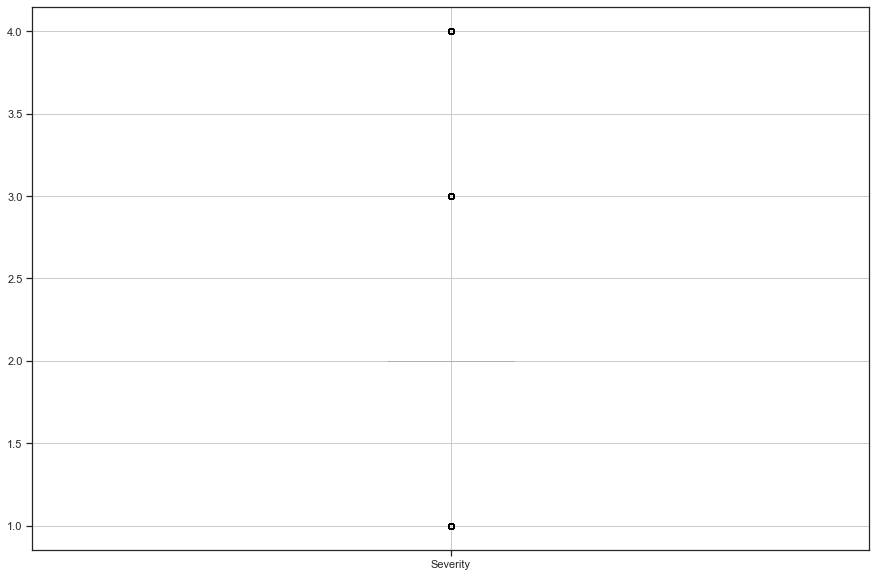

In [109]:
train.boxplot(column= "Severity")

<AxesSubplot:>

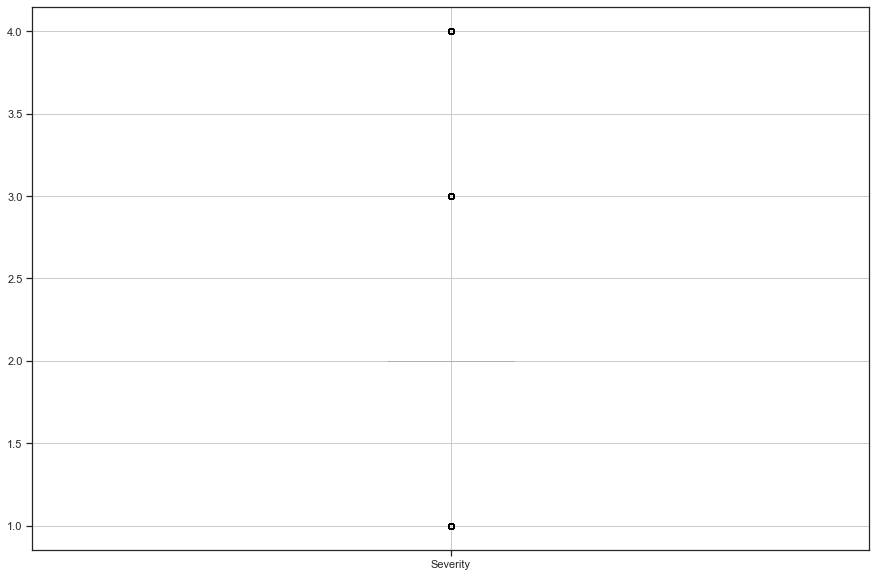

In [110]:
val.boxplot(column= "Severity")

<b> "Start_Lat"

<AxesSubplot:>

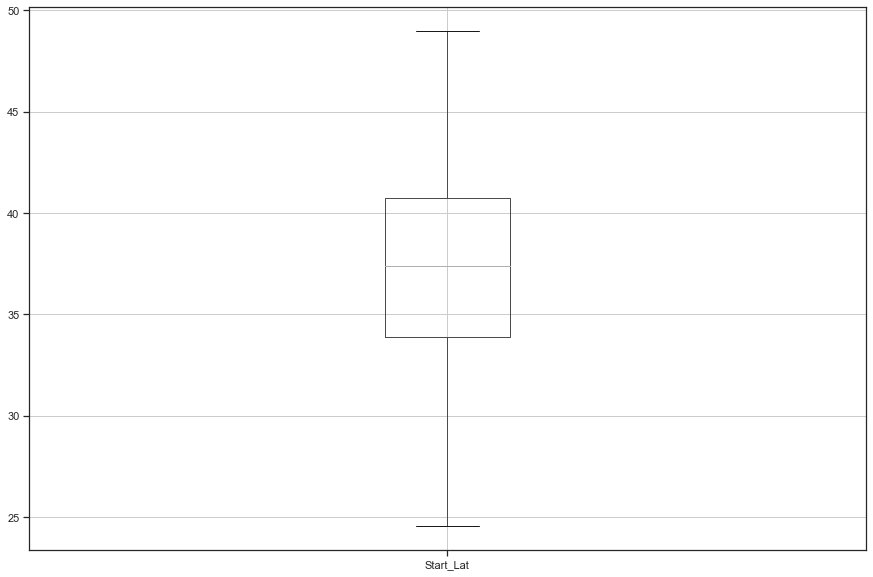

In [111]:
test.boxplot(column= "Start_Lat")

<AxesSubplot:>

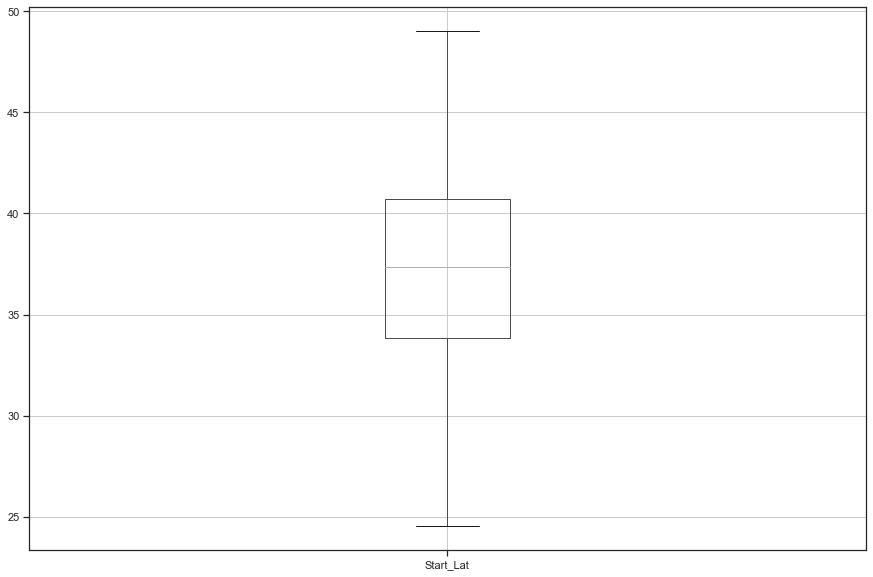

In [112]:
train.boxplot(column= "Start_Lat")

<AxesSubplot:>

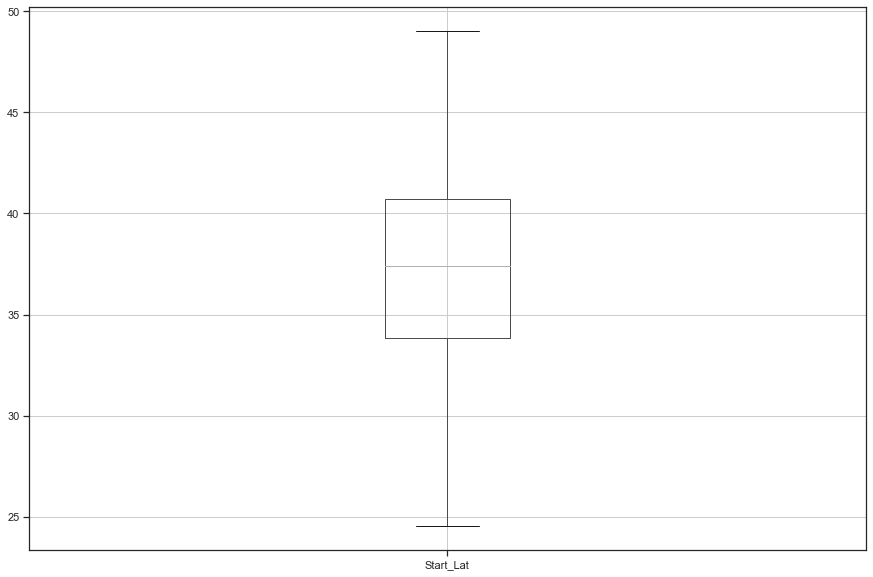

In [113]:
val.boxplot(column= "Start_Lat")

<b> "Start_Lng"

<AxesSubplot:>

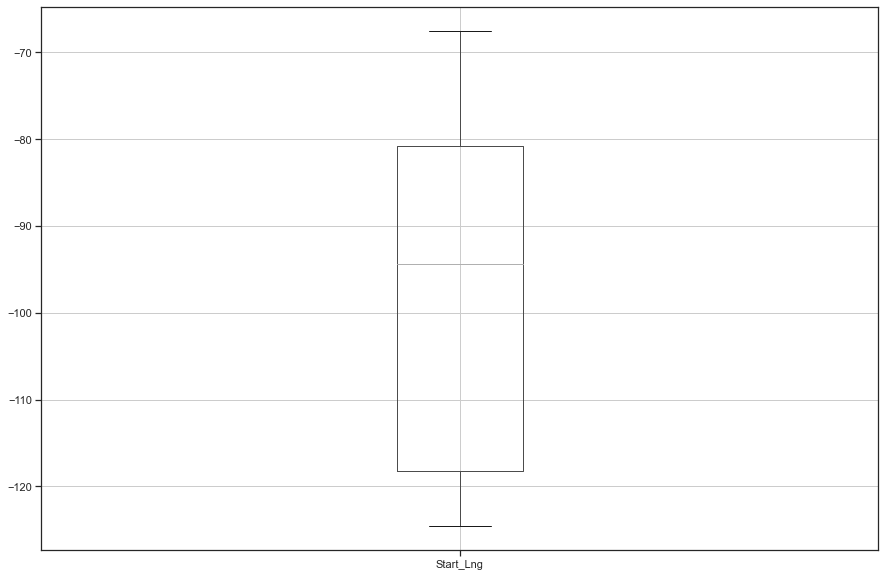

In [114]:
test.boxplot(column= "Start_Lng")

<AxesSubplot:>

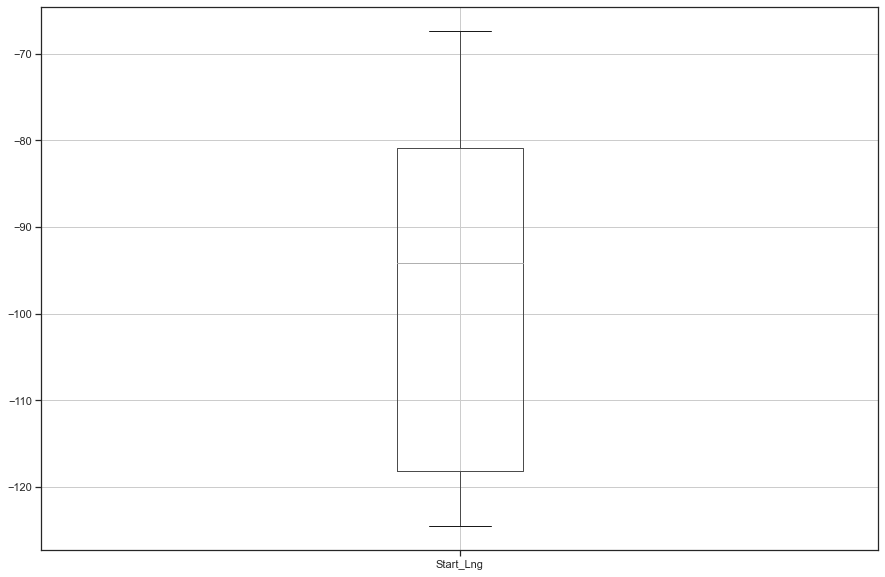

In [115]:
train.boxplot(column= "Start_Lng")

<AxesSubplot:>

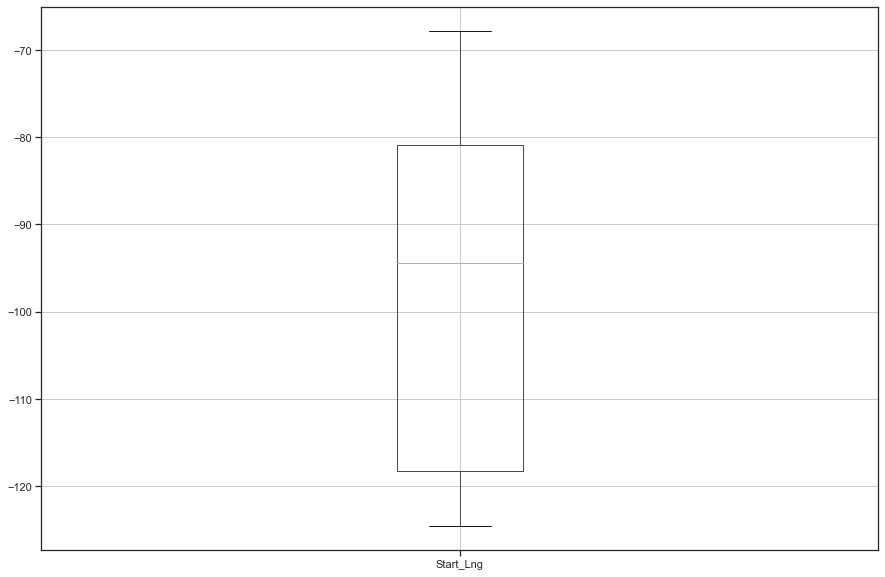

In [116]:
val.boxplot(column= "Start_Lng")

<b> "End_Lat"

<AxesSubplot:>

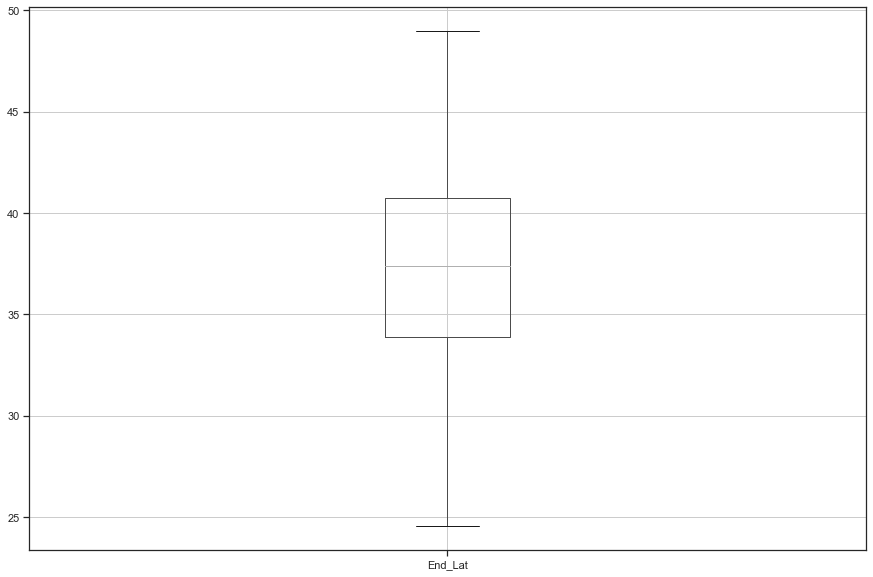

In [117]:
test.boxplot(column= "End_Lat")

<AxesSubplot:>

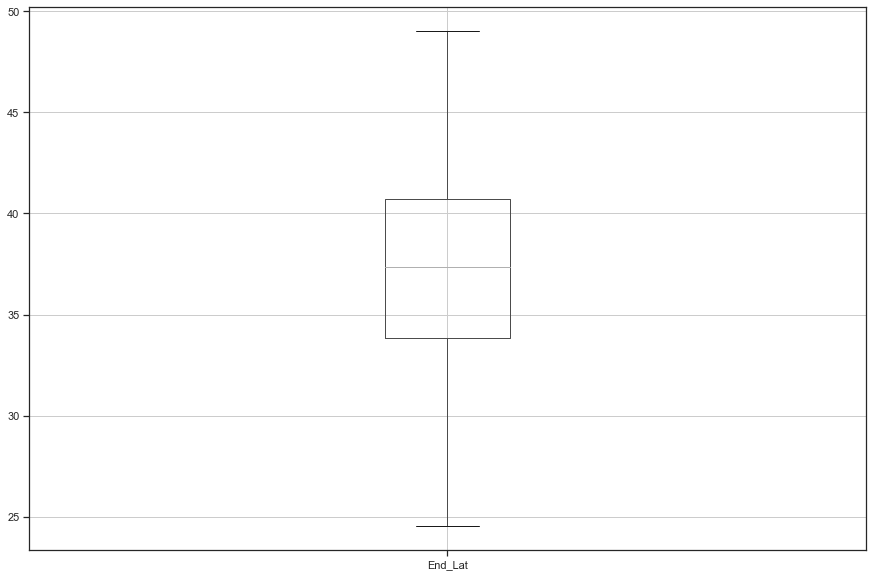

In [118]:
train.boxplot(column= "End_Lat")

<AxesSubplot:>

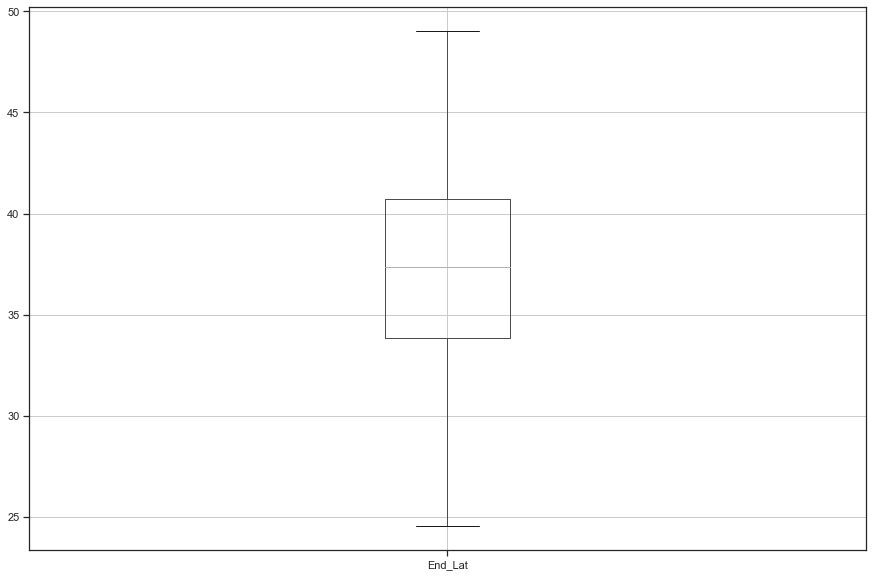

In [119]:
val.boxplot(column= "End_Lat")

<b> "End_Lng"

<AxesSubplot:>

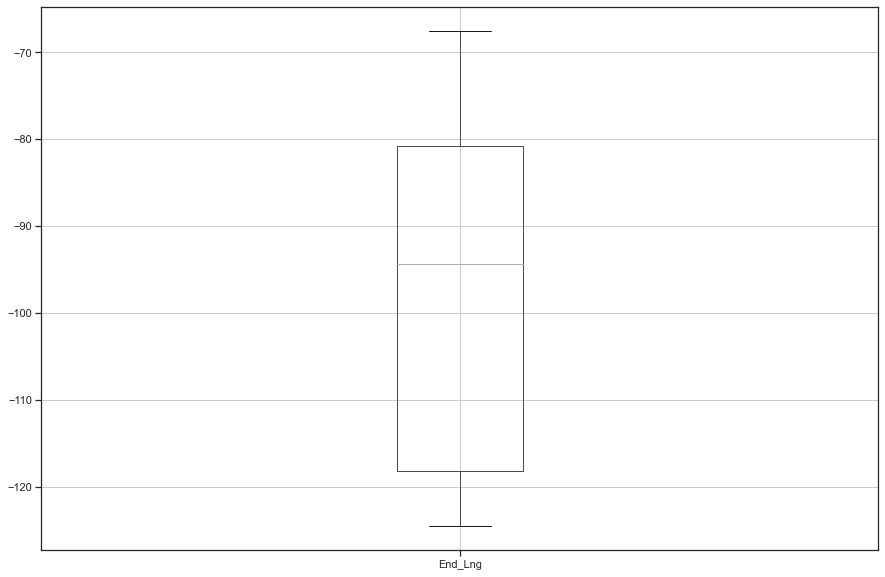

In [120]:
test.boxplot(column= "End_Lng")

<AxesSubplot:>

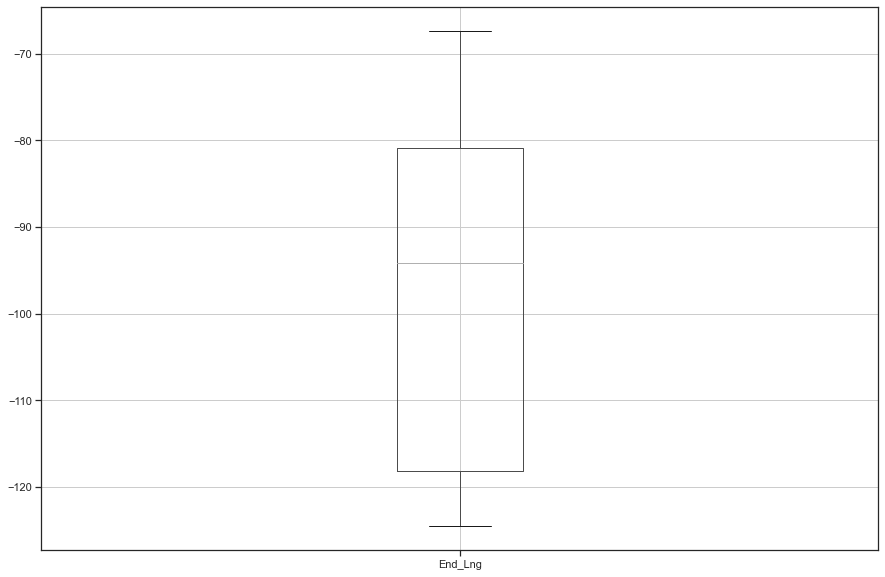

In [121]:
train.boxplot(column= "End_Lng")

<AxesSubplot:>

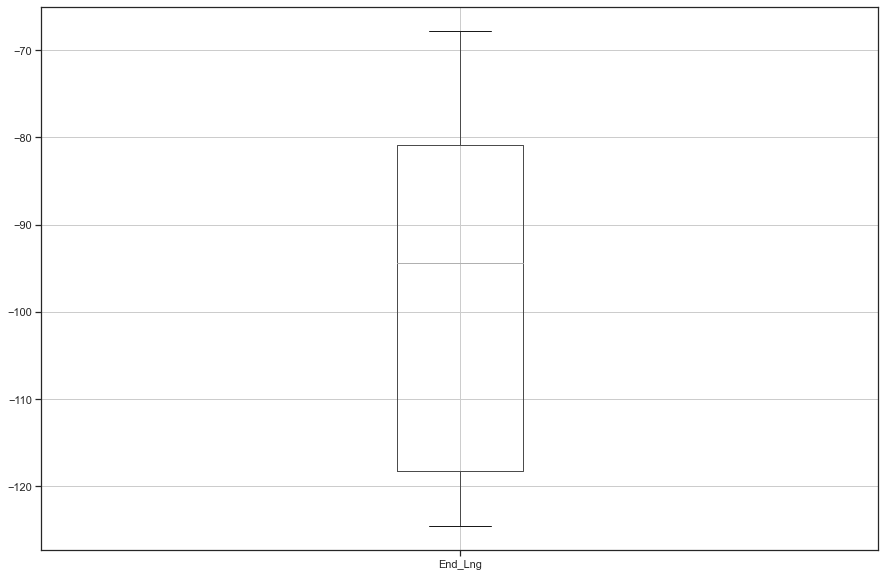

In [122]:
val.boxplot(column= "End_Lng")

<b> "Distance(mi)"

<AxesSubplot:>

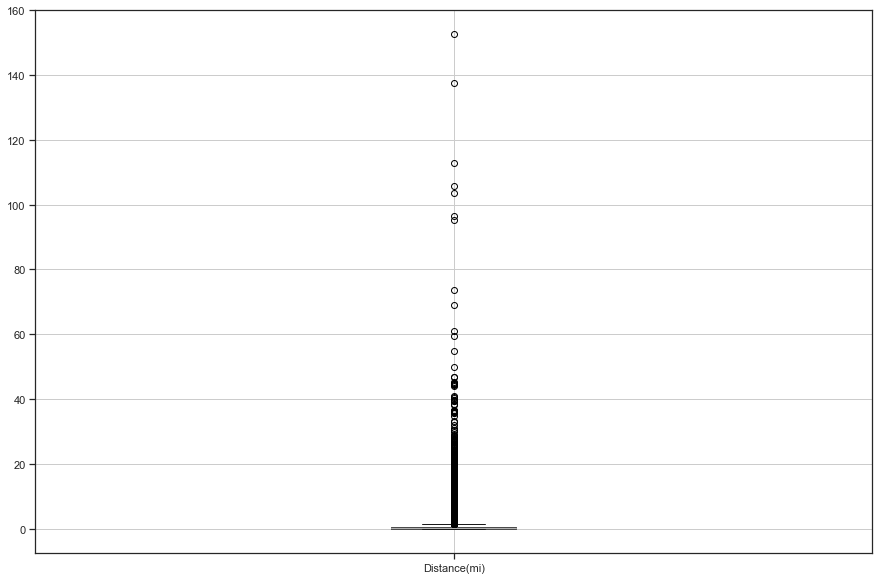

In [123]:
test.boxplot(column= "Distance(mi)")

<AxesSubplot:>

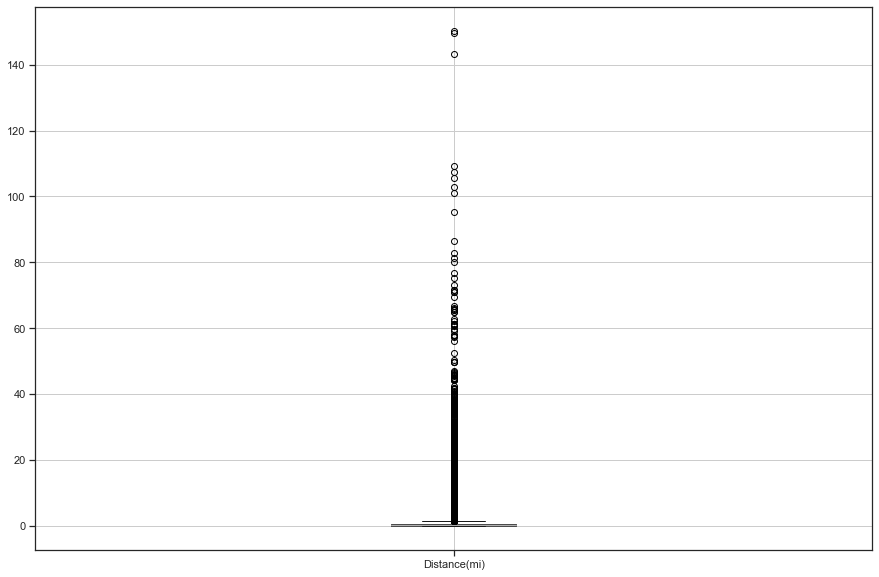

In [124]:
train.boxplot(column= "Distance(mi)")

<AxesSubplot:>

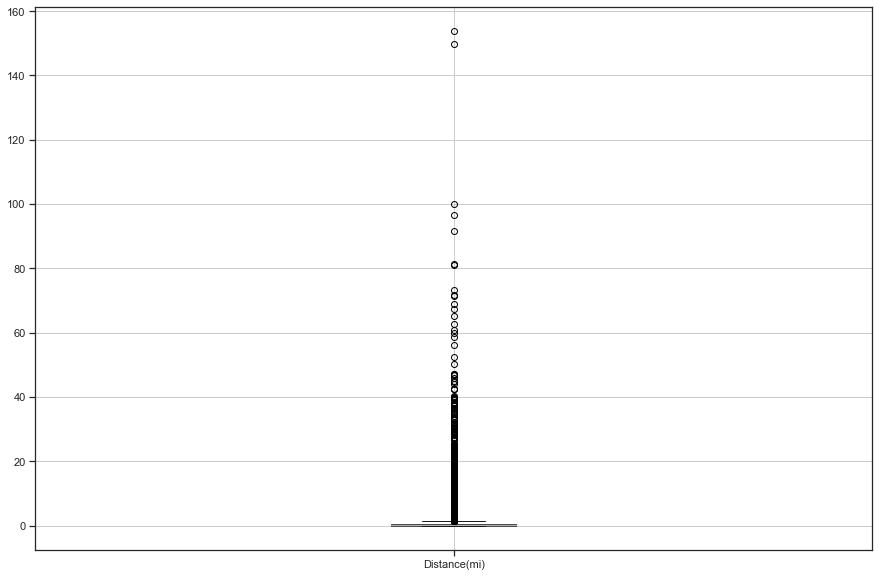

In [125]:
val.boxplot(column= "Distance(mi)")

<b> "Temperature(F)"

<AxesSubplot:>

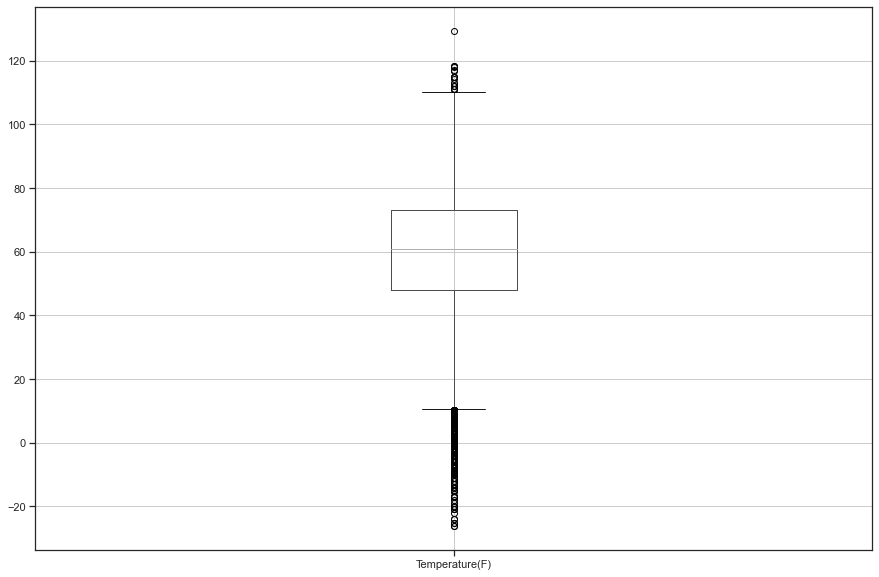

In [126]:
test.boxplot(column= "Temperature(F)")

<AxesSubplot:>

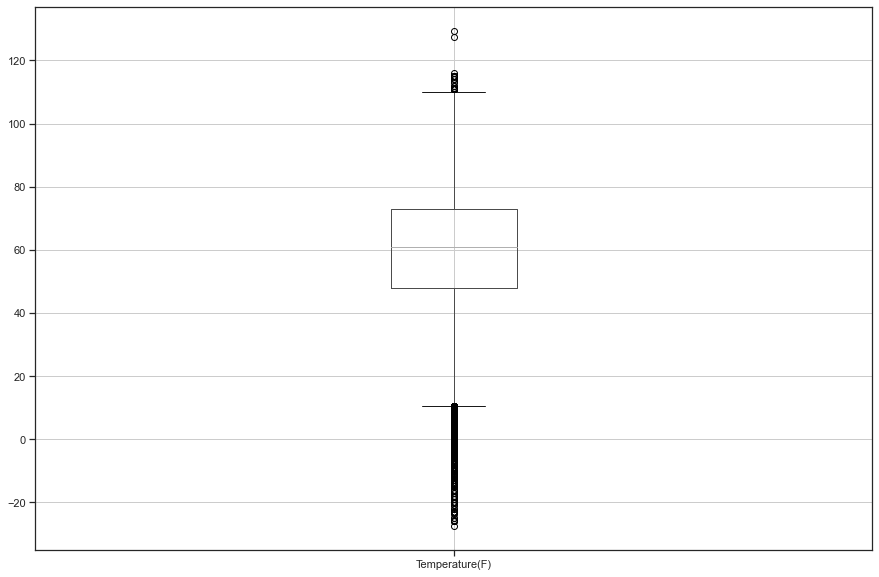

In [127]:
train.boxplot(column= "Temperature(F)")

<AxesSubplot:>

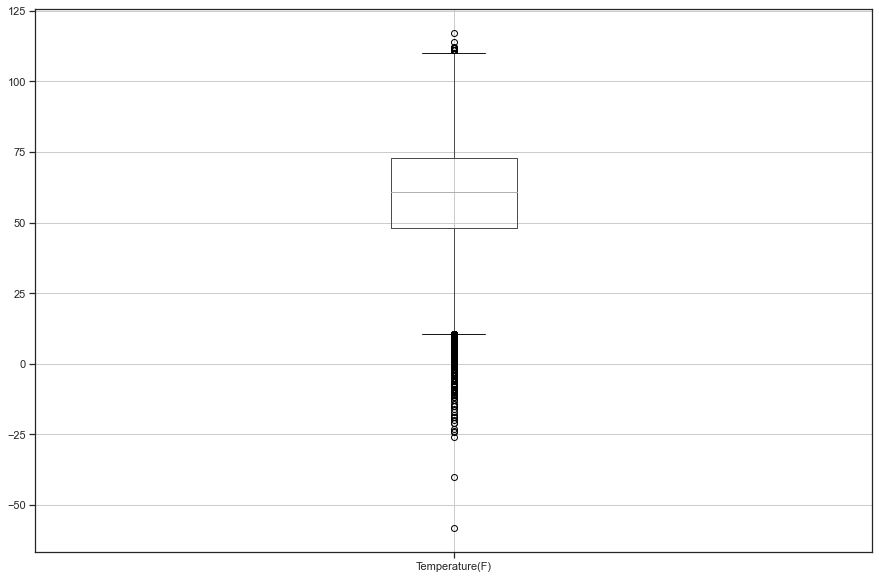

In [128]:
val.boxplot(column= "Temperature(F)")

<b> "Wind_Chill(F)"

<AxesSubplot:>

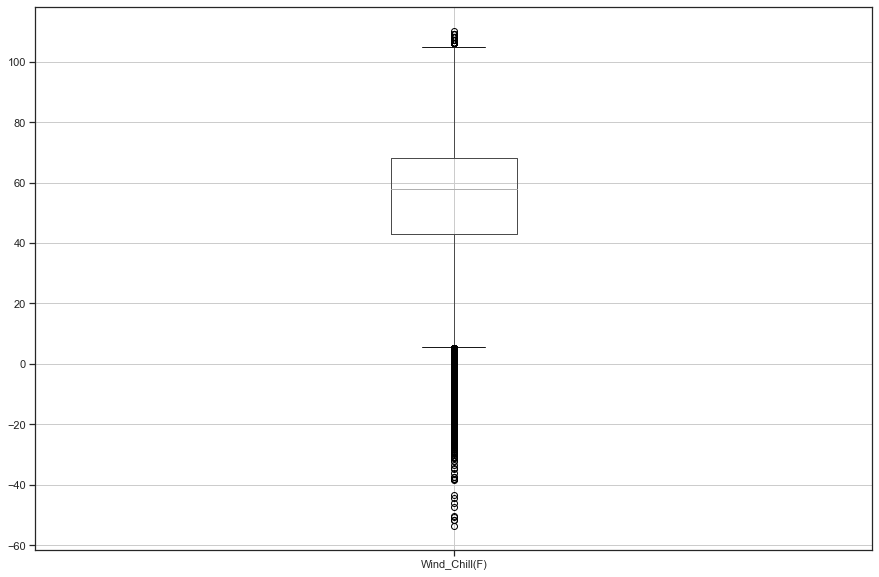

In [129]:
test.boxplot(column= "Wind_Chill(F)")

<AxesSubplot:>

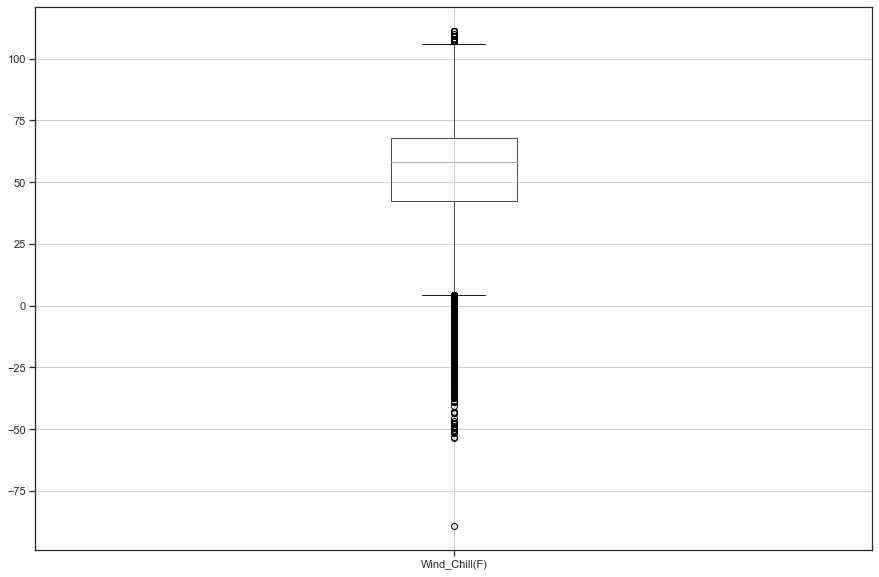

In [130]:
train.boxplot(column= "Wind_Chill(F)")

<AxesSubplot:>

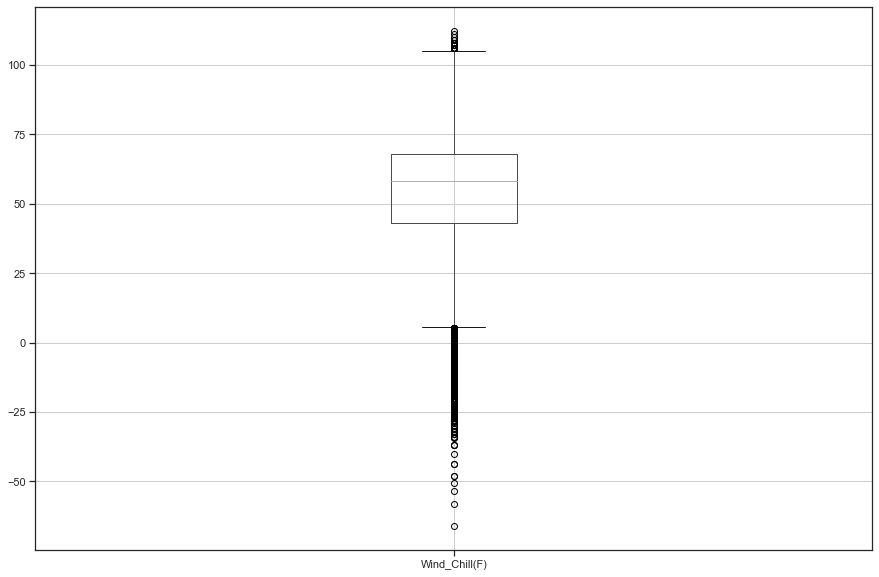

In [131]:
val.boxplot(column= "Wind_Chill(F)")

<b> "Humidity(%)"

<AxesSubplot:>

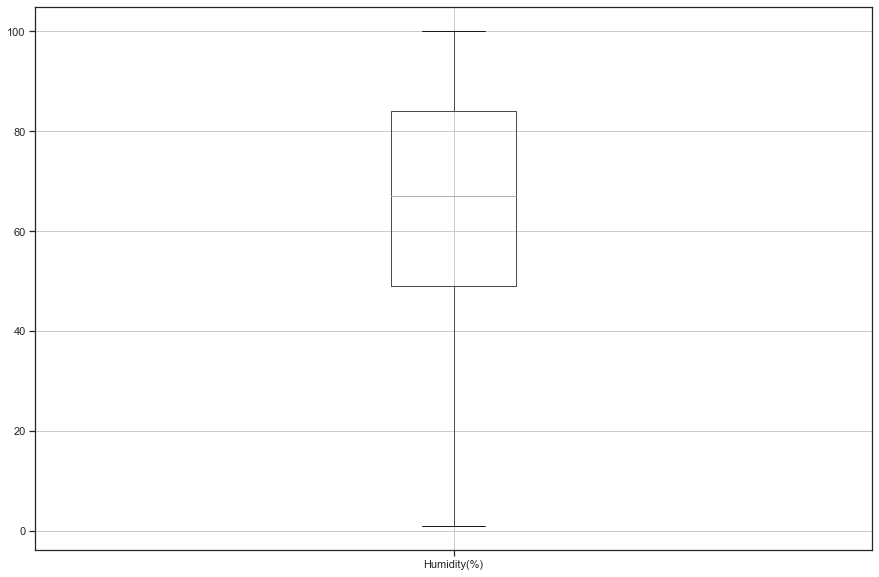

In [132]:
test.boxplot(column= "Humidity(%)")

<AxesSubplot:>

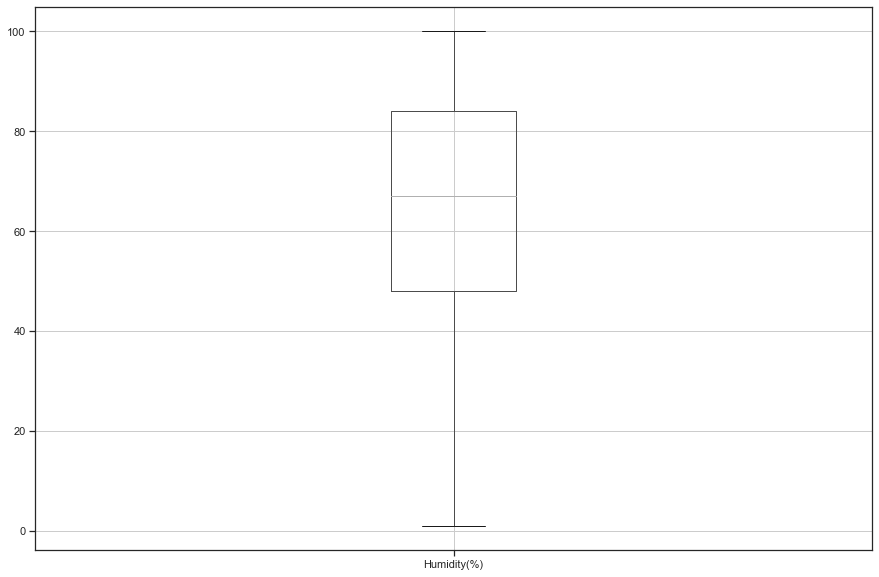

In [133]:
train.boxplot(column= "Humidity(%)")

<AxesSubplot:>

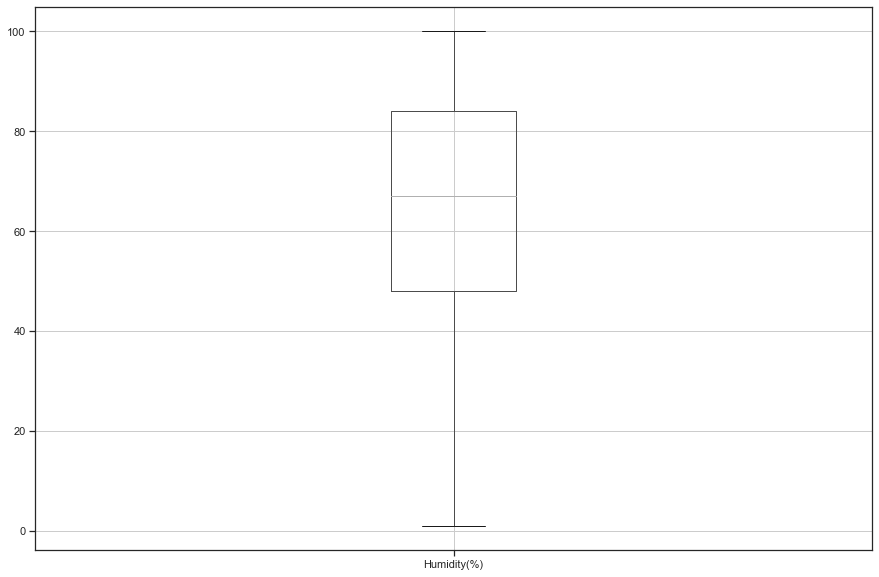

In [134]:
val.boxplot(column= "Humidity(%)")

<b> "Pressure(in)"

<AxesSubplot:>

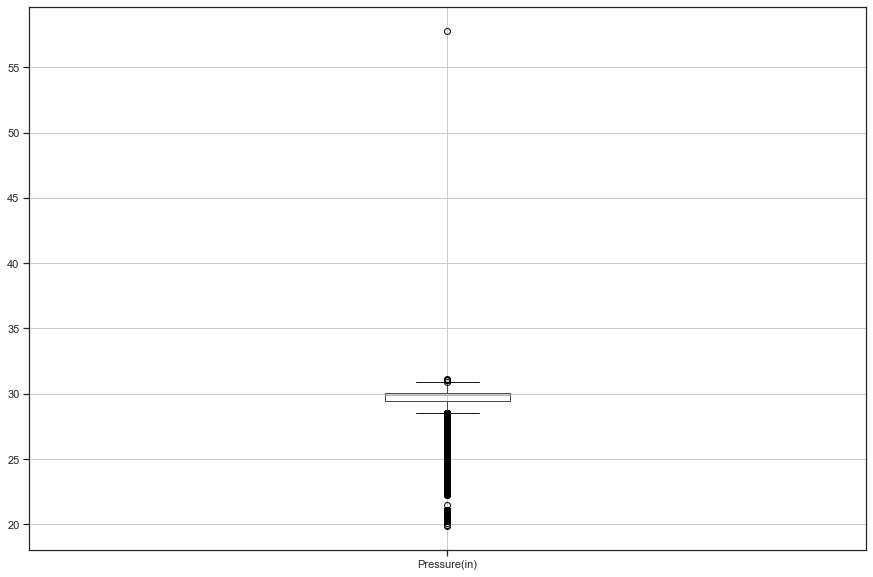

In [135]:
test.boxplot(column= "Pressure(in)")

<AxesSubplot:>

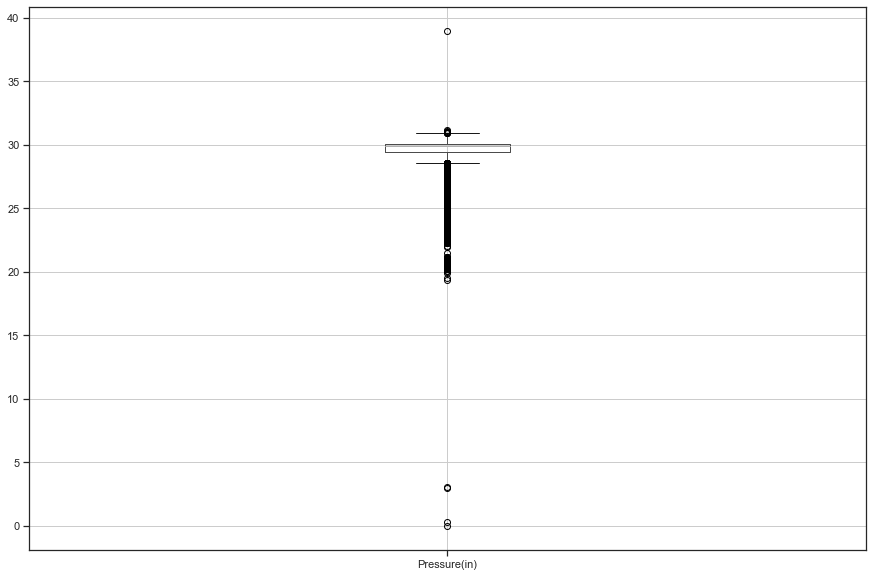

In [136]:
train.boxplot(column= "Pressure(in)")

<AxesSubplot:>

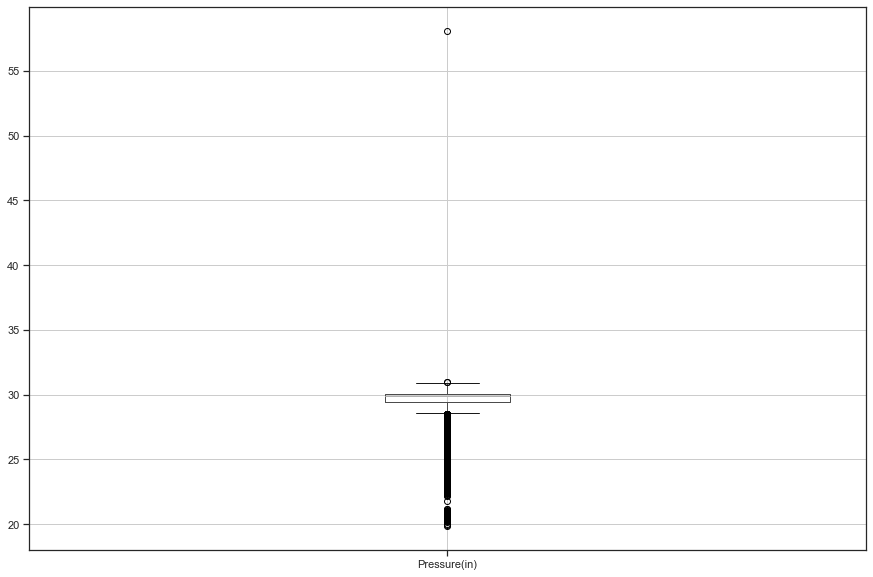

In [137]:
val.boxplot(column= "Pressure(in)")

<b> "Visibility(mi)"

<AxesSubplot:>

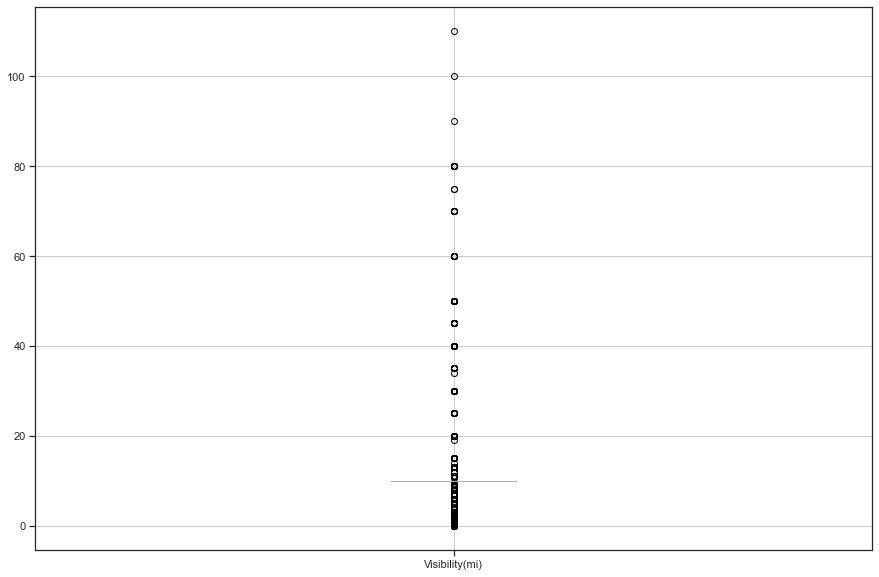

In [138]:
test.boxplot(column= "Visibility(mi)")

<AxesSubplot:>

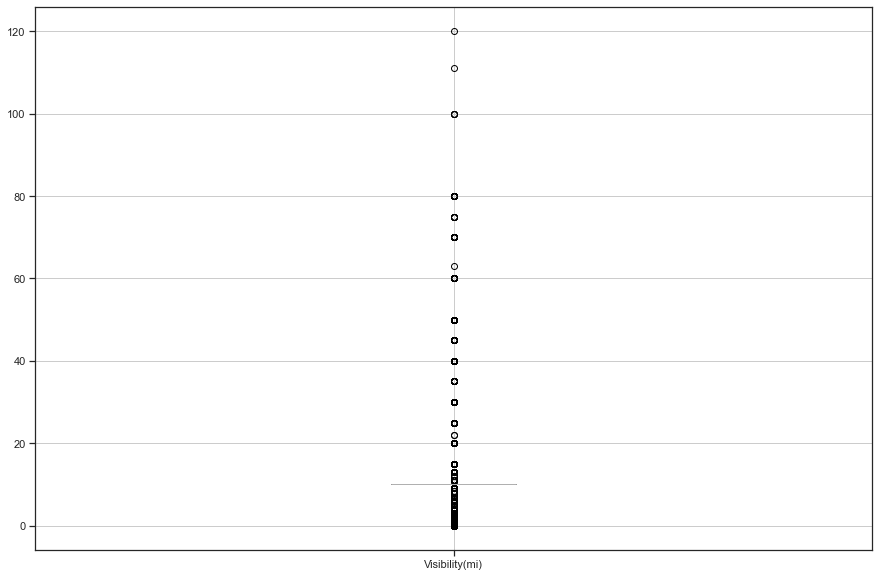

In [139]:
train.boxplot(column= "Visibility(mi)")

<AxesSubplot:>

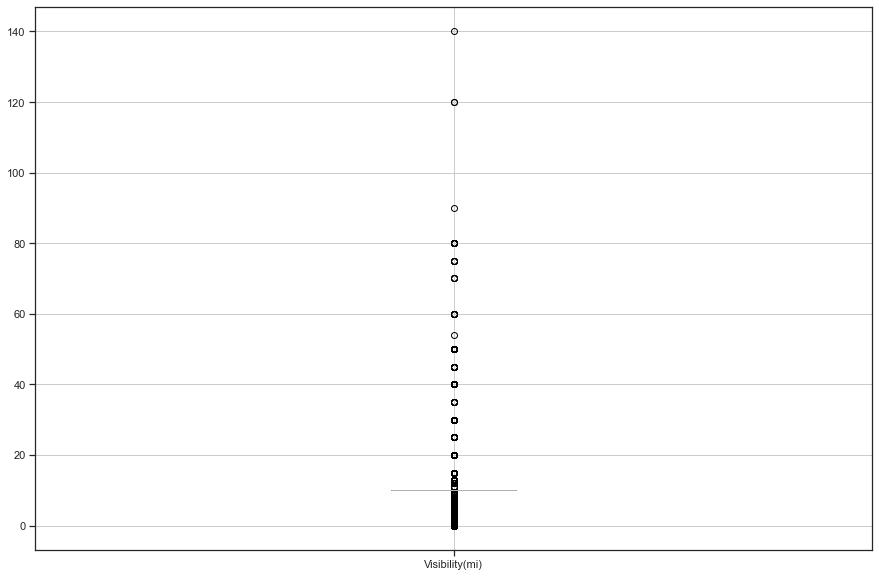

In [140]:
val.boxplot(column= "Visibility(mi)")

<b> "Wind_Speed(mph)"

<AxesSubplot:>

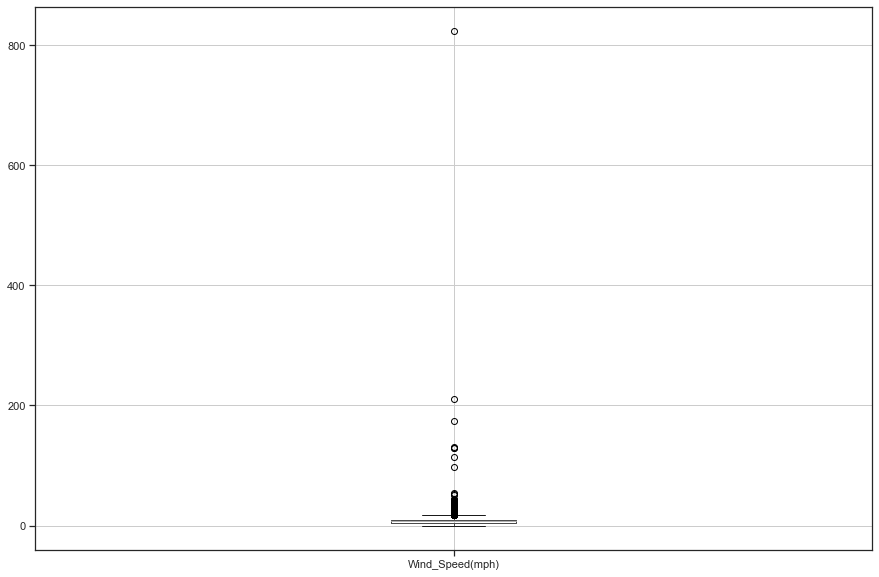

In [141]:
test.boxplot(column= "Wind_Speed(mph)")

<AxesSubplot:>

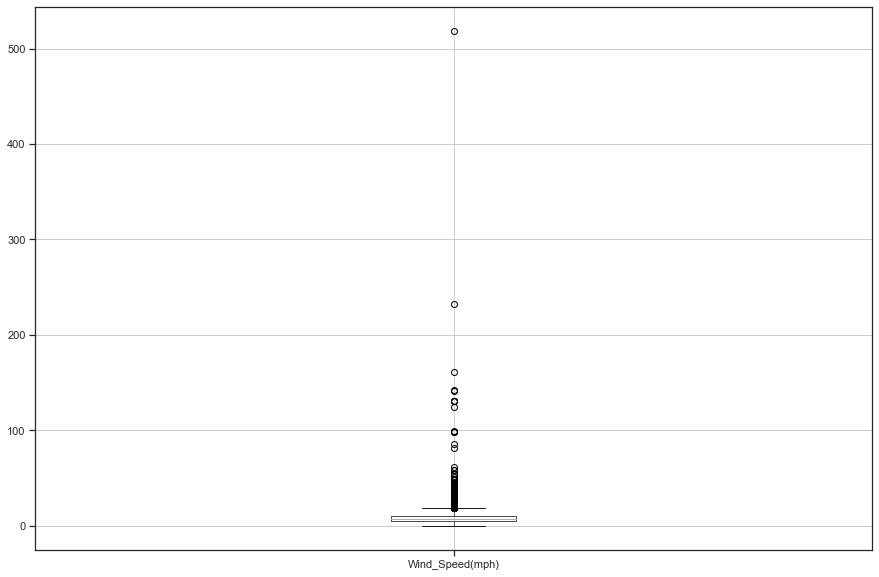

In [142]:
train.boxplot(column= "Wind_Speed(mph)")

<AxesSubplot:>

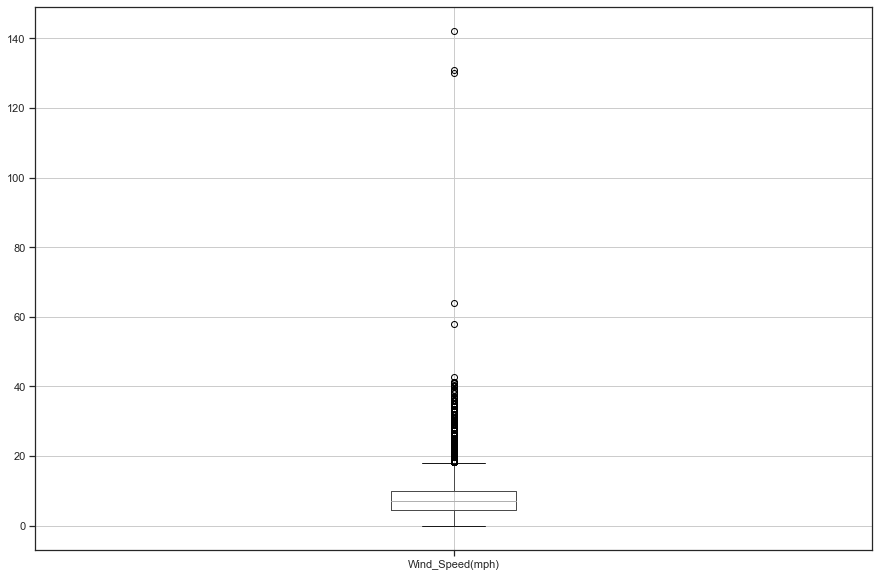

In [143]:
val.boxplot(column= "Wind_Speed(mph)")

<b> Precipitation(in) column 

<b> "test" dataframe

<AxesSubplot:>

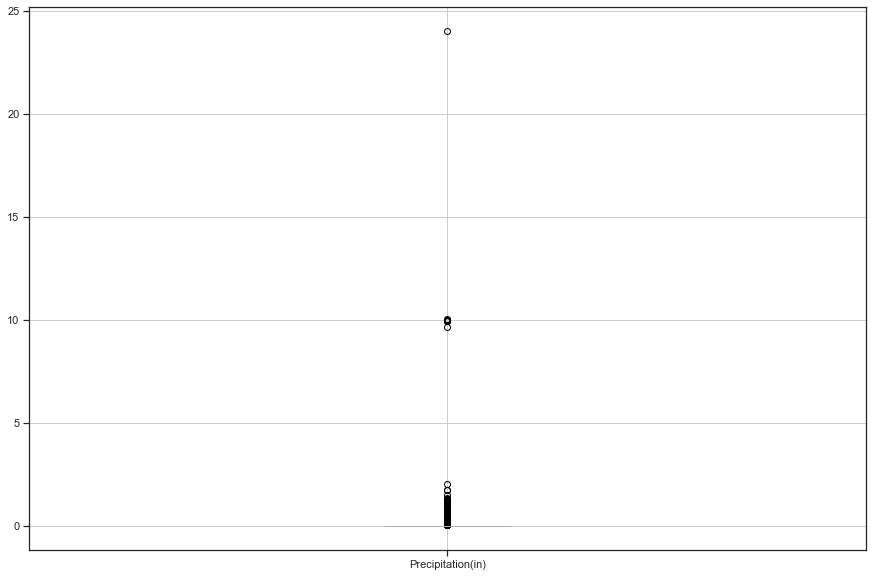

In [144]:
test.boxplot(column= "Precipitation(in)")

<b> "train" dataframe

<AxesSubplot:>

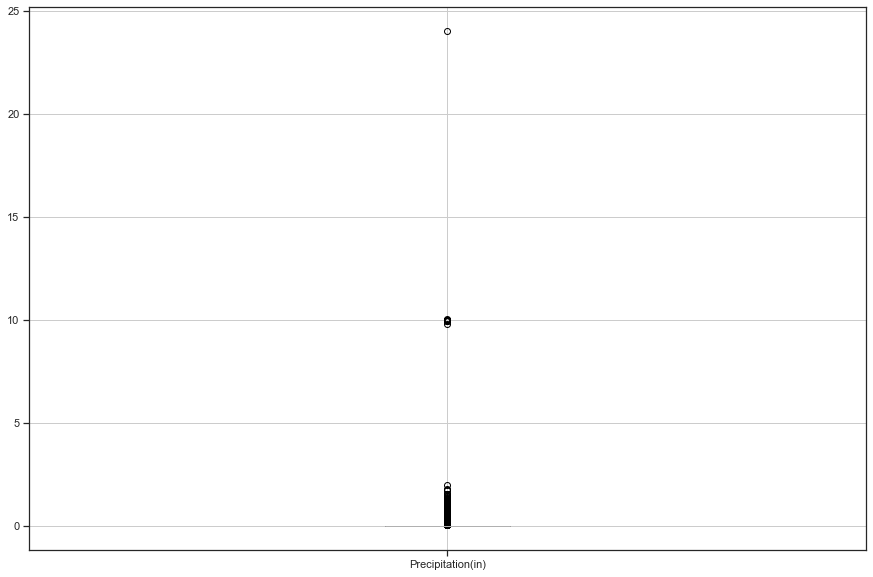

In [145]:
train.boxplot(column= "Precipitation(in)")

<b> "val" dataframe

<AxesSubplot:>

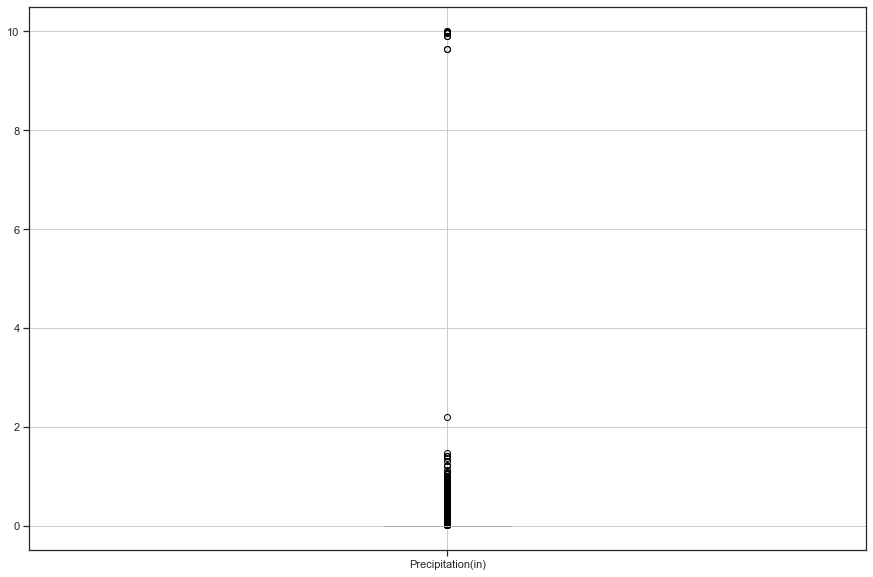

In [146]:
val.boxplot(column= "Precipitation(in)")

Base on the drawn box plot, in the "Distance(mi)", "Pressure(in)", "Visibility(mi)", and "Wind_Speed(mph)" columns have outliers. Although, the numbers in these columns can be high owing to the difference in county, all the outliers should be removed. The reason is the larger the range of the number is the greater the scale of these collumns will be and when they are displayed in the graph, although, may be those number can be valid, but it is still displayed as if they are outliers. These outliers will be replaced with the mean in order to make the plot more meaningfull.

### Dealing outliers with IQR-distance from Median

There are 3 common method for dealing outliers which are Z-Score, Quantile Filter, IQR-distance from Median. The Z-Score measures mean and std so that the Z-Score becomes inconspicious. Hence, the assessmnent of outliers may be distorted. The Quantile Filter is a better approach, nevertheles, it can remove some of the part are not the outliers and such a considerable amount of valid data would be lost, while the outliers are still there.

In a data set, there are five numbers which are the minimum called Q0, the lower quartile called Q1, median called Q2, and the upper quartile called Q3, and the maximum called Q4. Those Q1, Q2, Q3 means: 
<br> 
-Q1: bigger than 1 quater of the data.
<br>
-Q2: bigger than 2 quater (a half) of the data.
<brt>
-Q3: bigger than 3 quater of the data.
<br>
Measuring the spread is measuring the InterQuatile Range or IQR is an ancronyms for it. The IQR demonstrates how the spread out the middle half of that data is. Hence, by meassuring IQR, those values which are much farther from the center are identied, and recognised as outliers.
<br>
<br>
<b> REFERENCE: https://www.sfu.ca/~jackd/Stat203_2011/Wk02_1_Full.pdf 
               <br>
               https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
               <br>
               https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

<b> "test" dataframe

<b> "Distance(mi)" column

In [147]:
Q1 = np.percentile(test['Distance(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(test['Distance(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(test['Distance(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(test['Distance(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
test.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null
test.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null

<b> "Pressure(in)" column

In [148]:
Q1 = np.percentile(test['Pressure(in)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(test['Pressure(in)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(test['Pressure(in)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(test['Pressure(in)'] <= (Q1-1.5*IQR))
 
#Remove outliers
test.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null
test.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null

<b> "Visibility(mi)" column

In [149]:
Q1 = np.percentile(test['Visibility(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(test['Visibility(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(test['Visibility(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(test['Visibility(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
test.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null
test.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null

<b> "Wind_Speed(mph)" column

In [150]:
Q1 = np.percentile(test['Wind_Speed(mph)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(test['Wind_Speed(mph)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(test['Wind_Speed(mph)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(test['Wind_Speed(mph)'] <= (Q1-1.5*IQR))
 
#Remove outliers
test.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null
test.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null

<b> "train" dataframe

<b> "Distance(mi)" column

In [151]:
Q1 = np.percentile(train['Distance(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['Distance(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(train['Distance(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Distance(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
train.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null
train.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null

<b> "Pressure(in)" column

In [152]:
Q1 = np.percentile(train['Pressure(in)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['Pressure(in)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(train['Pressure(in)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Pressure(in)'] <= (Q1-1.5*IQR))
 
#Remove outliers
train.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null
train.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null

<b> "Visibility(mi)" column

In [153]:
Q1 = np.percentile(train['Visibility(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['Visibility(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(train['Visibility(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Visibility(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
train.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null
train.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null

<b> "Wind_Speed(mph)" column

In [154]:
Q1 = np.percentile(train['Wind_Speed(mph)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['Wind_Speed(mph)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(train['Wind_Speed(mph)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Wind_Speed(mph)'] <= (Q1-1.5*IQR))
 
#Remove outliers
train.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null
train.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null

<b> "val" dataframe

<b> "Distance(mi)" column

In [155]:
Q1 = np.percentile(val['Distance(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(val['Distance(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(val['Distance(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(val['Distance(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
val.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null
val.loc[upper[0], 'Distance(mi)'] = np.nan #replace with null

<b> "Pressure(in)" column

In [156]:
Q1 = np.percentile(val['Pressure(in)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(val['Pressure(in)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(val['Pressure(in)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(val['Pressure(in)'] <= (Q1-1.5*IQR))
 
#Remove outliers
val.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null
val.loc[upper[0], 'Pressure(in)'] = np.nan #replace with null

<b> "Visibility(mi)" column

In [157]:
Q1 = np.percentile(val['Visibility(mi)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(val['Visibility(mi)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(val['Visibility(mi)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(val['Visibility(mi)'] <= (Q1-1.5*IQR))
 
#Remove outliers
val.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null
val.loc[upper[0], 'Visibility(mi)'] = np.nan #replace with null

<b> "Wind_Speed(mph)" column

In [158]:
Q1 = np.percentile(val['Wind_Speed(mph)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(val['Wind_Speed(mph)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(val['Wind_Speed(mph)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(val['Wind_Speed(mph)'] <= (Q1-1.5*IQR))
 
#Remove outliers
val.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null
val.loc[upper[0], 'Wind_Speed(mph)'] = np.nan #replace with null

<b> Filling null values

<b> "test" dataframe

In [159]:
#Filling NA values in "Distance"
test['Distance(mi)'] = test.groupby('County')['Distance(mi)'].apply(lambda x: x.fillna(x.median()))
test['Distance(mi)'].fillna(test['Distance(mi)'].median(), inplace=True)

#Filling NA values in "Pressure"
test['Pressure(in)'] = test.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
test['Pressure(in)'].fillna(test['Pressure(in)'].median(), inplace=True)

#Filling NA values in "Visibility"
test['Visibility(mi)'] = test.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
test['Visibility(mi)'].fillna(test['Visibility(mi)'].median(), inplace=True)

#Filling NA values in "Wind_Speed"
test['Wind_Speed(mph)'] = test.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
test['Wind_Speed(mph)'].fillna(test['Wind_Speed(mph)'].median(), inplace=True)

<b> "train" dataframe

In [160]:
#Filling NA values in "Severity"
train['Severity'] = train.groupby('County')['Severity'].apply(lambda x: x.fillna(x.median()))
train['Severity'].fillna(train['Severity'].median(), inplace=True)

#Filling NA values in "Distance"
train['Distance(mi)'] = train.groupby('County')['Distance(mi)'].apply(lambda x: x.fillna(x.median()))
train['Distance(mi)'].fillna(train['Distance(mi)'].median(), inplace=True)

#Filling NA values in "Pressure"
train['Pressure(in)'] = train.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
train['Pressure(in)'].fillna(train['Pressure(in)'].median(), inplace=True)

#Filling NA values in "Visibility"
train['Visibility(mi)'] = train.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
train['Visibility(mi)'].fillna(train['Visibility(mi)'].median(), inplace=True)

#Filling NA values in "Wind_Speed"
train['Wind_Speed(mph)'] = train.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
train['Wind_Speed(mph)'].fillna(train['Wind_Speed(mph)'].median(), inplace=True)

<b> "val" dataframe

In [161]:
#Filling NA values in "Severity"
val['Severity'] = val.groupby('County')['Severity'].apply(lambda x: x.fillna(x.median()))
val['Severity'].fillna(val['Severity'].median(), inplace=True)

#Filling NA values in "Distance"
val['Distance(mi)'] = val.groupby('County')['Distance(mi)'].apply(lambda x: x.fillna(x.median()))
val['Distance(mi)'].fillna(val['Distance(mi)'].median(), inplace=True)

#Filling NA values in "Pressure"
val['Pressure(in)'] = val.groupby('County')['Pressure(in)'].apply(lambda x: x.fillna(x.median()))
val['Pressure(in)'].fillna(val['Pressure(in)'].median(), inplace=True)

#Filling NA values in "Visibility"
val['Visibility(mi)'] = val.groupby('County')['Visibility(mi)'].apply(lambda x: x.fillna(x.median()))
val['Visibility(mi)'].fillna(val['Visibility(mi)'].median(), inplace=True)

#Filling NA values in "Wind_Speed"
val['Wind_Speed(mph)'] = val.groupby('County')['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.median()))
val['Wind_Speed(mph)'].fillna(val['Wind_Speed(mph)'].median(), inplace=True)

<b> Recheck the outliers

<b> "Severity"

<AxesSubplot:>

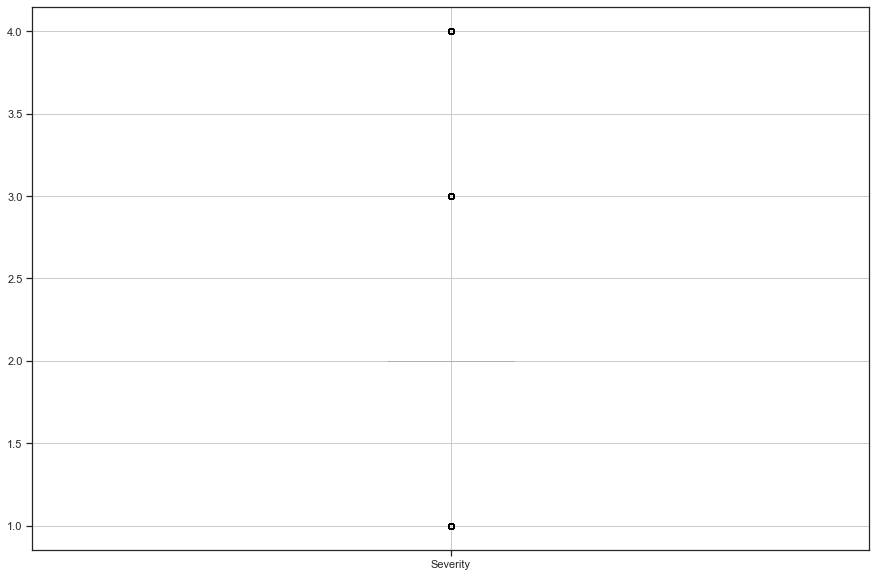

In [162]:
train.boxplot(column= "Severity")

<AxesSubplot:>

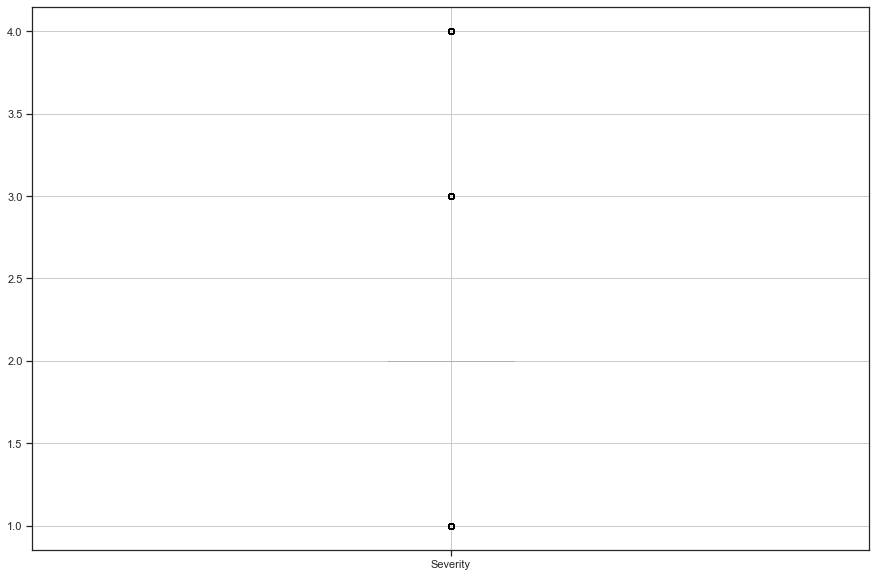

In [163]:
val.boxplot(column= "Severity")

<b> "Distance(mi)"

<AxesSubplot:>

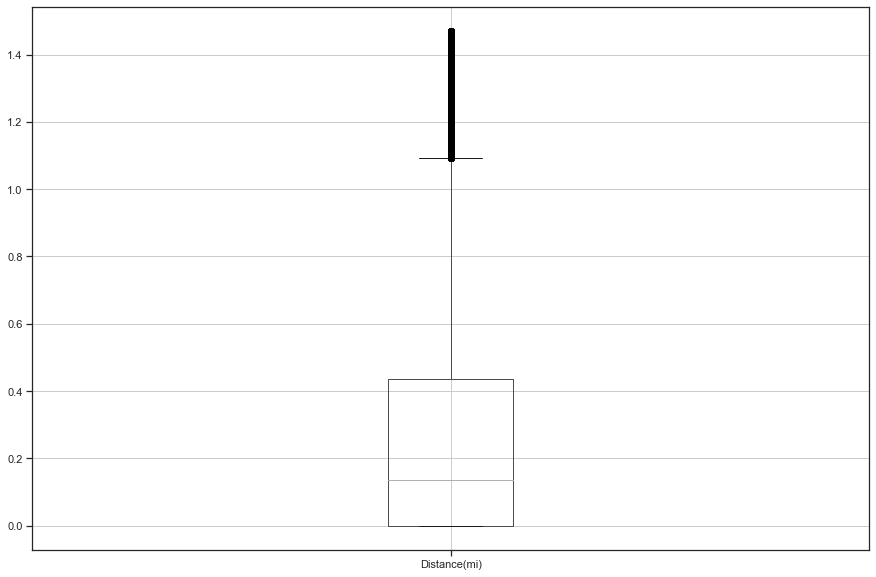

In [164]:
test.boxplot(column= "Distance(mi)")

<AxesSubplot:>

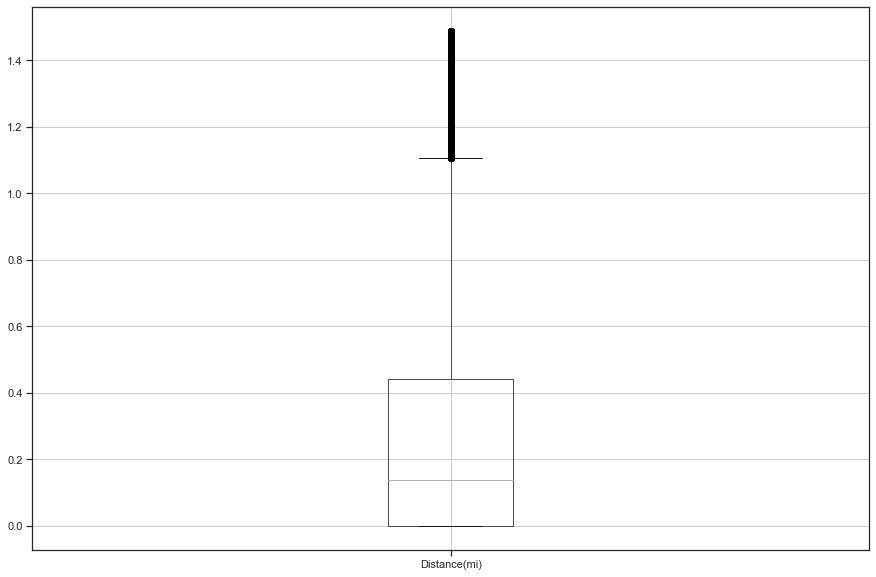

In [165]:
train.boxplot(column= "Distance(mi)")

<AxesSubplot:>

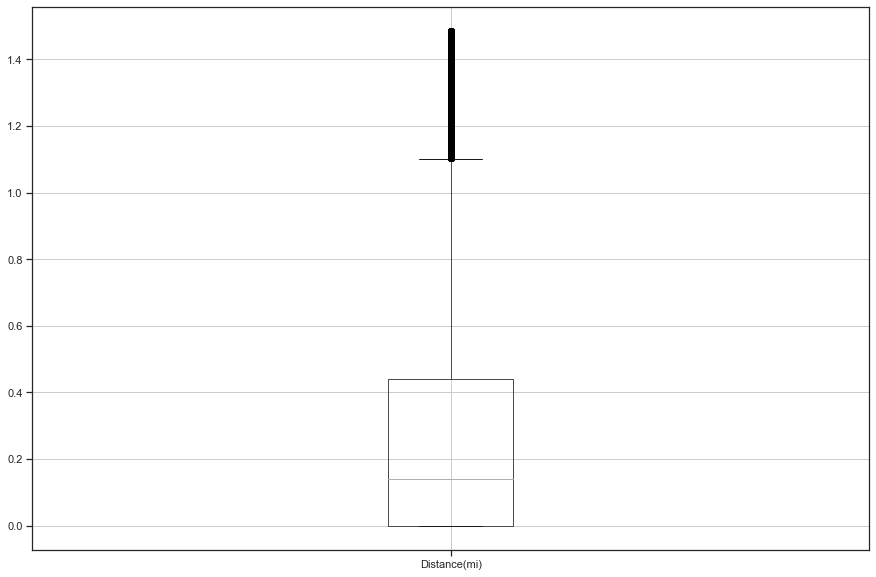

In [166]:
val.boxplot(column= "Distance(mi)")

<b> "Pressure(in)"

<AxesSubplot:>

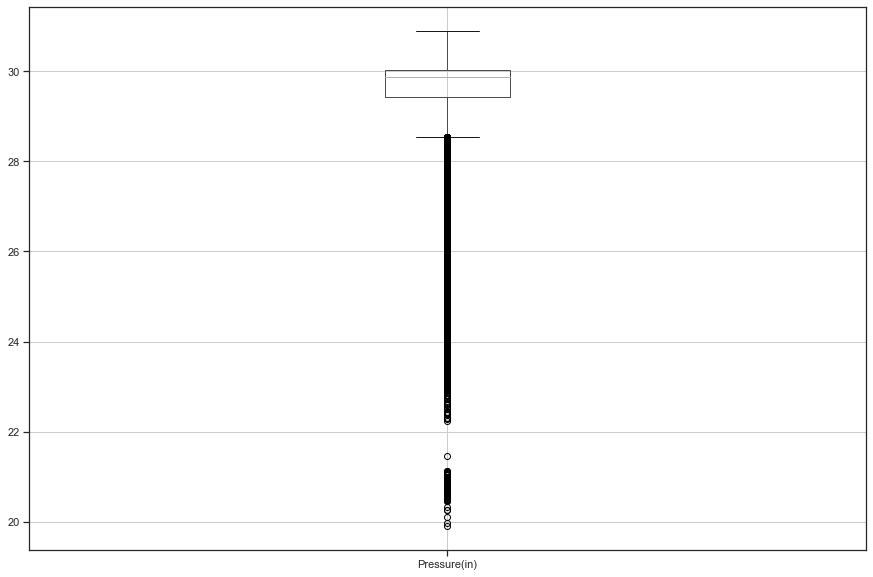

In [167]:
test.boxplot(column= "Pressure(in)")

<AxesSubplot:>

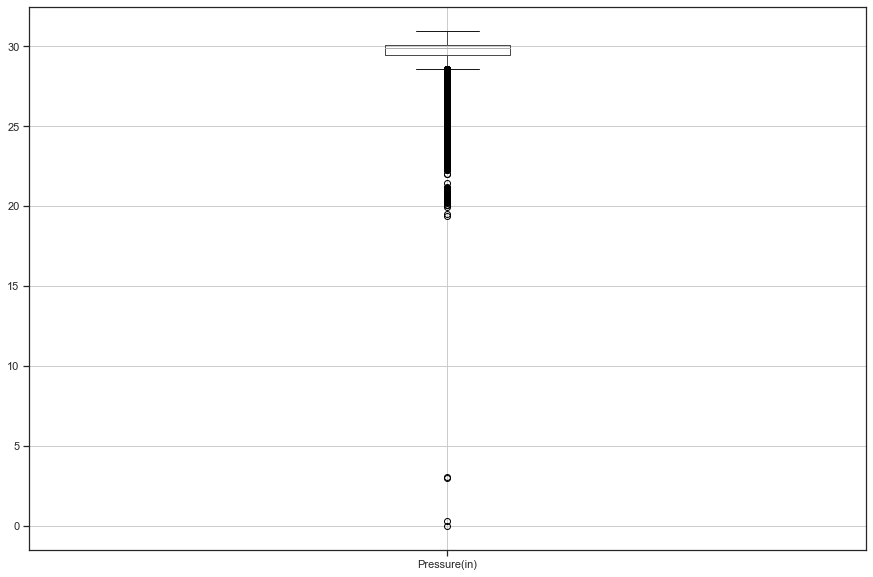

In [168]:
train.boxplot(column= "Pressure(in)")

<AxesSubplot:>

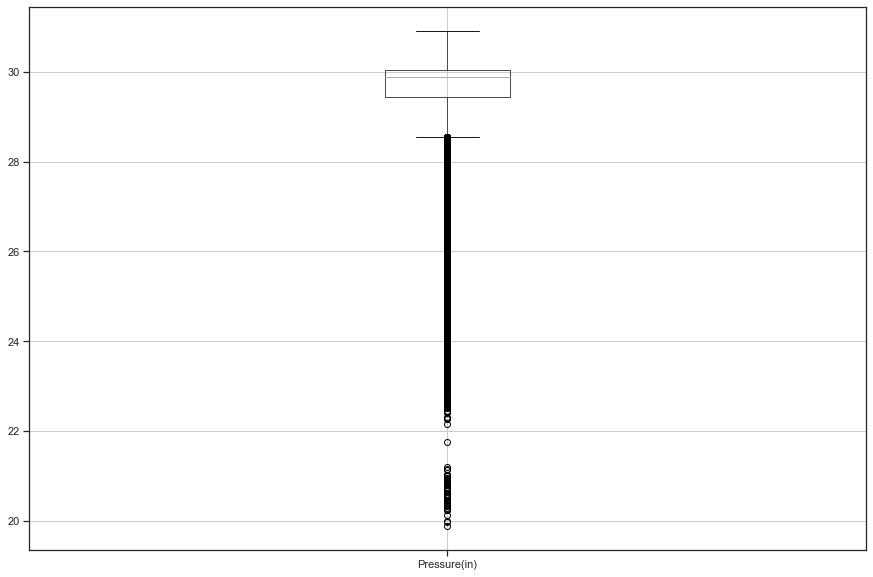

In [169]:
val.boxplot(column= "Pressure(in)")

<b> "Visibility(mi)"

<AxesSubplot:>

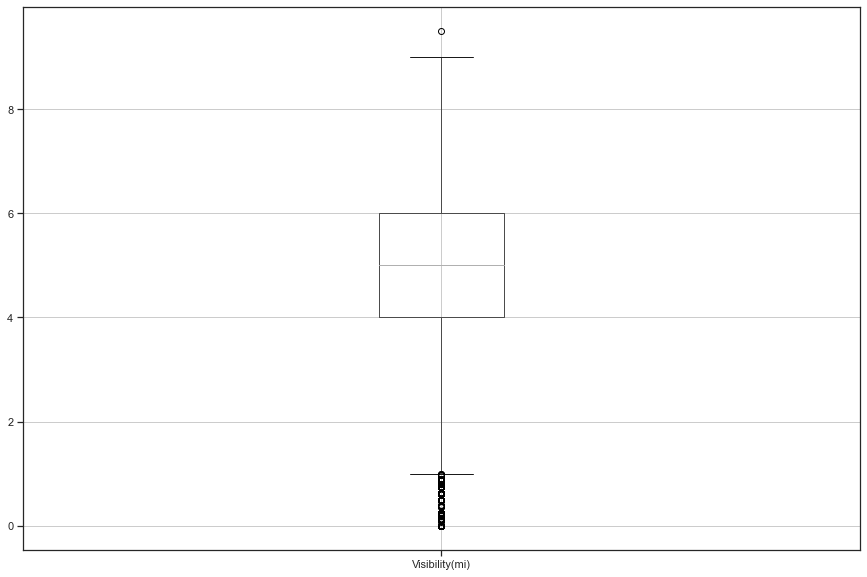

In [170]:
test.boxplot(column= "Visibility(mi)")

<AxesSubplot:>

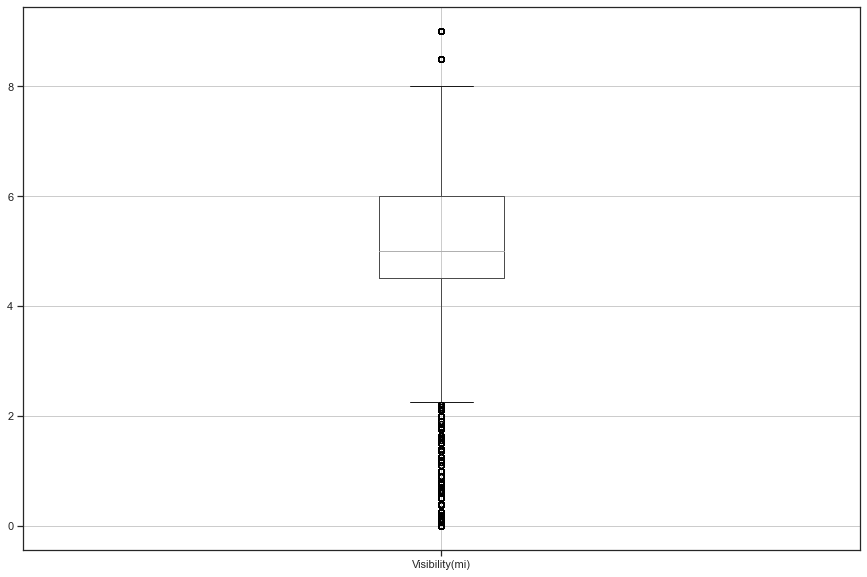

In [171]:
train.boxplot(column= "Visibility(mi)")

<AxesSubplot:>

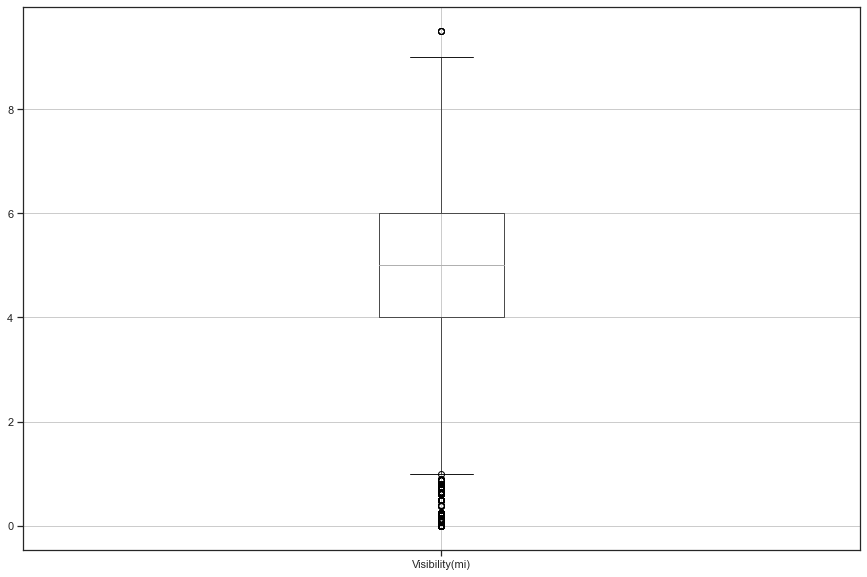

In [172]:
val.boxplot(column= "Visibility(mi)")

<b> "Wind_Speed(mph)"

<AxesSubplot:>

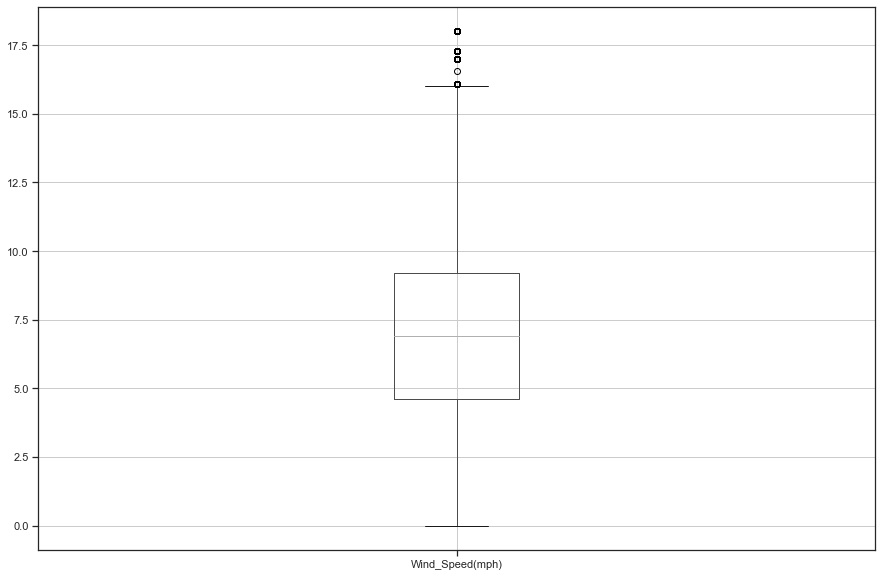

In [173]:
test.boxplot(column= "Wind_Speed(mph)")

<AxesSubplot:>

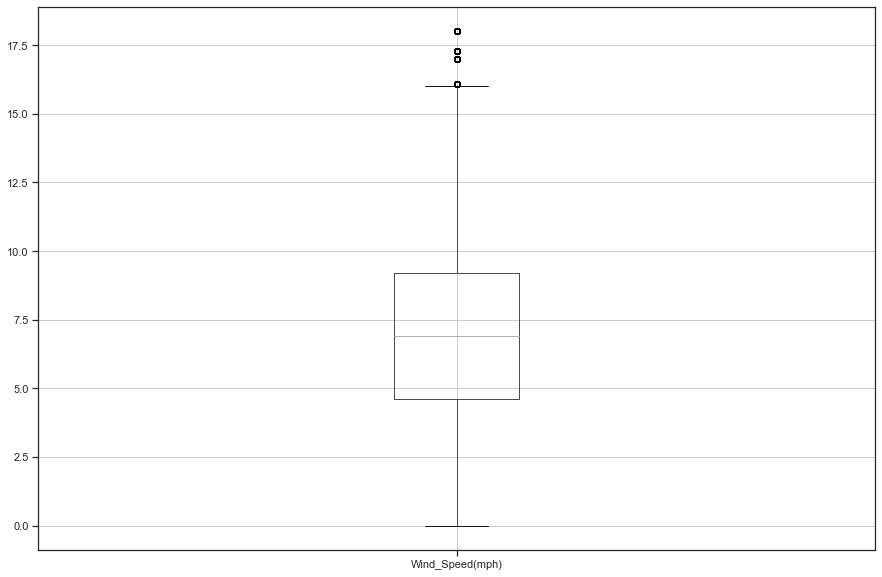

In [174]:
train.boxplot(column= "Wind_Speed(mph)")

<AxesSubplot:>

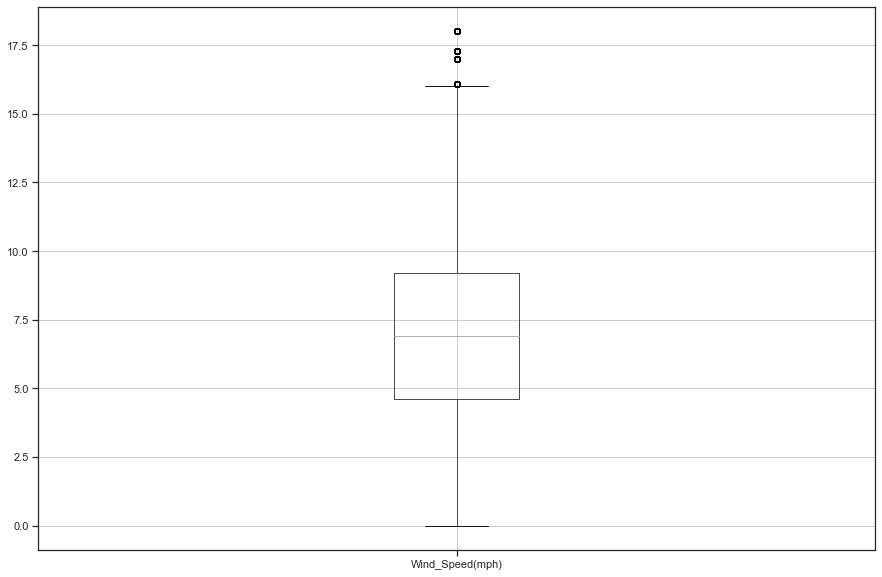

In [175]:
val.boxplot(column= "Wind_Speed(mph)")

### Save data to file

In [176]:
test.to_csv("Data/test_clean.csv", index_label=False)

In [177]:
train.to_csv("Data/train_clean.csv", index_label=False)

In [178]:
val.to_csv("Data/val_clean.csv", index_label=False)

# Task 2: Visualization and Feature Relations
<a id="visualization_and_feature_relations" ></a>
***
Before finding relations between independent variables and our dependent variable (Severity), there are some assumptions about how the relations may turn-out among features.

**Assumptions:**
- Severity: The number of high severity is higher than the low ones
- Weather_Condition: More serious number of weather condition occured during the traffic accidents.
- Sunrise_Sunset: More traffic accident occured in day time than night time
- Temperature: The number of extreme temperature is higher than the ideal ones. The extreme weather has the higer severity level
- Humidity: The number of extreme humidity is higher than the ideal ones
- Start_Lng: some locations have longtitude which makes their weather condition is more extreme than other, and so does the severity level.

These columns are chosen since the target is to identify where is likely to cause higher severity than others, in which weather condition, hudmidity and temperature has the higher level of severity.

### "Weather_Condition" column

Since there are a lot of catergories of "Weather_Condition" has the long string and repeat the values, so that seperating it into a new data frame and plot from that. However, it was not clean properply in the previous step so that it must be cleaned.

In [179]:
train = train.rename(columns={'Temperature(F)': 'Temperature', 'Humidity(%)': 'Humidity'})

In [180]:
train.Weather_Condition = train.Weather_Condition.str.split(' / ') #Split those string into a sub string

In [181]:
#create a new data frame for containning all values
New_df=pd.DataFrame({'Weather_Condition':np.concatenate(train.Weather_Condition.values), 
                     'Severity':train.Severity.repeat(train.Weather_Condition.apply(len)),
                     'Sunrise_Sunset':train.Sunrise_Sunset.repeat(train.Weather_Condition.apply(len)),
                     'Temperature':train.Temperature.repeat(train.Weather_Condition.apply(len)),
                     'Start_Lng':train.Temperature.repeat(train.Weather_Condition.apply(len)),
                     'Humidity':train.Humidity.repeat(train.Weather_Condition.apply(len))})

<b> Check what categopries in the "Weather_Condition" column

In [182]:
categories = list(New_df['Weather_Condition'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

FAIR
MOSTLY CLOUDY
CLEAR
CLOUDY
PARTLY CLOUDY
OVERCAST
LIGHT RAIN
SCATTERED CLOUDS
LIGHT SNOW
WINDY
FOG
RAIN
HAZE
HEAVY RAIN
LIGHT DRIZZLE
SMOKE
SNOW
T-STORM
WINTRY MIX
THUNDER IN THE VICINITY
THUNDER
LIGHT RAIN WITH THUNDER
LIGHT THUNDERSTORMS AND RAIN
THUNDERSTORM
DRIZZLE
HEAVY T-STORM
HEAVY SNOW
MIST
LIGHT FREEZING RAIN
PATCHES OF FOG
THUNDERSTORMS AND RAIN
SHALLOW FOG
HEAVY THUNDERSTORMS AND RAIN
LIGHT FREEZING FOG
N/A PRECIPITATION
SHOWERS IN THE VICINITY
LIGHT FREEZING DRIZZLE
BLOWING SNOW
BLOWING DUST
LIGHT RAIN SHOWER
LIGHT ICE PELLETS
HEAVY DRIZZLE
WIDESPREAD DUST
DRIZZLE AND FOG
SQUALLS
ICE PELLETS
LIGHT RAIN SHOWERS
SNOW AND SLEET
SLEET
RAIN SHOWERS
PARTIAL FOG
FREEZING RAIN
LIGHT SNOW AND SLEET
RAIN SHOWER
LIGHT SLEET
SAND
SMALL HAIL
THUNDER AND HAIL
DUST WHIRLWINDS
LIGHT SNOW SHOWERS
SNOW GRAINS
HAIL
LIGHT THUNDERSTORMS AND SNOW
TORNADO
HEAVY RAIN SHOWER
HEAVY RAIN SHOWERS
HEAVY ICE PELLETS
FUNNEL CLOUD
LIGHT SNOW WITH THUNDER
LIGHT SNOW SHOWER
HEAVY THUNDERSTORMS AND SNOW

In this column there are many values that are synomyns, and some one values it is not a focus so, those values will be replace with the simliar values. Moreover, the "DUST WHIRLWINDS", "HAIL", "SAND", "TORNADO" and "FUNNEL CLOUD" are seem to be less likely to happen in the traffic accident, so that they are group in the "HEAVY WEATHER"

In [183]:
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("Fair", "FAIR")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("MOSTLY CLOUDY", "CLOUDY")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("PARTLY CLOUDY", "CLOUDY")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHOWER", "HEAVY RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHOWERS", "HEAVY RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("THUNDER IN THE VICINITY", "THUNDER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHOWERS IN THE VICINITY", "SHOWERS")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("LIGHT SNOW SHOWERS", "LIGHT SNOW SHOWER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HEAVY RAIN SHOWERS", "HEAVY RAIN SHOWER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("LIGHT RAIN WITH THUNDER", "LIGHT THUNDERSTORMS AND RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("LIGHT RAIN SHOWERS", "LIGHT RAIN SHOWER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("RAIN SHOWERS", "RAIN SHOWER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("LIGHT THUNDERSTORMS AND SNOW", "LIGHT SNOW WITH THUNDER")

#do not need to keep the weather condition with small differences in meaning so they are changed to the synonyms or
#grouped in to a categories
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HEAVY ICE PELLETS", "HAIL")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("PATCHES OF FOG", "FOG")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("PARTIAL FOG", "FOG") 
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SQUALLS", "FREEZING RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SNOW GRAINS", "LIGHT FREEZING DRIZZLE")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SLEET", "ICE PELLETS")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("FOG", "MIST")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHALLOW FOG", "MIST") 
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HEAVY DRIZZLE", "HEAVY RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("DRIZZLE", "LIGHT RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SCATTERED CLOUDS", "CLOUDY")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("OVERCAST", "CLOUDY")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("FAIR", "CLEAR")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HAZE", "HAZE AND SMOG")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SMOG", "HAZE AND SMOG")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SMALL HAIL", "HAIL") 
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("BLOWING DUST", "DUST WHIRLWINDS") 
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("WIDESPREAD DUST", "DUST WHIRLWINDS")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SNOW AND SLEET", "WINTRY MIX")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("ICE PELLETS", "WINTRY MIX")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("FREEZING RAIN", "WINTRY MIX")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SNOW", "WINTRY MIX")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("BLOWING SNOW", "WINTRY MIX")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("RAIN SHOWER", "RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHOWER", "RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("MIST", "MIST AND FOG")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("FOG", "MIST AND FOG")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("DRIZZLE AND FOG", "RAIN")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("DUST WHIRLWINDS", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HAIL", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SAND", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("TORNADO", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("FUNNEL CLOUD", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("N/A PRECIPITATION", "LIGHT WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("WINTRY MIX", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HAVING THUNDERSTORM", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("HAVING THUNDER", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SMOKE", "HEAVY WEATHER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("RAIN", "RAIN AND SHOWER")
New_df['Weather_Condition'] = New_df['Weather_Condition'].replace("SHOWERS", "RAIN AND SHOWER")
New_df.loc[New_df['Weather_Condition'].str.contains('THUNDER'), 'Weather_Condition'] = 'HEAVY WEATHER'
New_df.loc[New_df['Weather_Condition'].str.contains('T-STORM'), 'Weather_Condition'] = 'HEAVY WEATHER'

There are some of the weather condition having the "LIGHT" and "HEAVY" words in theirs values so they are classified as light or heavy weather in order to have a more focus on the weather condition.

In [184]:
New_df.loc[New_df['Weather_Condition'].str.contains('LIGHT'), 'Weather_Condition'] = 'LIGHT WEATHER'
New_df.loc[New_df['Weather_Condition'].str.contains('HEAVY'), 'Weather_Condition'] = 'HEAVY WEATHER'
New_df.loc[New_df['Weather_Condition'].str.contains('HEAVY'), 'Weather_Condition'] = 'HEAVY WEATHER'
New_df.loc[New_df['Weather_Condition'].str.contains('THUNDERSTORM'), 'Weather_Condition'] = 'HEAVY WEATHER'

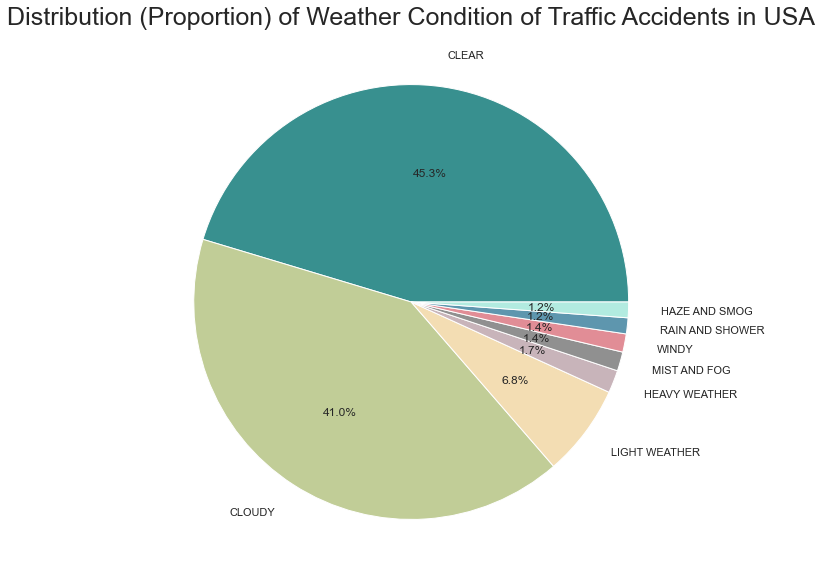

In [185]:
# Pie chart
labels = ['CLEAR', 'CLOUDY', 'LIGHT WEATHER', 'HEAVY WEATHER', 'MIST AND FOG', 'WINDY', 'RAIN AND SHOWER', 'HAZE AND SMOG']
#colors
colors = ['#38908F', '#C1CD97', '#F3DDB3', '#C8B4BA', '#909090', '#E18D96', '#5E96AE', '#B2EBE0']
 
plt.pie(New_df['Weather_Condition'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%');
plt.ylabel('')
plt.title('Distribution (Proportion) of Weather Condition of Traffic Accidents in USA', fontsize=25)
plt.show()

For the "Weather_Condition", the plot is chosen is pie chart, since shows the compositional structure of the Weather Condition. The following pie chart illustrates the distribution of Weather Condition of Traffic Accidents of the traffic accidents in 49 states of the USA from 2016 to 2021. Overall, the most of the traffic accident in USA have the cloudy and clear weather condition, which account for more than 80 percent. In addtion, in the minor group, the light weather has the biggest part of the group. Other weather conditions are inconsiderable factors account for less than 7 percent. Hence, it can be predicted that the weather factor has most of the impact of the traffic accident are most so serious, and most of them happen in the day. 

### "Severity" column

For the "Severity", the plot is chosen is pie chart, since shows the compositional structure of the Severity Level. The following pie chart compares four serious sectors of the traffic accidents in term of the proportion of the levels of Severity of the traffic accidents in 49 states of the USA from 2016 to 2021. The four severity levels of the traffic accidents are presented in numeric values from 1 for the least damaged to 4 for the higest damaged. Overall, the pie chart can be divided into 2 main parts, which are the less damaged and the more serious traffic accidents. The most considerable group is the less damaged by traffic accidents, in this group almost the traffic accident has the second Severity Level, which mean it likelly to have some noticable consequences, since 80 percentage is number 2, and less than 2 percent has 1 severity level. In the second part, the more serious accident account for less than 19 percent. Furthermore, the most damaged group has the smallest proportion in the second group. Hence, it can be predicted that, most of the accidents is in the night instead of day, since in night, most of people do not have preference to go out. Moreover, the weather condition is also a considerable factor that affect the traffic accidents, since most of the weather conditions are clearly, and cloudy, and just an insignificant number of them are in heavy state.

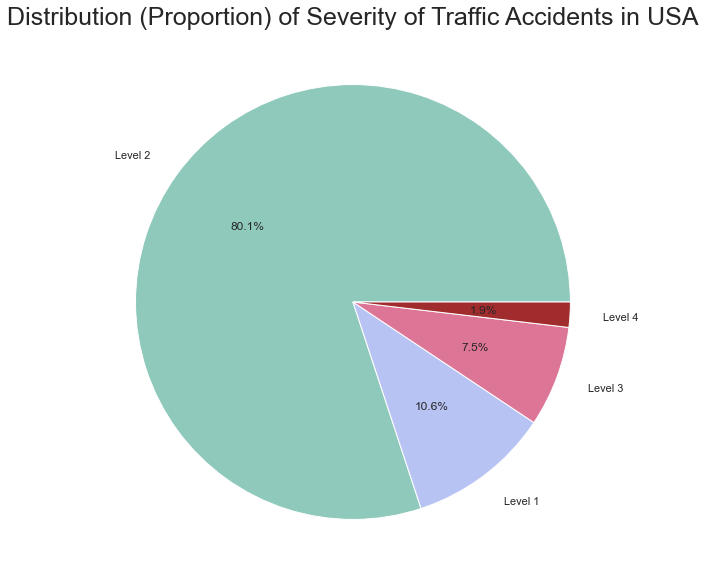

In [186]:
# Pie chart
labels = ['Level 2', 'Level 1', 'Level 3', 'Level 4']
#colors
colors = ['#8EC9BB', '#B7C3F3', '#DD7596', '#A02C2D']
 
plt.pie(New_df['Severity'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%');
plt.ylabel('')
plt.title('Distribution (Proportion) of Severity of Traffic Accidents in USA', fontsize=25)
plt.show()

<b> Seperate the Level of Severity into 2 main groups which are less serious and more serious

<b> less_serious

In [187]:
less_serious = New_df[(New_df['Severity'] == 2) | (New_df['Severity'] == 1)]
less_serious

Weather_Condition  Severity Sunrise_Sunset  Temperature  Start_Lng  \
0                 CLOUDY         2            DAY         81.0       81.0   
2                  CLEAR         2          NIGHT         47.0       47.0   
3                 CLOUDY         2            DAY         56.0       56.0   
4        RAIN AND SHOWER         2          NIGHT         47.0       47.0   
5                  CLEAR         2          NIGHT         65.0       65.0   
...                  ...       ...            ...          ...        ...   
454812     LIGHT WEATHER         2          NIGHT         37.0       37.0   
454813            CLOUDY         2          NIGHT         77.0       77.0   
454814             CLEAR         2            DAY         71.0       71.0   
454815             CLEAR         2          NIGHT         50.0       50.0   
454817             CLEAR         2          NIGHT         53.1       53.1   

        Humidity  
0           74.0  
2           74.0  
3           29.0  
4           83.0  
5           73.0  
...          ...  
454812      96.0  
454813      66.0  
454814      41.0  
454815      72.0  
454817      77.0  

[377781 rows x 6 columns]

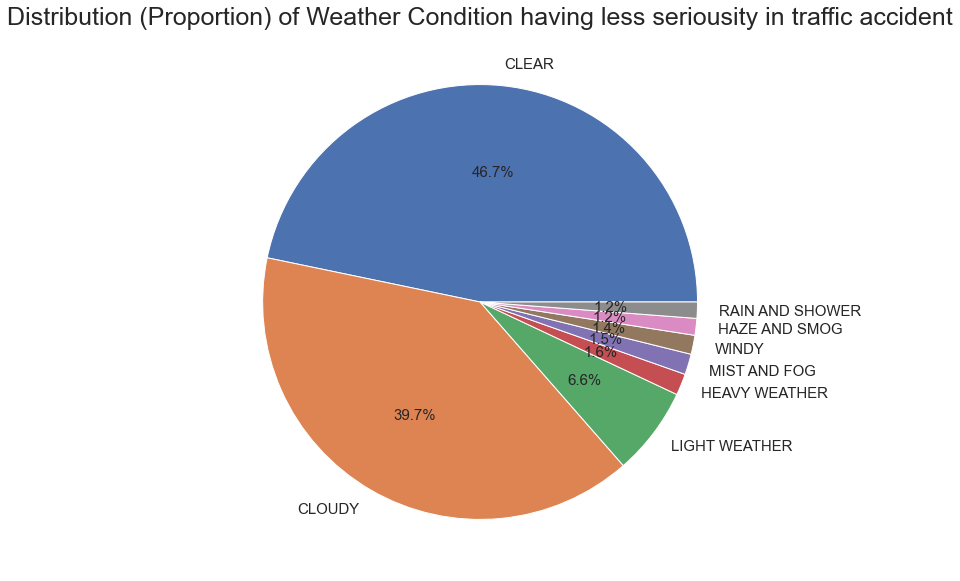

In [188]:
less_serious['Weather_Condition'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, fontsize=15)
plt.ylabel('')
plt.title('Distribution (Proportion) of Weather Condition having less seriousity in traffic accident', fontsize=25)
plt.show()

In the less serious group, the more than 80 percent of the weather condition do not have the extreme weather. The heavy weather just account for 1.6 percent.

<b> more_serious

In [189]:
more_serious = New_df[(New_df['Severity'] == 3) | (New_df['Severity'] == 4)]
more_serious

Weather_Condition  Severity Sunrise_Sunset  Temperature  Start_Lng  \
1                 CLOUDY         4            DAY         42.1       42.1   
11                 CLEAR         4          NIGHT         70.0       70.0   
12       RAIN AND SHOWER         3          NIGHT         60.8       60.8   
14                CLOUDY         4          NIGHT         65.0       65.0   
18                 CLEAR         4            DAY         80.6       80.6   
...                  ...       ...            ...          ...        ...   
454804            CLOUDY         3            DAY         71.1       71.1   
454807            CLOUDY         3            DAY         53.1       53.1   
454808            CLOUDY         3            DAY         69.0       69.0   
454816            CLOUDY         4            DAY         57.0       57.0   
454818     LIGHT WEATHER         4            DAY         68.0       68.0   

        Humidity  
1           76.0  
11          90.0  
12          94.0  
14          59.0  
18          70.0  
...          ...  
454804      38.0  
454807      30.0  
454808      25.0  
454816      87.0  
454818      94.0  

[83281 rows x 6 columns]

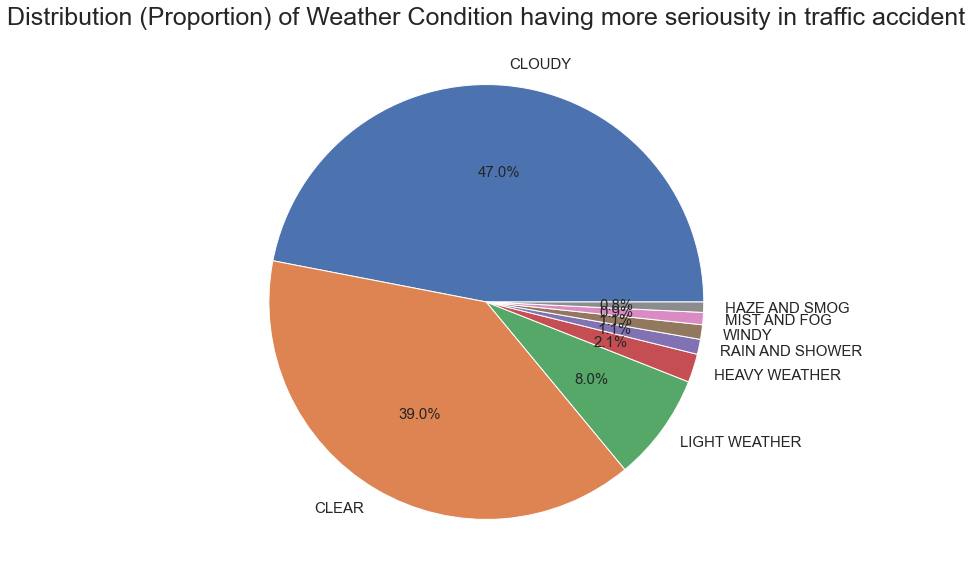

In [190]:
more_serious['Weather_Condition'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, fontsize=15)
plt.ylabel('')
plt.title('Distribution (Proportion) of Weather Condition having more seriousity in traffic accident', fontsize=25)
plt.show()

In the more serious group, the more than 80 percent of the weather condition do not have the extreme weather. However, the heavy weather increases from 1.6 percent to 2.1 percent. This relationship will be demonstrated more detail in the next part.

### The relationship between the Severity and Weather_Condition

For displaying the relationshop of three columns which are "Severity", "Weather_Condition", the plot is chosen is bar chart, since it can compare the magnitude of severity of the traffic accident in different weather condition. Overall, the heavy weather condition has the higher level os severity. Hence, the more extreme of the weather condition the higher the severity is.

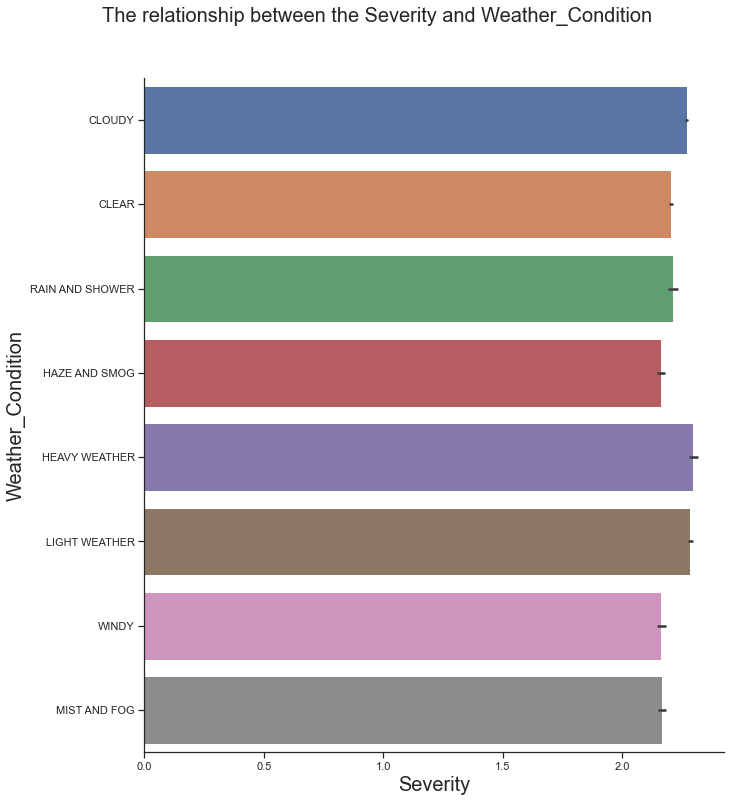

In [191]:
plot = sns.catplot(data=New_df, kind="bar", x="Severity", y="Weather_Condition", height = 10)
plot.fig.suptitle("The relationship between the Severity and Weather_Condition", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Weather_Condition", fontsize = 20)

### "Sunrise_Sunset" column

For the "Sunrise_Sunset", the plot is chosen is pie chart, since shows the compositional structure of the Severity Level. The following pie chart compares two sectors, which are day and night, of the traffic accidents in term of the proportion of the time of the day of the traffic accidents in 49 states of the USA from 2016 to 2021. According the following pie plot, the day time has the major part, while the night time has less than 40 percent. From this, it can be anticipate that most of the day time has the cloudy and clear weather condition and the most of the severity level of the traffic accident happen in the day time is 2.

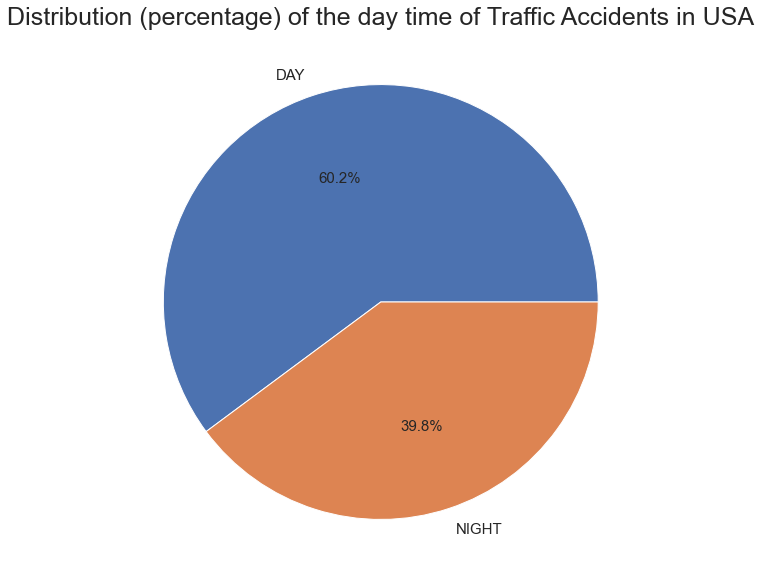

In [192]:
New_df['Sunrise_Sunset'].value_counts().plot.pie(title="Distribution (Proportion) of Sunrise_Sunset", 
                                                 legend=False, autopct='%1.1f%%', startangle=0, fontsize=15)
plt.ylabel('')
plt.title('Distribution (percentage) of the day time of Traffic Accidents in USA', fontsize=25)
plt.show()

### The severity level of traffic accidents during weather conditions in a specific time of a day

For displaying the relationshop of three columns which are "Severity", "Sunrise_Sunset" and "Weather_Condition", the plot is chosen is bar chart, since it can compare the magnitude of severity of the traffic accident in different weather condition in a specific time of the day. The x_label represents Severity feature while the y_label represents the day time of the day which are day and time. According to this bar chart, in the day time, the higest severity score is the heavy weather, and the haze & smog has the lowest severity level. In the night time, the weather has the highest point of severity is light weather, while the mist and fog has the lowest severity level. From this severity, in day time, the severity level of the traffic accident happen in the day time is higher than the night time, and the heavy weather has the higest severity level, which mean, the more serious the weather condition is, the higher the severity level will be in the day time.

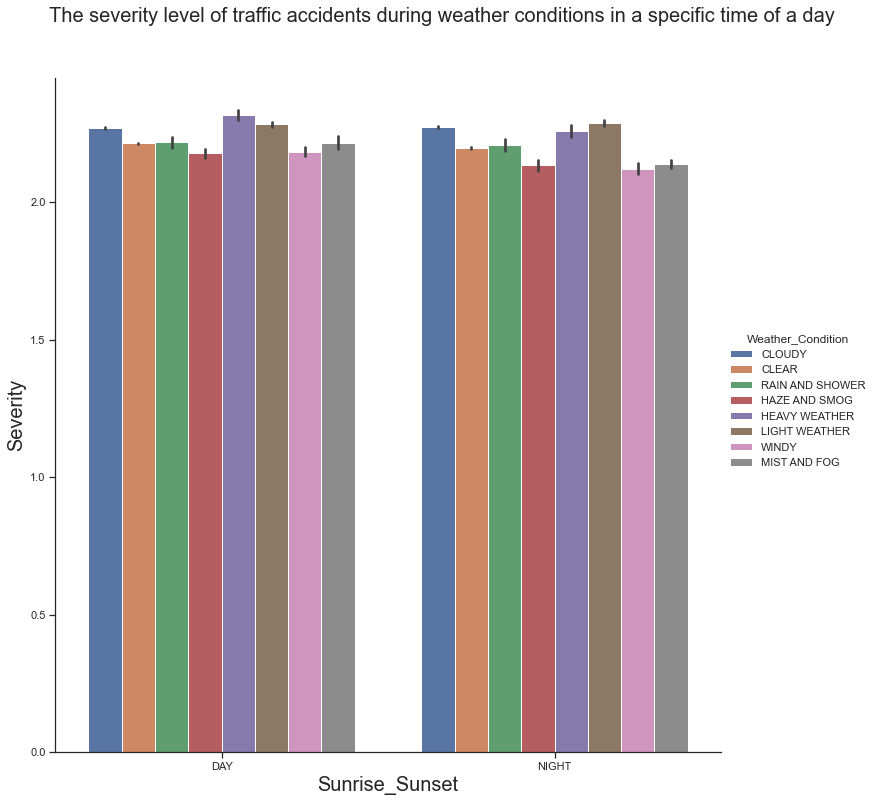

In [193]:
plot = sns.catplot(data=New_df, kind="bar", x="Sunrise_Sunset", y="Severity", hue="Weather_Condition", height = 10)
plot.fig.suptitle("The severity level of traffic accidents during weather conditions in a specific time of a day", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Sunrise_Sunset", fontsize = 20)
plot.set_ylabels("Severity", fontsize = 20)

### The relationship between the Severity and Sunrise_Sunset

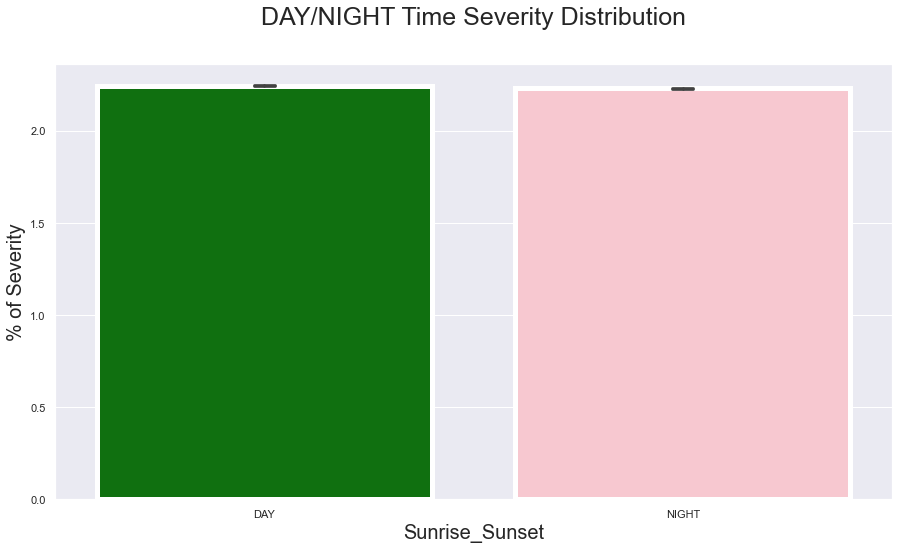

In [194]:
pal = {'DAY':"green", 'NIGHT':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sunrise_Sunset", y = "Severity", data=train, palette = pal, linewidth=5, capsize = .05,
                 order = ['DAY','NIGHT'])

plt.title("DAY/NIGHT Time Severity Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of Severity", fontsize = 20)
plt.xlabel("Sunrise_Sunset",fontsize = 20);

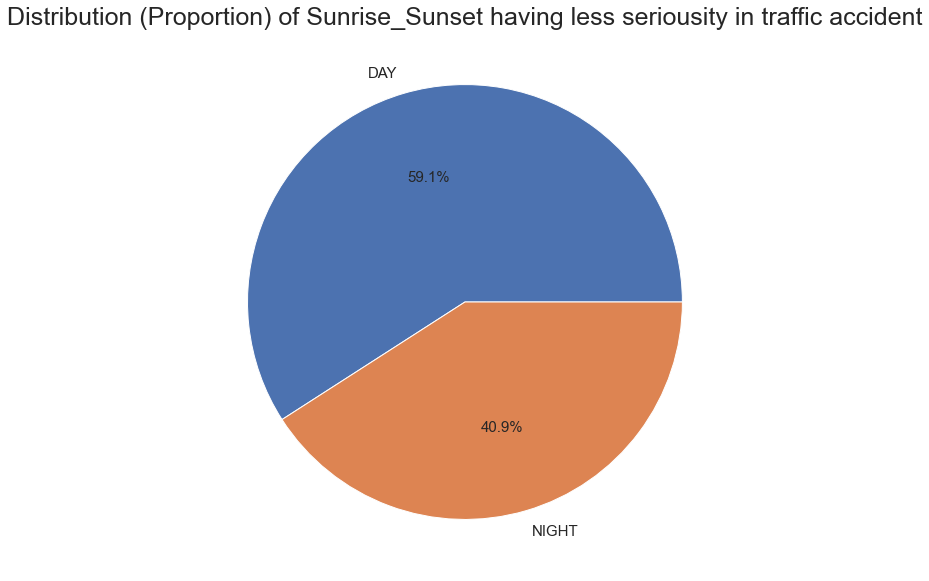

In [195]:
less_serious['Sunrise_Sunset'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, fontsize=15)
plt.ylabel('')
plt.title('Distribution (Proportion) of Sunrise_Sunset having less seriousity in traffic accident', fontsize=25)
plt.show()

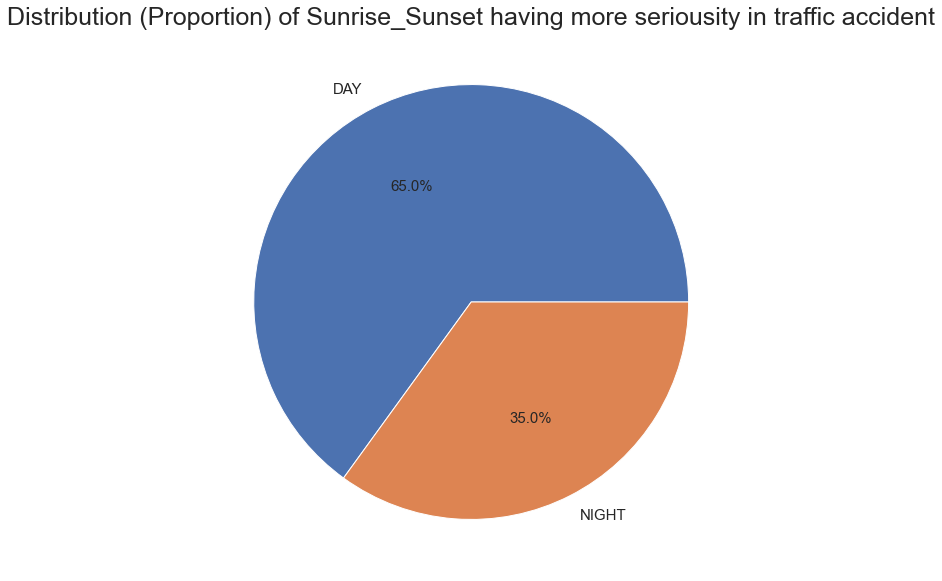

In [196]:
more_serious['Sunrise_Sunset'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, fontsize=15)
plt.ylabel('')
plt.title('Distribution (Proportion) of Sunrise_Sunset having more seriousity in traffic accident', fontsize=25)
plt.show()

According to the two pie charts above, the percent number of traffic have less serious accident in day is 59.1, that number increase in the more serious group. Hence, it can be concluded that in night there is less traffic accidents has high severity level

**Summary**
***
On the contrary side of the previous suspections, the number of severity of less impacted by traffic accidents is higher than the more serious ones. Most of the number of traffic accident occured in the day time. Moreover, during the day time, the severity level is slightly higher than the night time. Furthermore in the day time, the highest severity level is the heavy weather.

### "Temperature" Column

For the "Temperature" column, the density plot is chosen since the occurrence frequencies of the temperature are accurately displayed. The following density plot demonstrates the occurrencer frequencies of the Temperature from -27 Fahrenheit degree to 129 Fahrenheit degree during the traffic accident records in 49 states of the USA from 2016 to 2021. Overall, the temperature from 50 to 60 has the highest frequency. It may be because the group of cloudy has the higest proportion of the weather condition. After that, the second highest density in the temprature is from 62 to 70 and the group of temprature less than 48 or 80 degree is the lowest. The heavy weather is the lowest proportion so does the lowest frequencies in temperature. Hence, it can be predicted that the heavy weather often have extremely low or extermely high temperature.

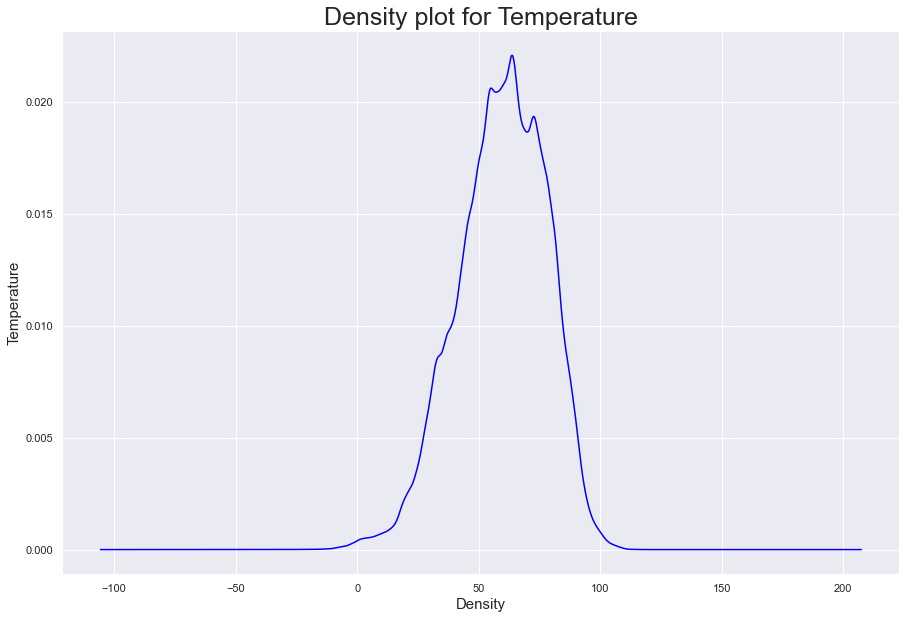

In [197]:
New_df.Temperature.plot.density(color='blue')
plt.title('Density plot for Temperature', fontsize=25)
plt.xlabel('Density', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

### "Humidity" Column

For the "Humidity" column, the density plot is chosen since the occurrence frequencies of the humidity are accurately displayed. The following density plot displays the the density of humidity of the traffic accident in 49 states of the USA from 2016 to 2021. Overall, the humid which are aroung 67-84 percent is the most popular factor. It maybe owing to the high proportion of cloudy, since cloudy often has high humidity. Additionally, it can be predicted that the humidity also have a quite considerable factors to the weather condition, since the second highest density of humidity is from 48-60 percent, which may has a clear weather condition. Finally the denisity of the group humidity which is over 80 or lower than 40 percent is lowest group, in this group often cause a lot of heavy weather and that group is the lowest group in weather condition.

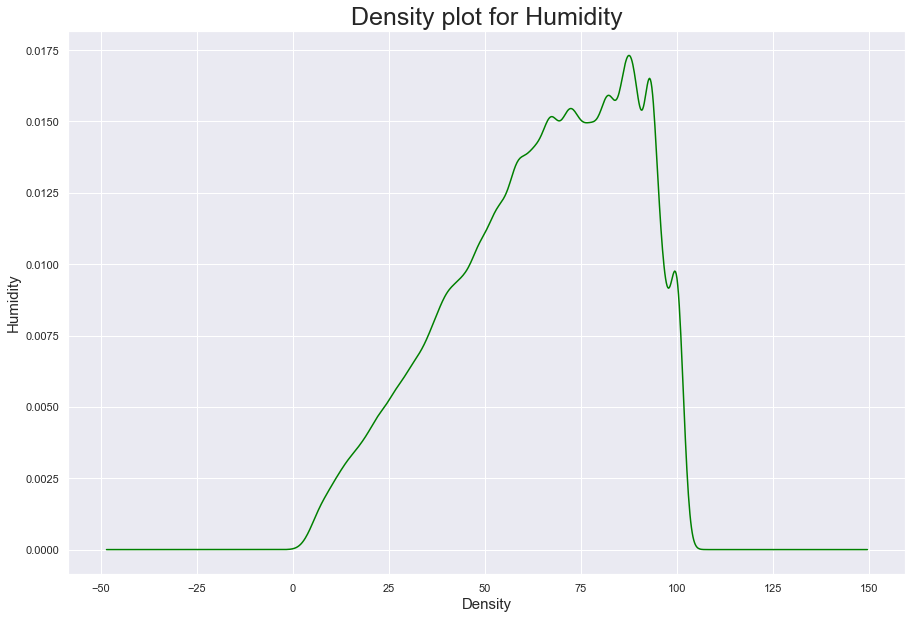

In [198]:
New_df.Humidity.plot.density(color='green')
plt.title('Density plot for Humidity', fontsize=25)
plt.xlabel('Density', fontsize=15)
plt.ylabel('Humidity', fontsize=15)
plt.show()

### The magnitude of humidity of the traffic accident in different weather condition with specific severity level of the day

For displaying the relationshop of three columns which are "Severity", "Humidity" and "Weather_Condition", the plot is chosen is bar chart, since it can compare the magnitude of humidity of the traffic accident in different weather condition in a specific severity level of the day. Overall, in all the severity level, the mist & fog, and haze & smog have the higest magnitude of temperature. The weather condition has the lowest humidity is the clear weather condition.

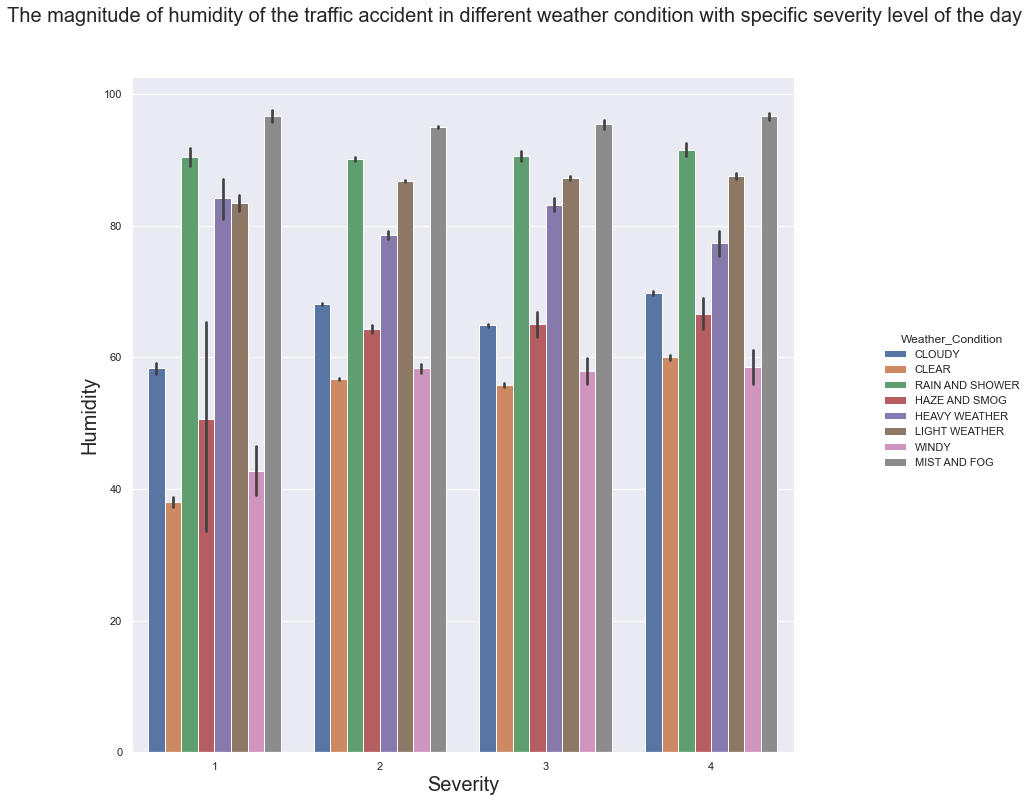

In [199]:
plot = sns.catplot(data=New_df, kind="bar", x="Severity", y="Humidity", hue="Weather_Condition", height = 10)
plot.fig.suptitle("The magnitude of humidity of the traffic accident in different weather condition with specific severity level of the day", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Humidity", fontsize = 20)

### The magnitude of temperature of the traffic accident in different weather condition with specific severity level of the day

For displaying the relationshop of three columns which are "Severity", "Temperature" and "Weather_Condition", the plot is chosen is bar chart, since it can compare the magnitude of Temperature of the traffic accident in different weather condition in a specific severity level of the day. Overall, in all the severity level, the temperature in the severity level 1 is the higest, since it maybe because the extreme temperature can be very low. The haze wna smog weather seem to have the higest temperature, as the haze and smog may cause the high temperature. For this plot, there seem to have not a high dependency.

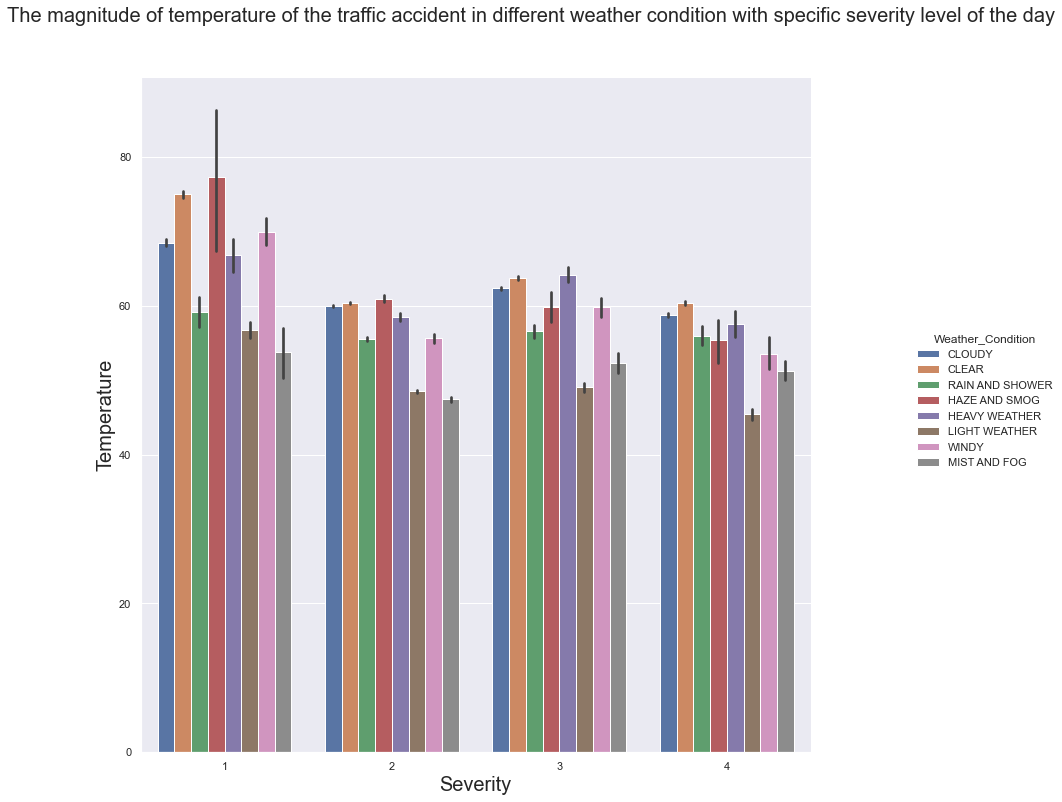

In [200]:
plot = sns.catplot(data=New_df, kind="bar", x="Severity", y="Temperature", hue="Weather_Condition", height = 10)
plot.fig.suptitle("The magnitude of temperature of the traffic accident in different weather condition with specific severity level of the day", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Temperature", fontsize = 20)

<b> The relationship between Temperature and Humidity

The relationship between Temperature and Humidity is demonstrated with a line plot. Base on the following line plot, the highest temperature has a low humidity, and while the volume of the temperature decrease, the humidity incresse inversely. Hence, the relationship between Temperature and Humidity is inversely proportional.

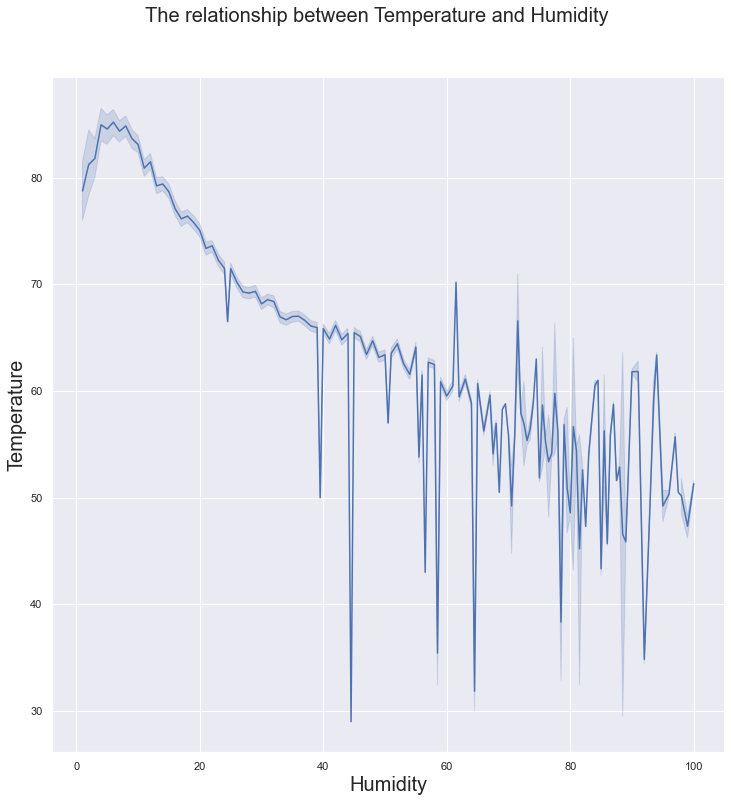

In [201]:
plot = sns.relplot(data=New_df, kind="line", x="Humidity", y="Temperature", facet_kws=dict(sharex=False), height = 10)
plot.fig.suptitle("The relationship between Temperature and Humidity", fontsize=20, fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Humidity", fontsize = 20)
plot.set_ylabels("Temperature", fontsize = 20)

<b> The relationship between Severity and Humidity

The relationship between Humidity and Humidity is demonstrated with a line plot. Base on the following line plot, the lowest Humidity has a lowest Severity, and while the volume of the Severity increase, the Humidity incresse proportionally. Hence, the relationship between Temperature and Humidity is proportional. Hence, the most serious traffic accidents has the highest humidity

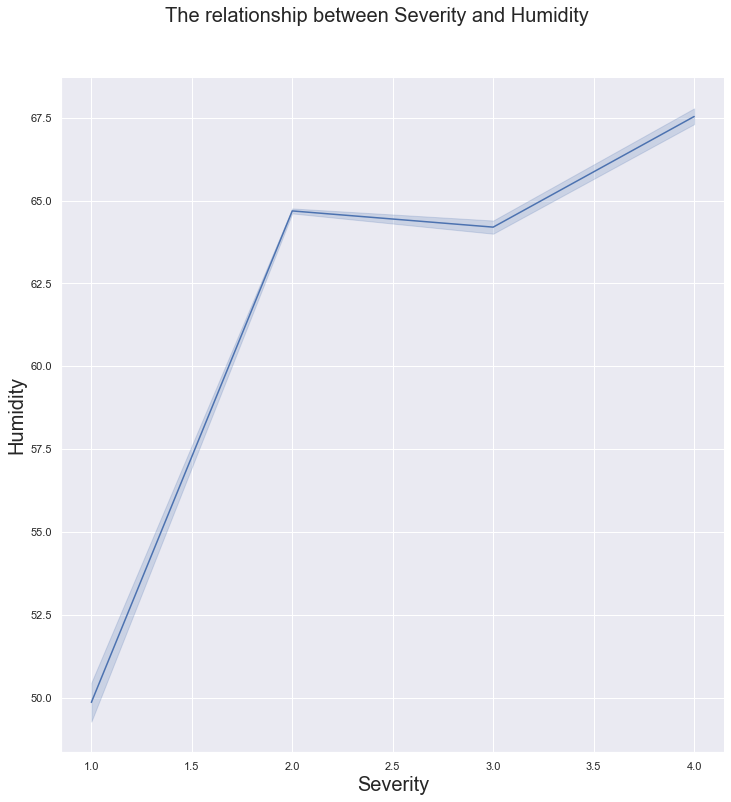

In [202]:
plot = sns.relplot(data=New_df, kind="line", x="Severity", y="Humidity", facet_kws=dict(sharex=False), height = 10)
plot.fig.suptitle("The relationship between Severity and Humidity", fontsize=20, fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Humidity", fontsize = 20)

**Summary**
***
The assumption for "Humidity" and "Temperature" are all incorrect, most of them do not fall in the extreme range. In Humidity, the higest humidity has the mist and fog weather condition. In the temperature, the less severity has the higher temperature, which is not in the extreme temperature. Moreover, the relationship between the "Humidity" and "Severity" is proportional while the relationship between "Humidity" and "Temperature" is inversely proportional.

### "Start_Lng" column

For the "Humidity" column, the density plot is chosen since the occurrence frequencies of the humidity are accurately displayed. The following density plot displays the the density of humidity of the traffic accident in 49 states of the USA from 2016 to 2021. The most popular humidity is around 61 to 73, which may cause in this longtitude has a high chance to cause severity level 1 & 2, and the second higest is from 48 to 61 has the severity level of 3 and 4.

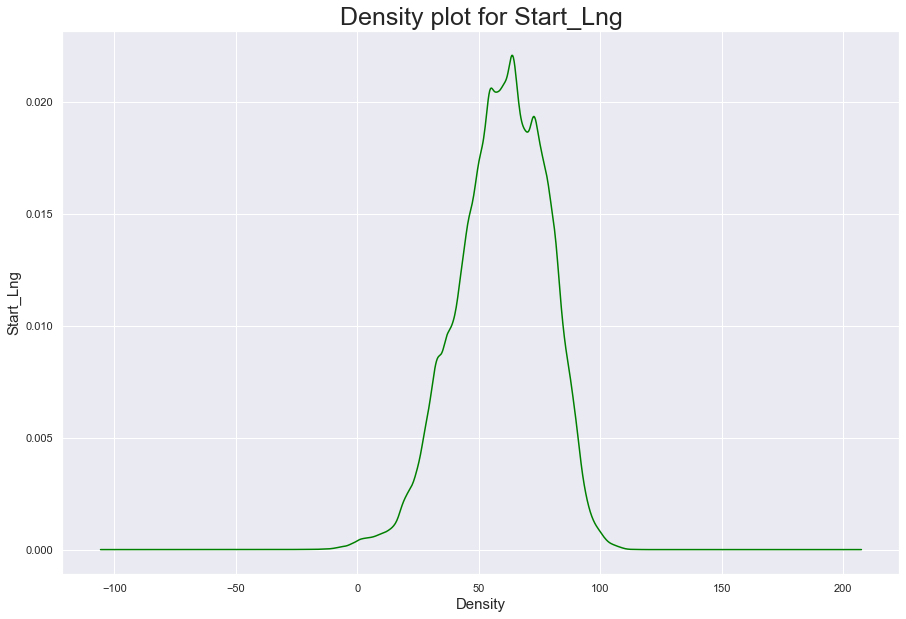

In [203]:
New_df.Start_Lng.plot.density(color='green')
plt.title('Density plot for Start_Lng', fontsize=25)
plt.xlabel('Density', fontsize=15)
plt.ylabel('Start_Lng', fontsize=15)
plt.show()

<b> The severity level of different longtitude

The relationship between "Severity" and "Start_Lng" columns is demonstrated with the line plot with the either growth or decrease rate in the temperature of each severity level. According to the line plot below, the least impacted has the highest number of longtitude, and the highest level of severity has the lowest longtitude. Hence, the relationship between the severity and longtitude is approximately inversely proportional.

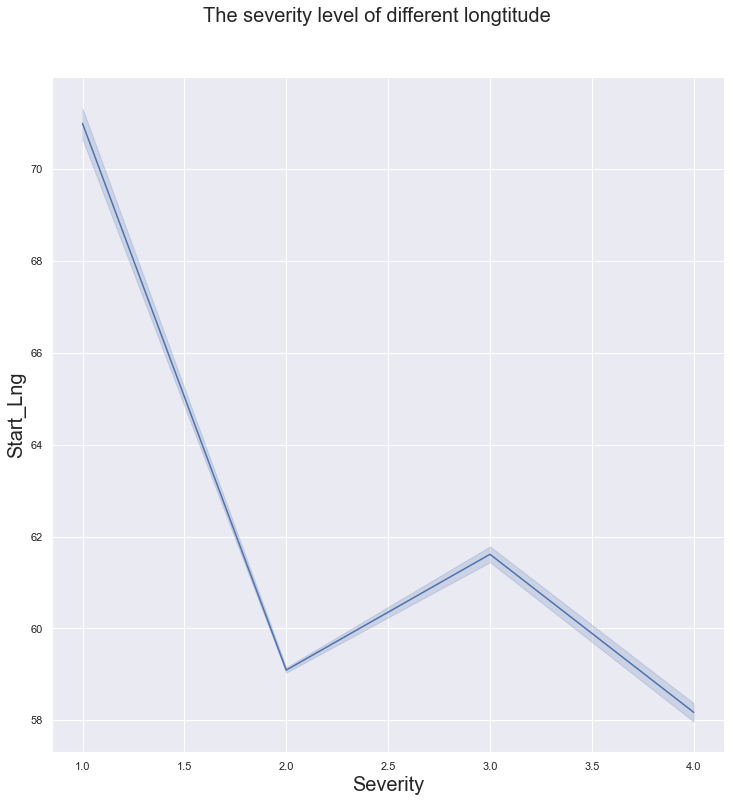

In [204]:
plot = sns.relplot(data=New_df, kind="line", x="Severity", y="Start_Lng", facet_kws=dict(sharex=False), height = 10)
plot.fig.suptitle("The severity level of different longtitude", fontsize=20, fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Start_Lng", fontsize = 20)

<b> The Humidity of different longtitude

The relationship between Start_Lng and Humidity is demonstrated with a line plot. Base on the following line plot, the highest Start_Lng has a low humidity, and while the volume of the Start_Lng decrease, the humidity incresse inversely. Hence, the relationship between Start_Lng and Humidity is inversely proportional.

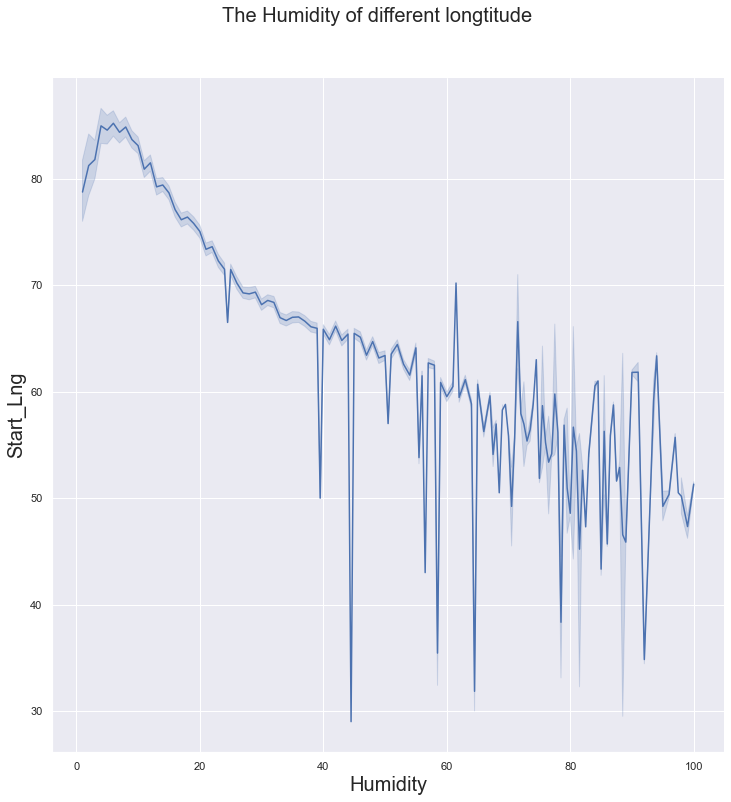

In [205]:
plot = sns.relplot(data=New_df, kind="line", x="Humidity", y="Start_Lng", facet_kws=dict(sharex=False), height = 10)
plot.fig.suptitle("The Humidity of different longtitude", fontsize=20, fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Humidity", fontsize = 20)
plot.set_ylabels("Start_Lng", fontsize = 20)

### The magnitude of temperature of the traffic accident in different weather condition with specific severity level of the day

For displaying the relationshop of three columns which are "Severity", "Start_Lng" and "Weather_Condition", the plot is chosen is bar chart, since it can compare the magnitude of severity of the traffic accident in different weather condition with different longtitude. The x_label represents Severity feature while the y_label represents Start_Lng. According to this bar chart, the lowest severity level often occur in the locations having the high number of longtitude while the most serious traffic accidents often happen in the locations having the lowest number of longtitude owing to the inversely proportional relationship of them. In reality, there is no relationship between the weather condition and the longtitude so that, it is understandable that in this plot, there is no relationship between the "Start_Lng" and "Weather_Condition" columns.

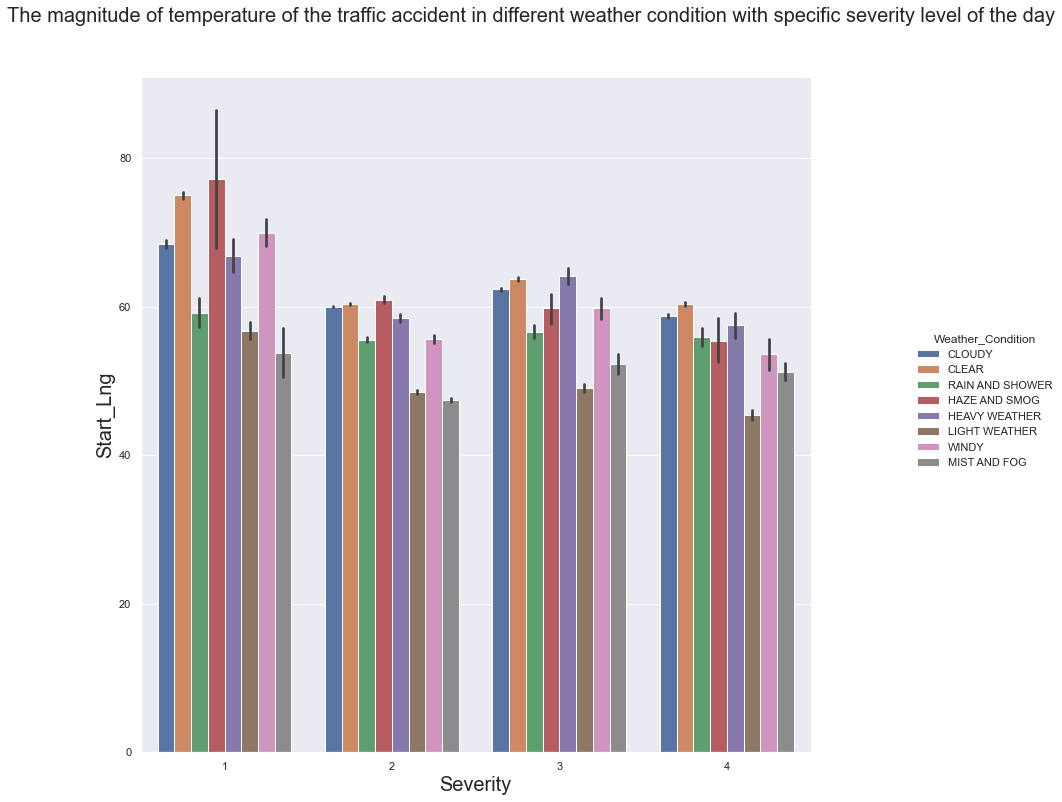

In [206]:
plot = sns.catplot(data=New_df, kind="bar", x="Severity", y="Start_Lng", hue="Weather_Condition", height = 10)
plot.fig.suptitle("The magnitude of temperature of the traffic accident in different weather condition with specific severity level of the day", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Severity", fontsize = 20)
plot.set_ylabels("Start_Lng", fontsize = 20)

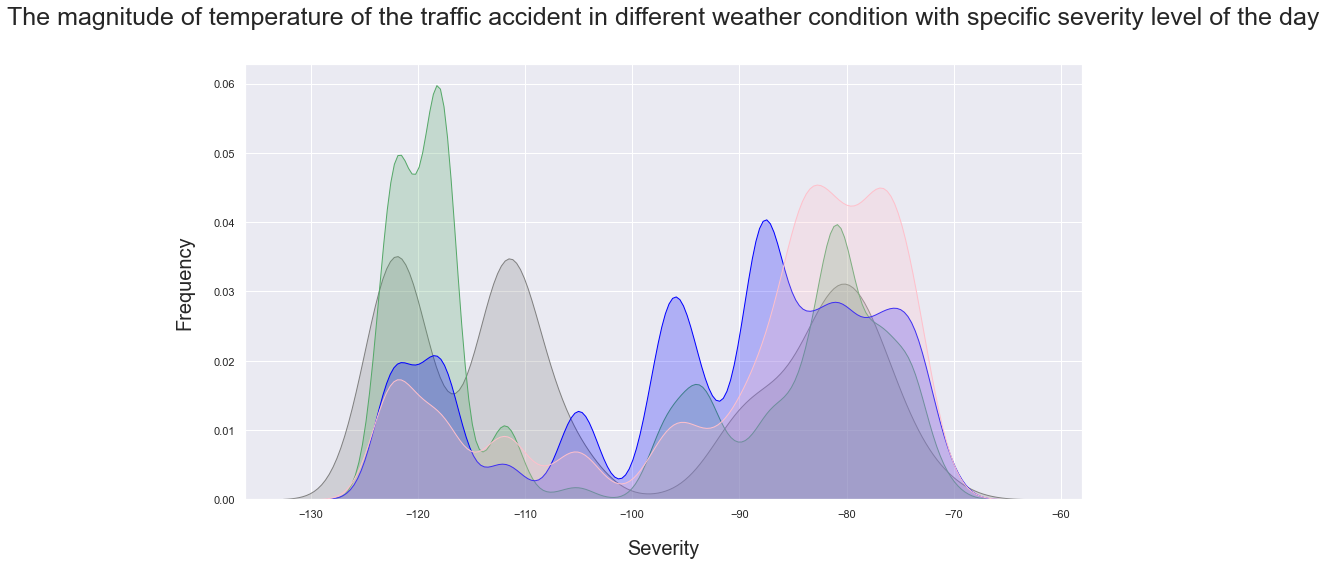

In [207]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(train.loc[(train['Severity'] == 1),'Start_Lng'] , color='gray',shade=True, label='Level 1')
ax=sns.kdeplot(train.loc[(train['Severity'] == 2),'Start_Lng'] , color='g',shade=True, label='Level 2')
ax=sns.kdeplot(train.loc[(train['Severity'] == 3),'Start_Lng'] , color='blue',shade=True, label='Level 3')
ax=sns.kdeplot(train.loc[(train['Severity'] == 4),'Start_Lng'] , color='pink',shade=True, label='Level 4')


plt.title('The magnitude of temperature of the traffic accident in different weather condition with specific severity level of the day', fontsize = 25, pad = 40)
plt.xlabel("Severity", fontsize = 20, labelpad = 20)
plt.ylabel('Frequency', fontsize = 20, labelpad= 20);